In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [9]:
import yaml
import numpy as np
import pandas as pd
import lhapdf as lh
import matplotlib.pyplot as plt
import MatplotlibSettings
from collections import deque
import copy
import os
from os import listdir
pd.set_option("display.max_rows", None, "display.max_columns", None)
from scipy import interpolate

In [10]:
# Fit folder
FitFolder = "."

In [11]:
particle_type = "pr"
particle_symbol = {"ka":"K","pi":"pi","pr":"Pr"}[particle_type]
is_pions = (particle_type == "pi")

In [12]:
# Read and report chi2's
with open(FitFolder + "/Chi2s.yaml", "r") as chi2file:
    for chi2 in yaml.load(chi2file, Loader = yaml.CLoader):
        for c in chi2.items(): 
            print(c[0],"(Npt = ",c[1]["Npt"],"): chi2 = ", c[1]["chi2"])

H1LRG_12_MS (Npt =  167 ): chi2 =  0.957571090198719
H1LRG_11_225_MS (Npt =  13 ): chi2 =  0.5762392365809175
H1LRG_11_252_MS (Npt =  12 ): chi2 =  1.182959787209126
H1LRG_11_319_MS (Npt =  12 ): chi2 =  1.1500935289314715
h1zeus-combined (Npt =  128 ): chi2 =  1.1356228243625046
Total (Npt =  332 ): chi2 =  1.0207366965852822


In [20]:
#Plot settings
exp_dict = {
    
  'H1LRG12': {'plotfile': 'H1LRG_12_MS_'+particle_type,
  'active': True,
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
  'binints': True,
  'xlog': True,
  'xlims': [0.1, 0.99],
  'ylims1': [0, 0.5],
  'ylims2': [0.5, 1.5]},
    
  'H1LRG11_225': {'plotfile': 'H1LRG_11_225_'+particle_type,
  'active': True,
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
  'binints': True,
  'xlog': True,
  'xlims': [0.1, 0.99],
  'ylims1': [0, 0.5],
  'ylims2': [0.5, 1.5]},
    
  'H1LRG11_252': {'plotfile': 'H1LRG_11_252_'+particle_type,
  'active': True,
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
  'binints': True,
  'xlog': True,
  'xlims': [0.1, 0.99],
  'ylims1': [0, 0.5],
  'ylims2': [0.5, 1.5]},
    
  'H1LRG11_319': {'plotfile': 'H1LRG_11_319_'+particle_type,
  'active': True,
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
  'binints': True,
  'xlog': True,
  'xlims': [0.1, 0.99],
  'ylims1': [0, 0.5],
  'ylims2': [0.5, 1.5]},
    
  'H1ZEUS-combined': {'plotfile': 'H1_ZEUS Combined_'+particle_type,
  'active': True,
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
  'binints': True,
  'xlog': True,
  'xlims': [0.1, 0.99],
  'ylims1': [0, 0.5],
  'ylims2': [0.5, 1.5]}
}

def trait_dict_from_exp_dict(trait):
    return {exp:exp_dict[exp][trait] for exp in exp_dict if exp_dict[exp]["active"]}

plotfile = trait_dict_from_exp_dict("plotfile")
ylabels = trait_dict_from_exp_dict("ylabels")
binints = trait_dict_from_exp_dict("binints")
xlog = trait_dict_from_exp_dict("xlog")
xlims = trait_dict_from_exp_dict("xlims")
ylims1 = trait_dict_from_exp_dict("ylims1")
ylims2 = trait_dict_from_exp_dict("ylims2")

#Create plots folder
if not os.path.exists(FitFolder + "/plots"):
    os.makedirs(FitFolder + "/plots")

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1019734/2910642550.py:6: SyntaxWarning: invalid escape sequence '\s'
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
/tmp/ipykernel_1019734/2910642550.py:15: SyntaxWarning: invalid escape sequence '\s'
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
/tmp/ipykernel_1019734/2910642550.py:24: SyntaxWarning: invalid escape sequence '\s'
  'ylabels': '$\\displaystyle\sigma_{\mathrm{Reduced}}$',
/tmp/ipykernel_1019734/2910642550.py:33: SyntaxWarning: invalid 

<>:32: SyntaxWarning: invalid escape sequence '\ '
<>:102: SyntaxWarning: invalid escape sequence '\ '
<>:32: SyntaxWarning: invalid escape sequence '\ '
<>:102: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_1019734/3965991370.py:32: SyntaxWarning: invalid escape sequence '\ '
  + "\ \ x_{\mathrm{Pom}} = " + str(xPom[0]) + "$}"
/tmp/ipykernel_1019734/3965991370.py:102: SyntaxWarning: invalid escape sequence '\ '
  + "\ \ x_{\mathrm{Pom}} = " + str(xPom[0]) + "$}"


file is ./Predictions.yaml
H1LRG12


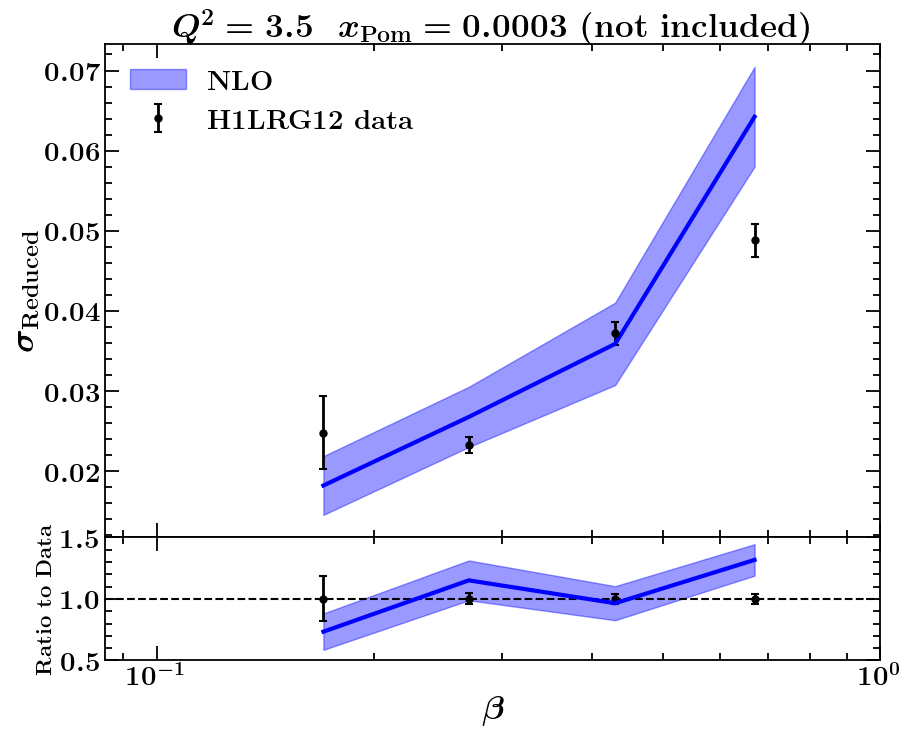

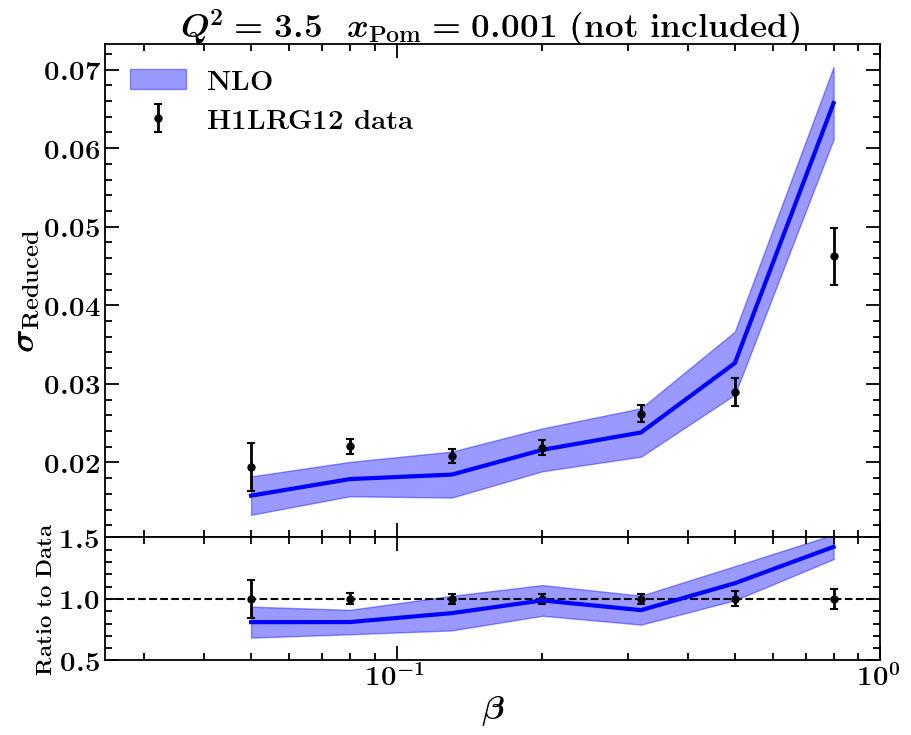

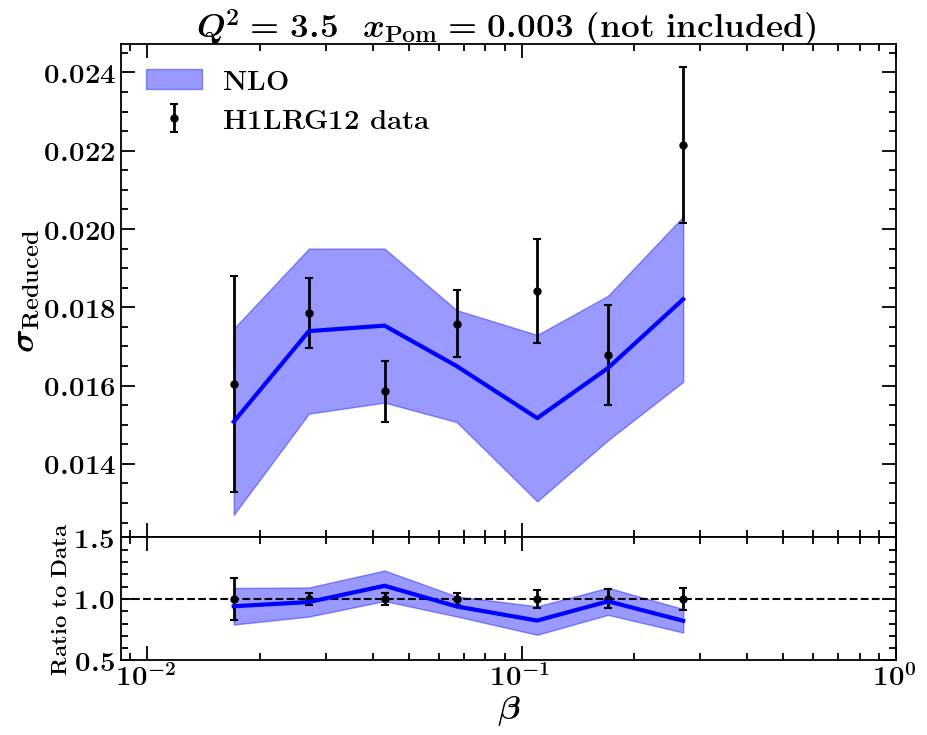

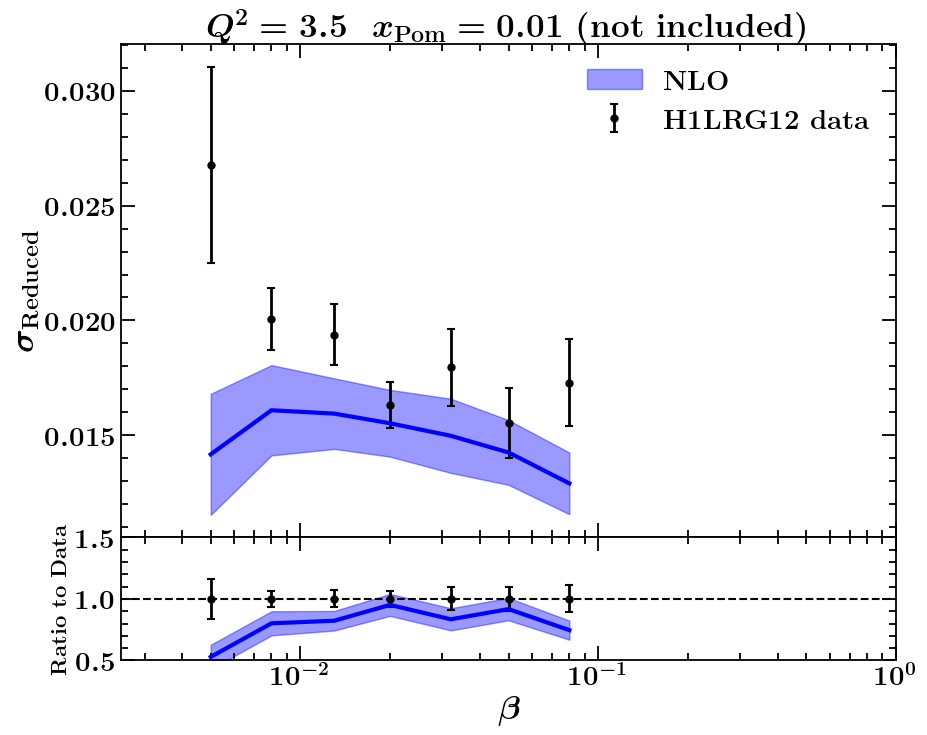

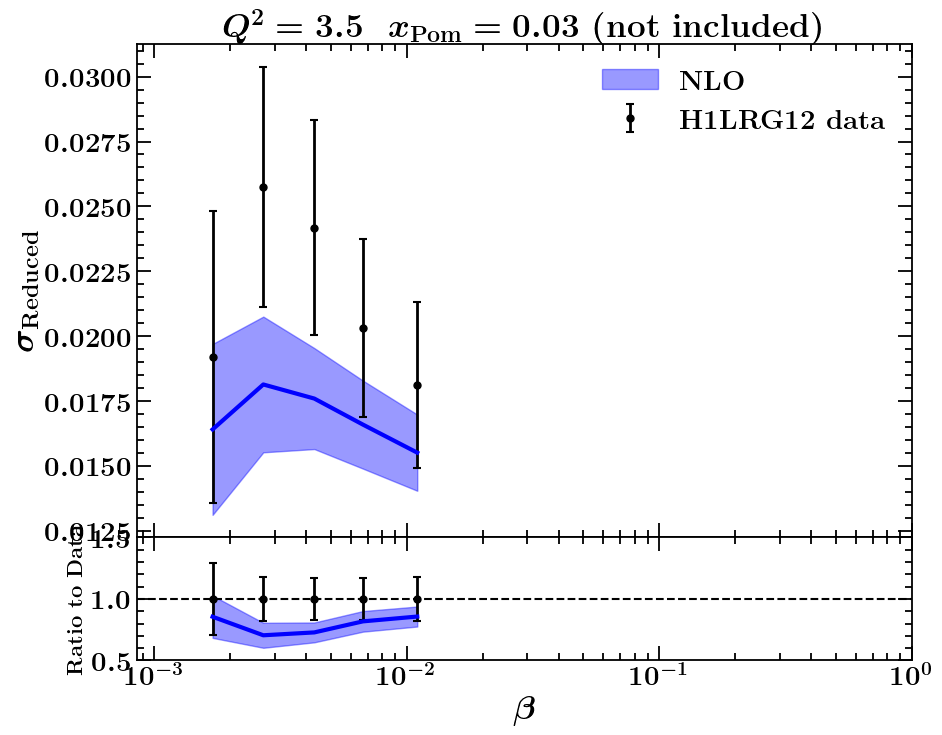

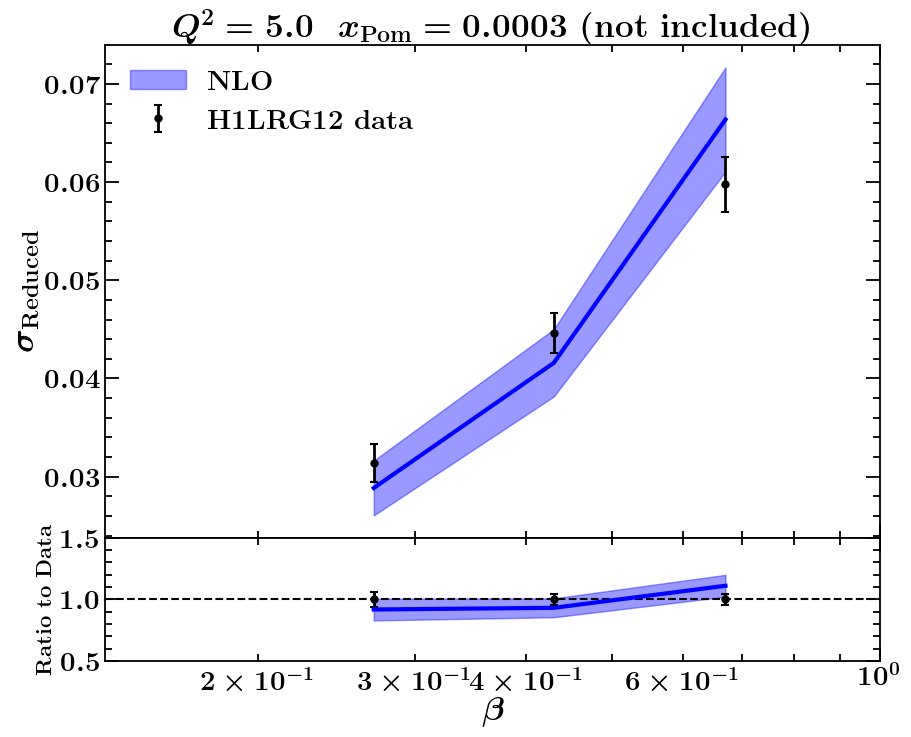

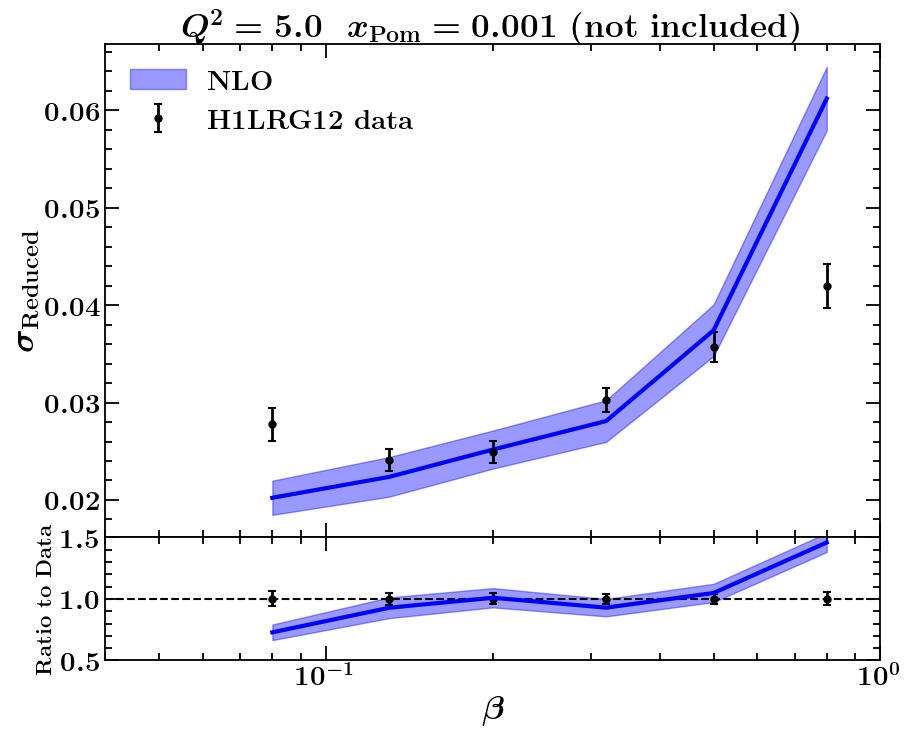

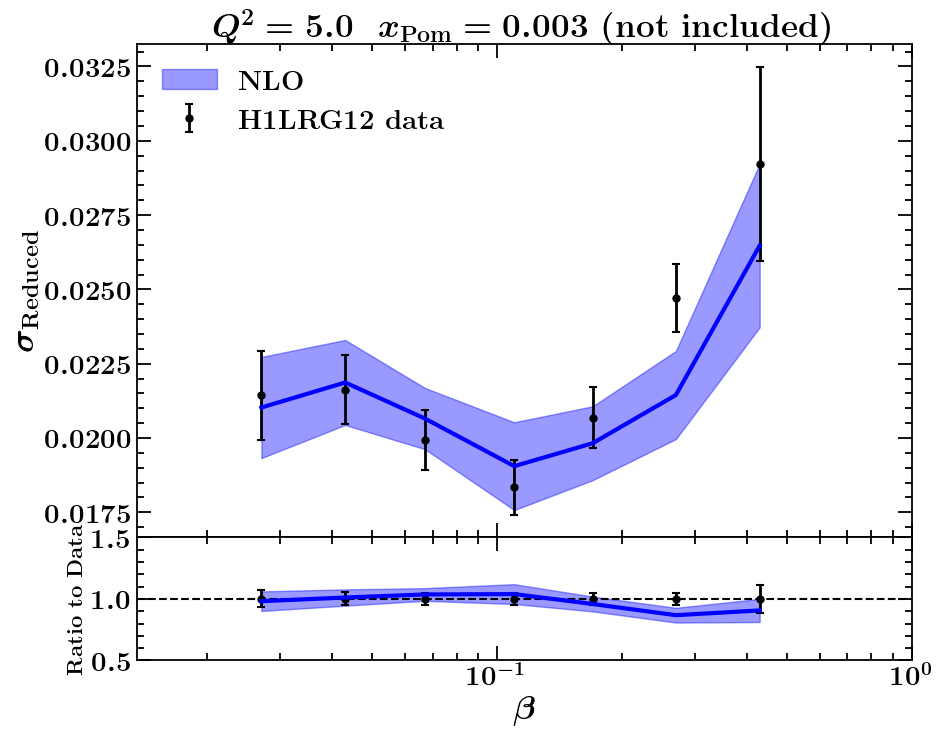

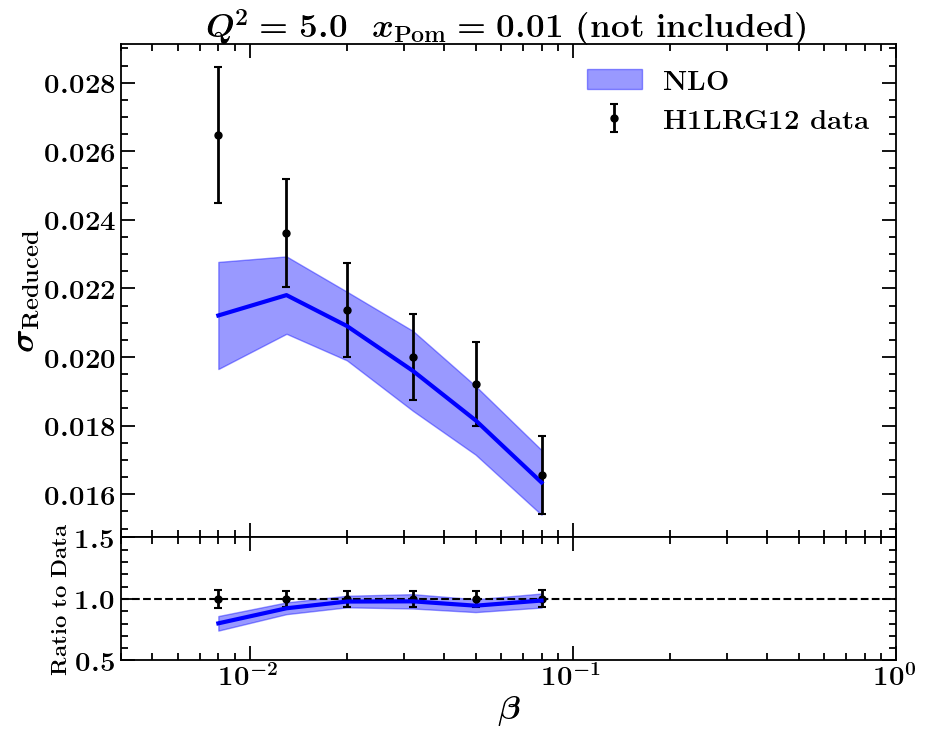

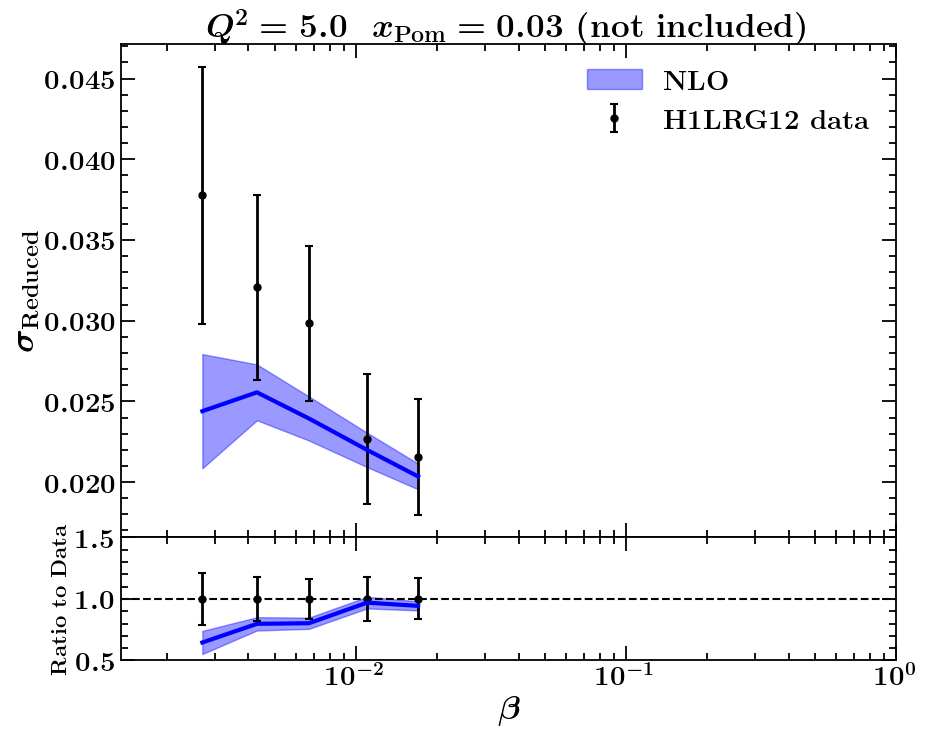

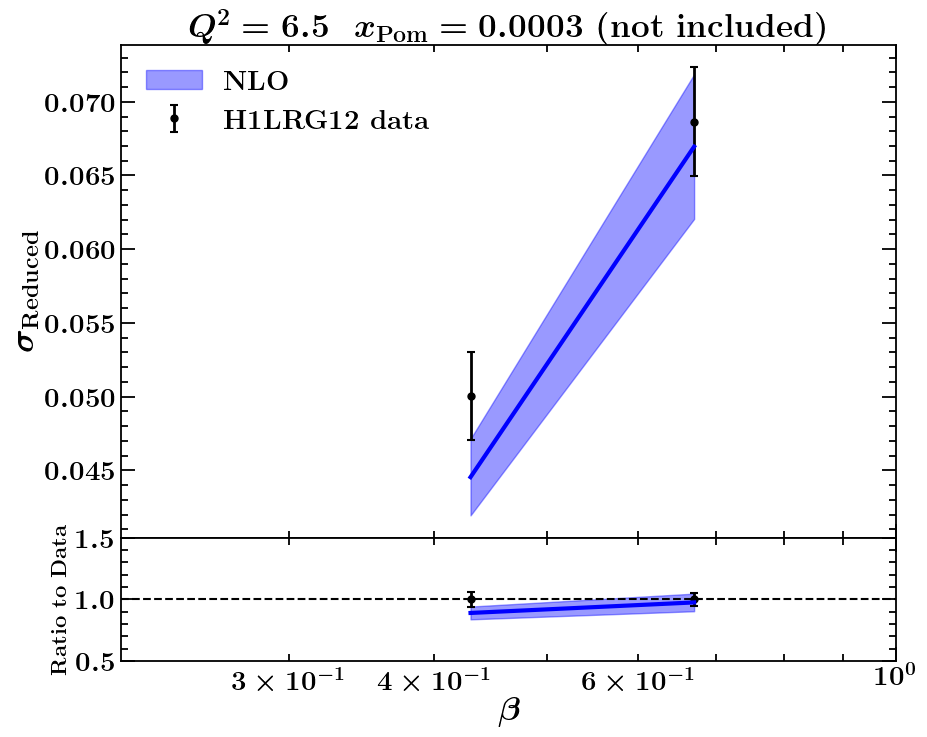

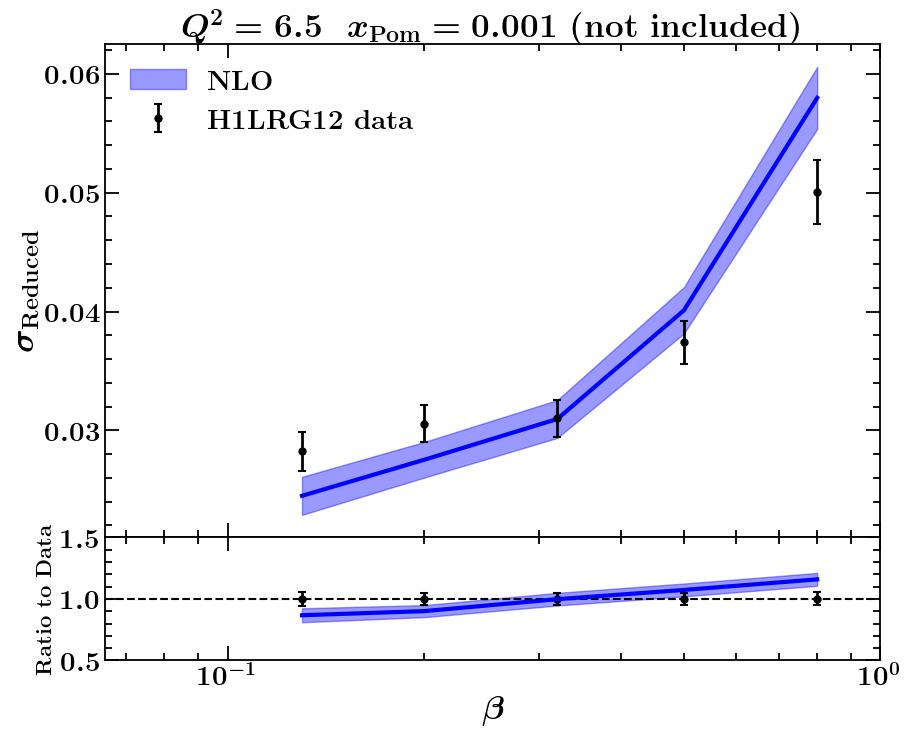

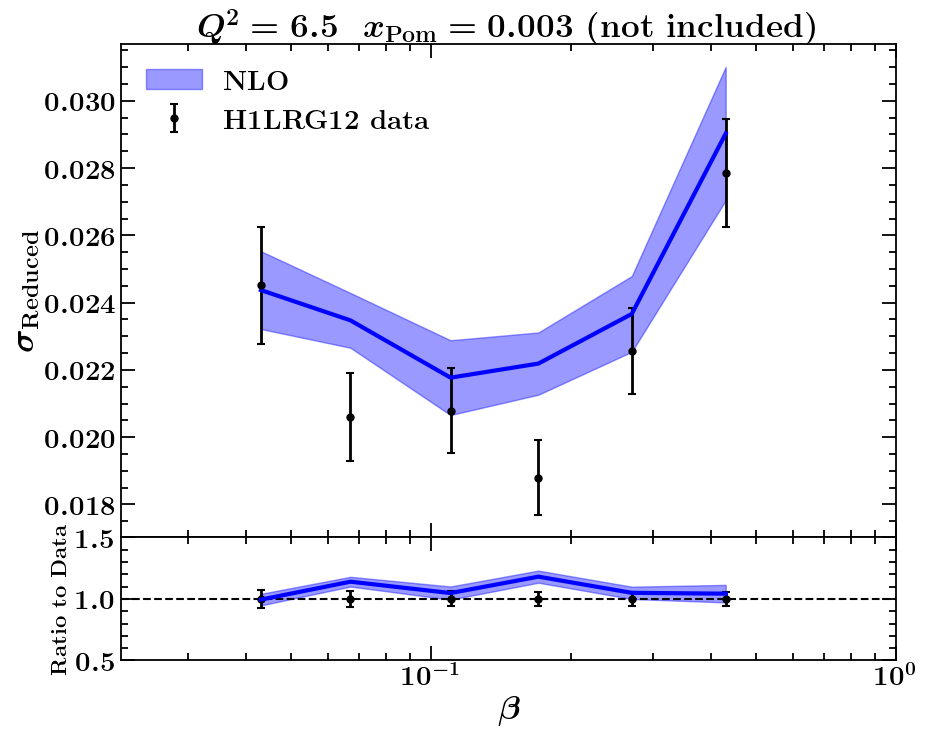

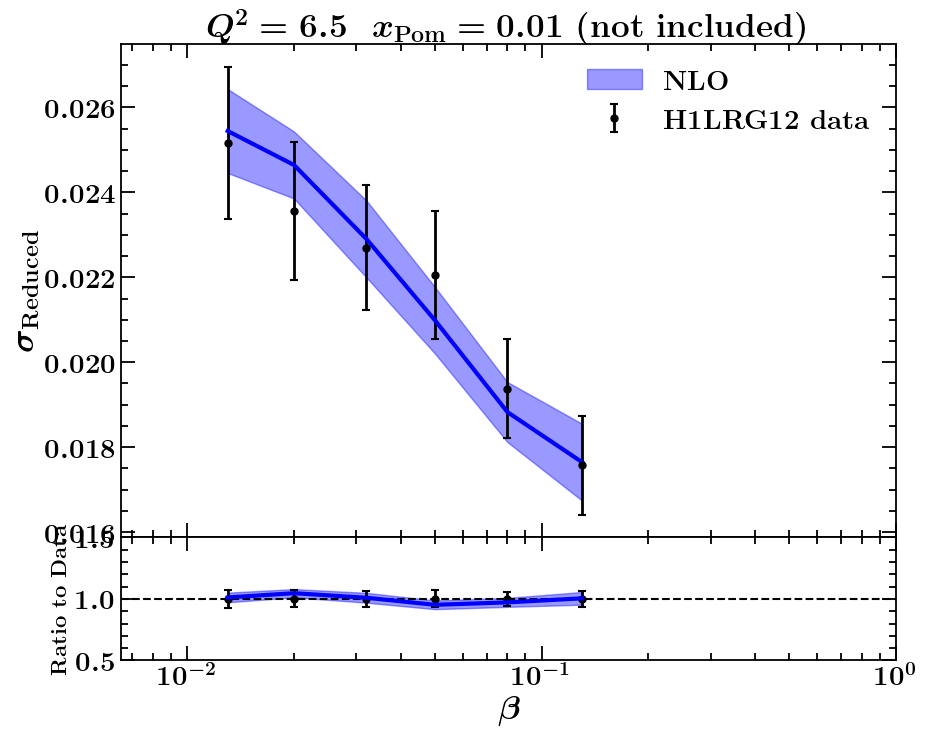

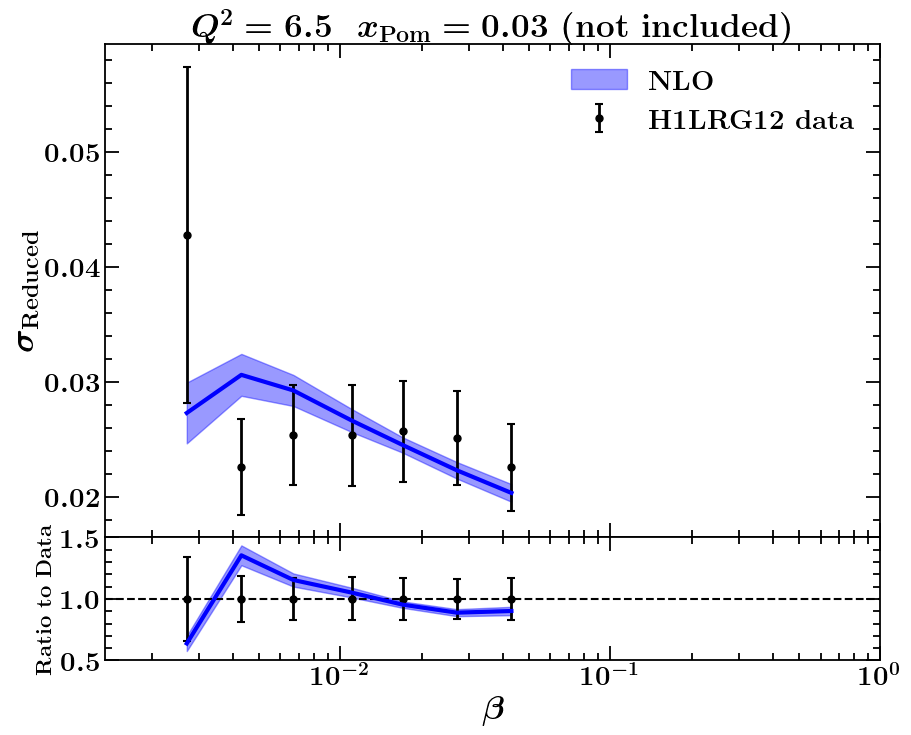

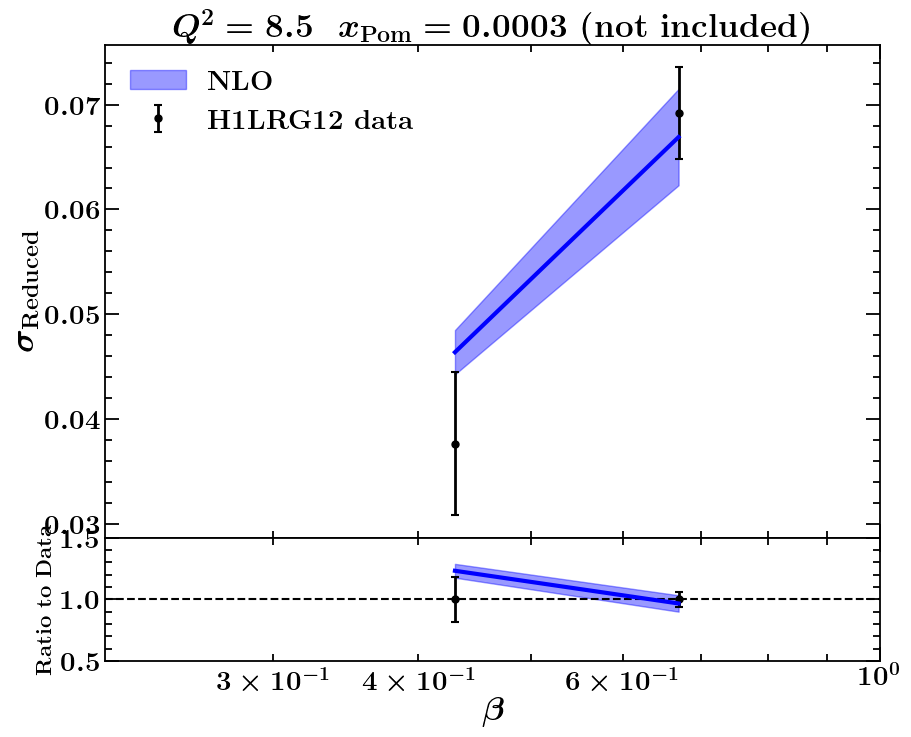

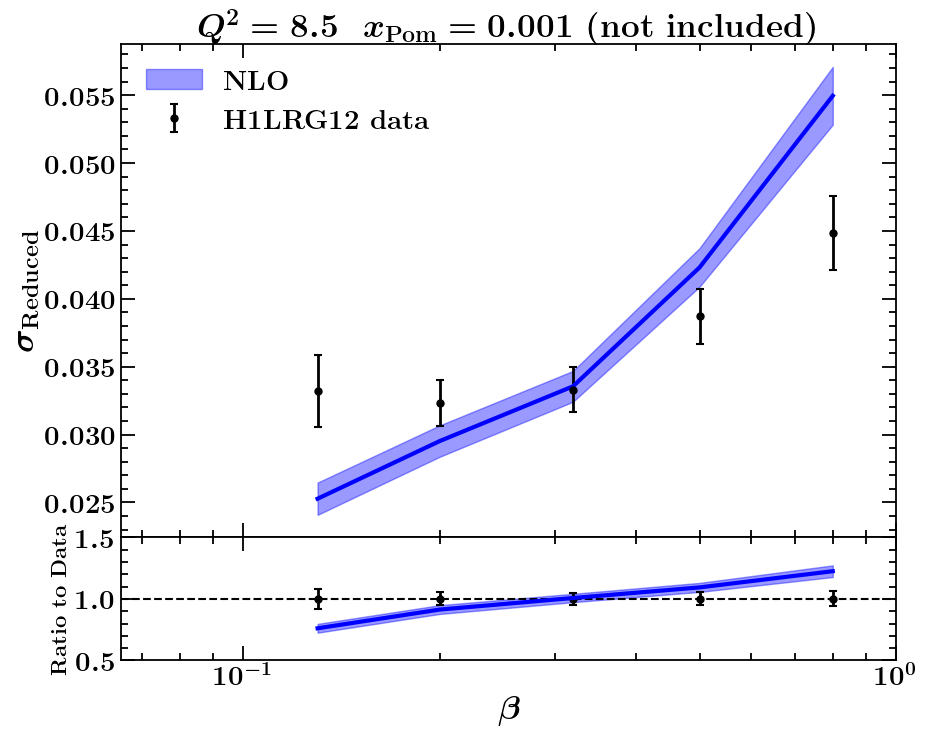

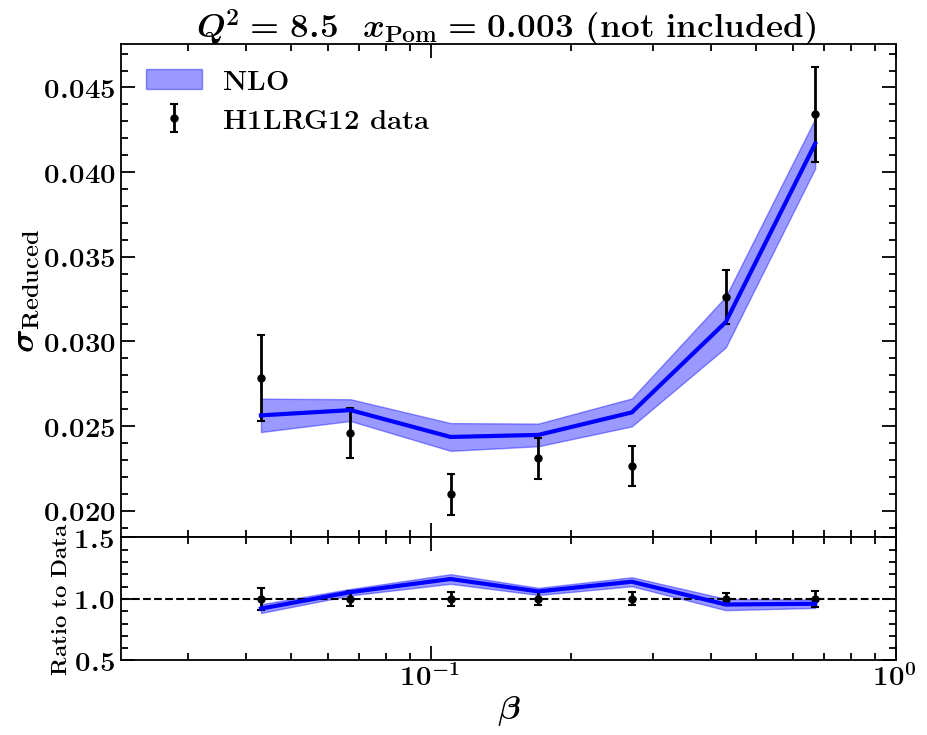

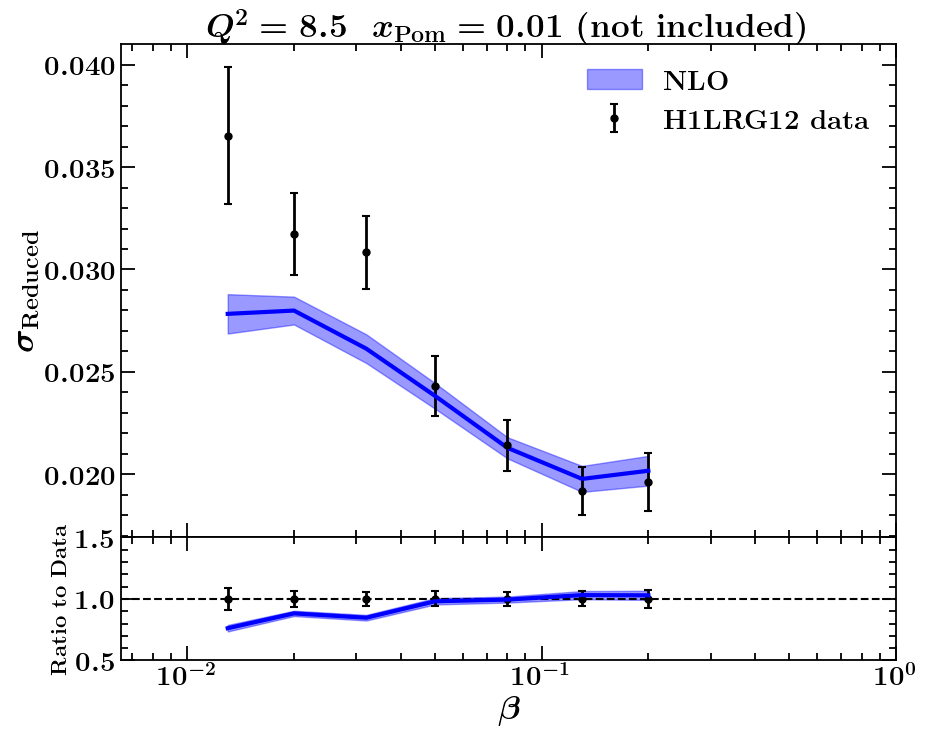

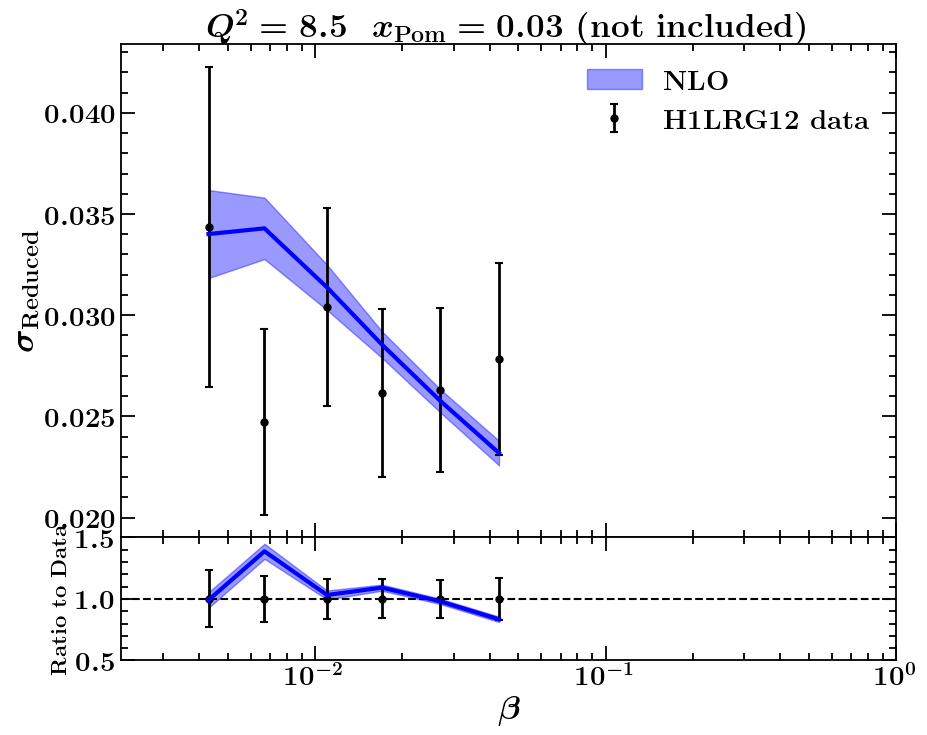

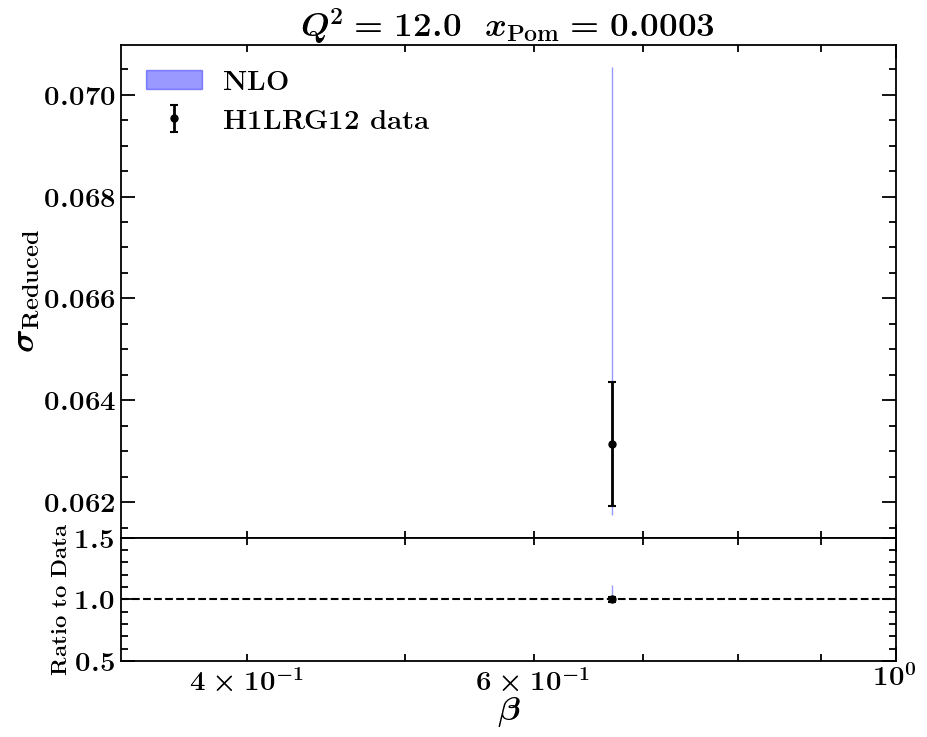

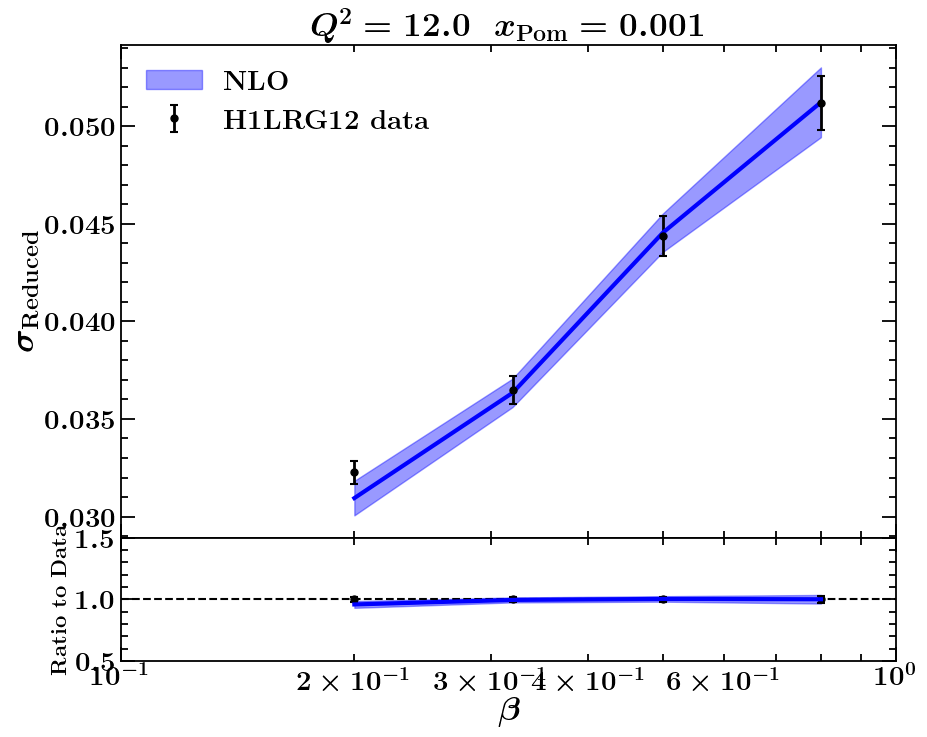

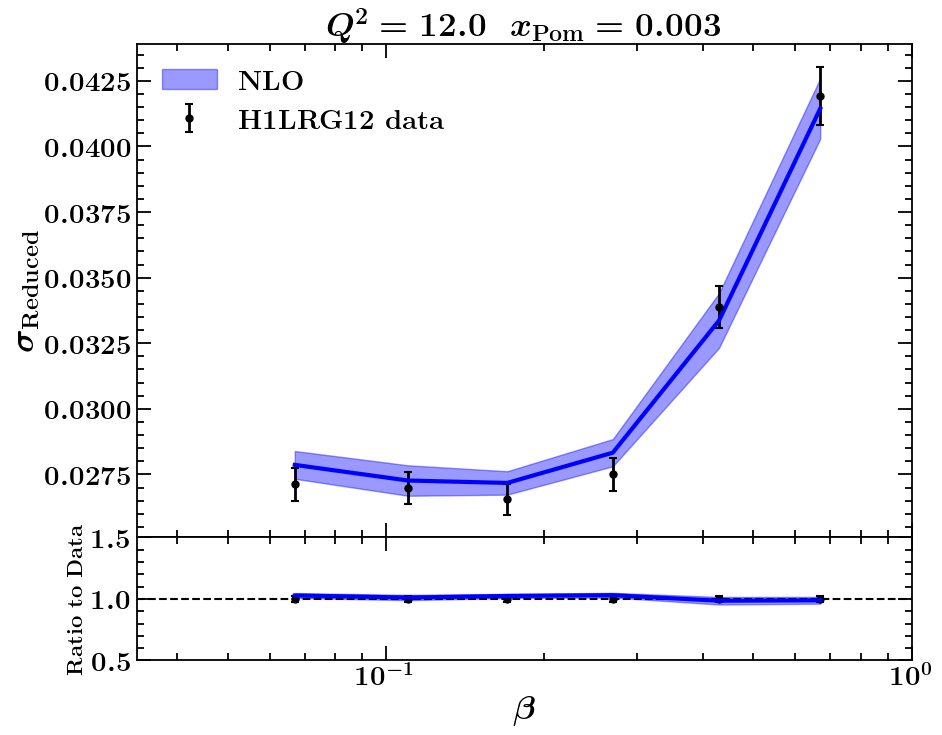

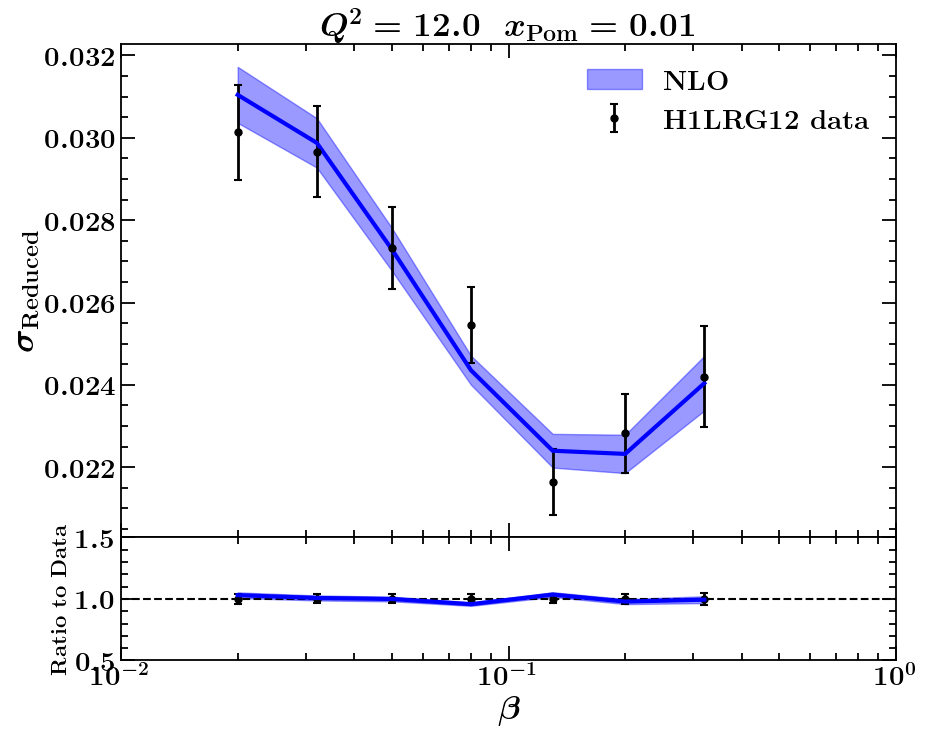

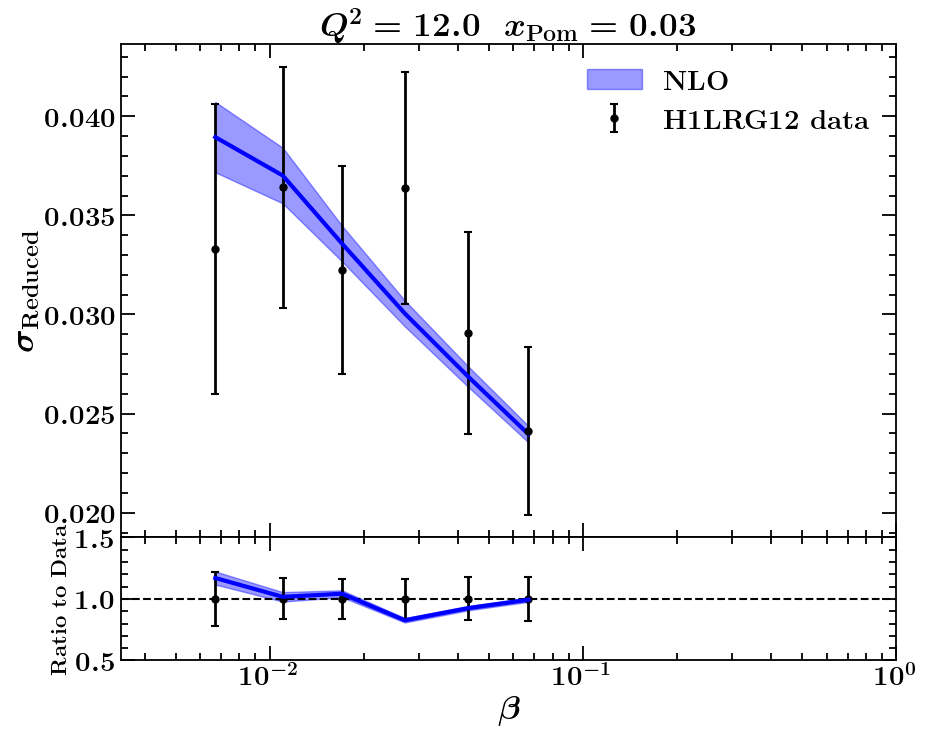

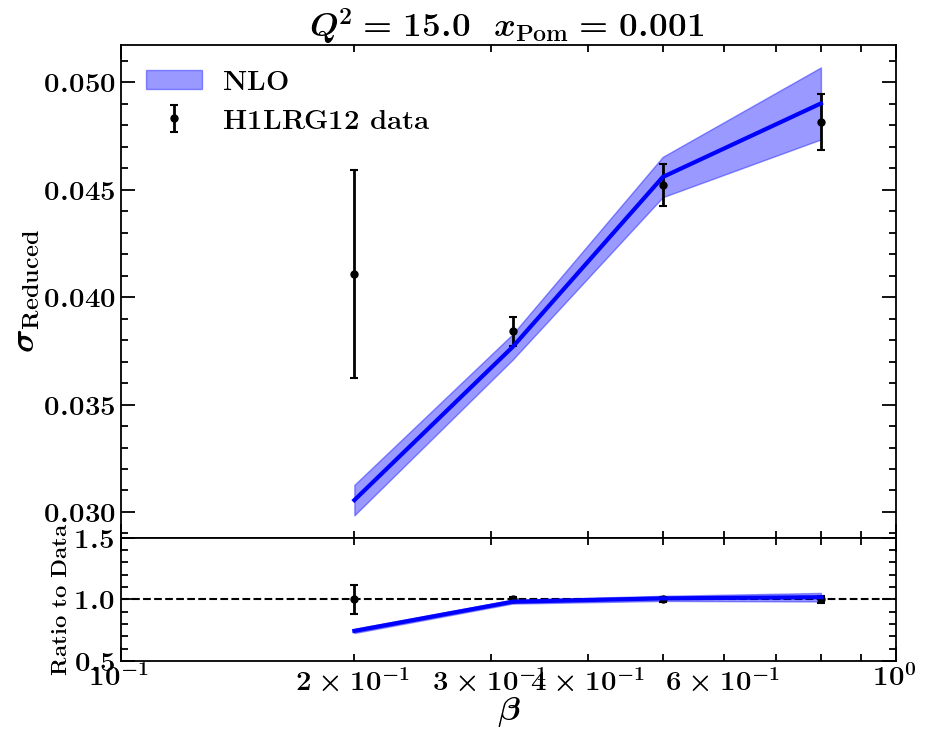

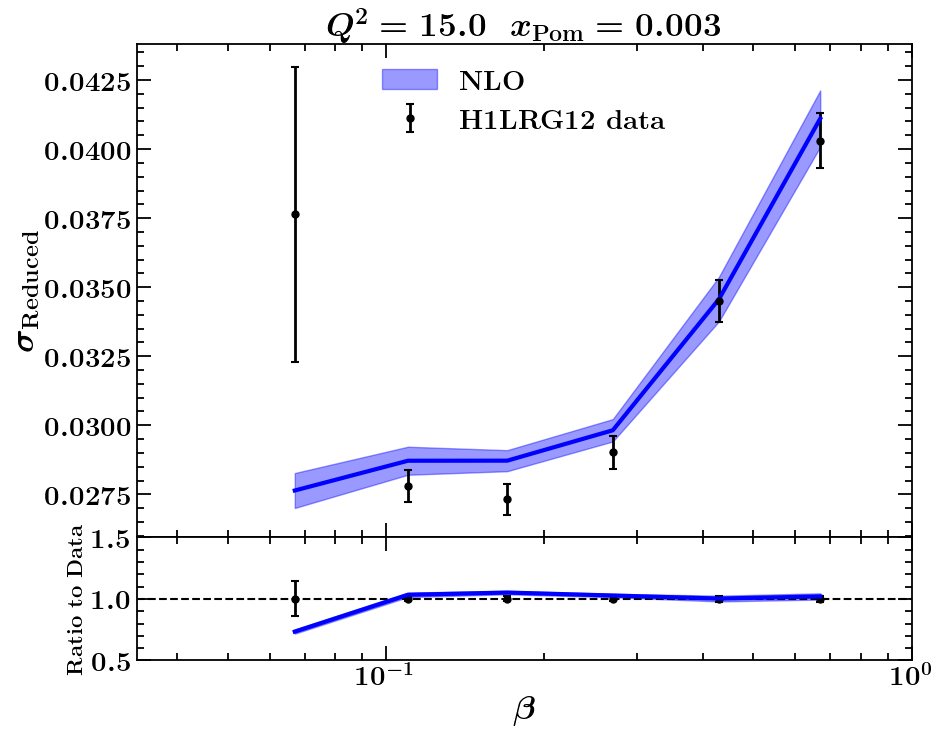

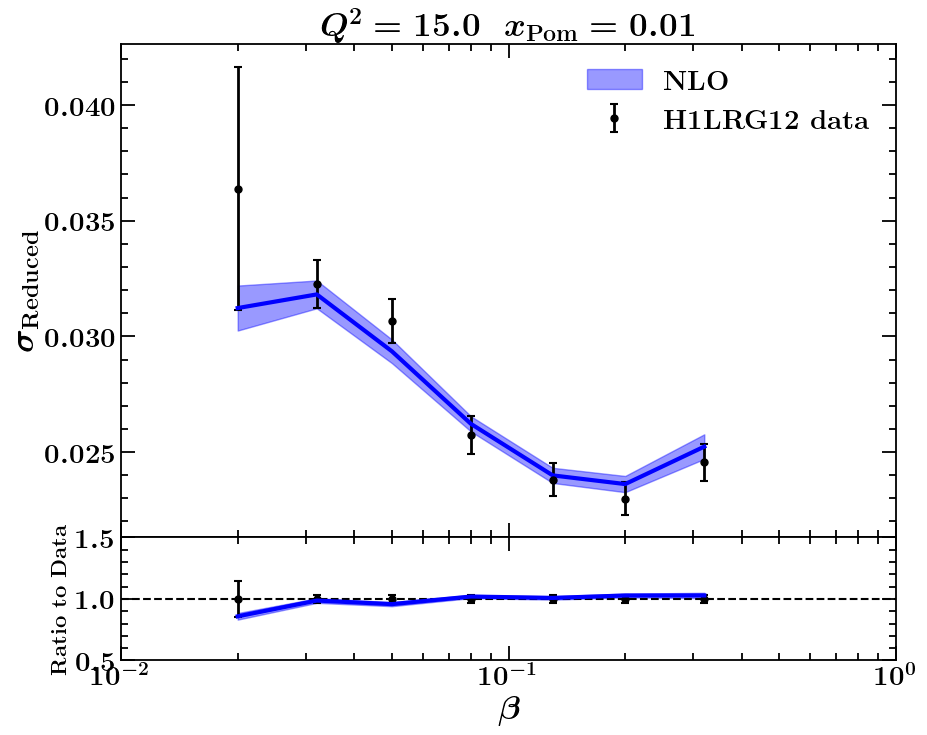

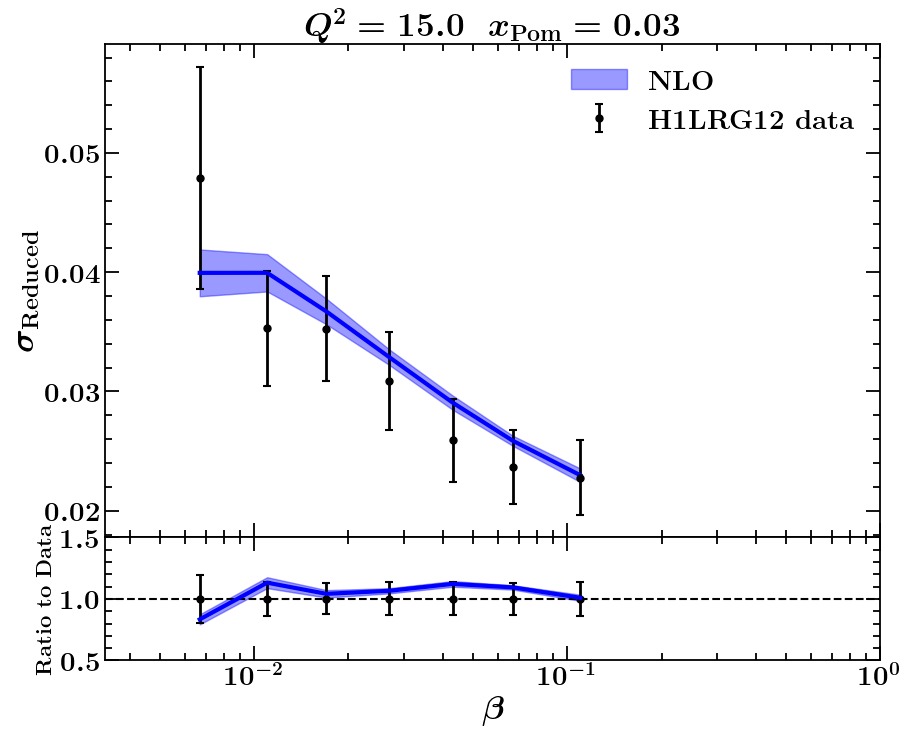

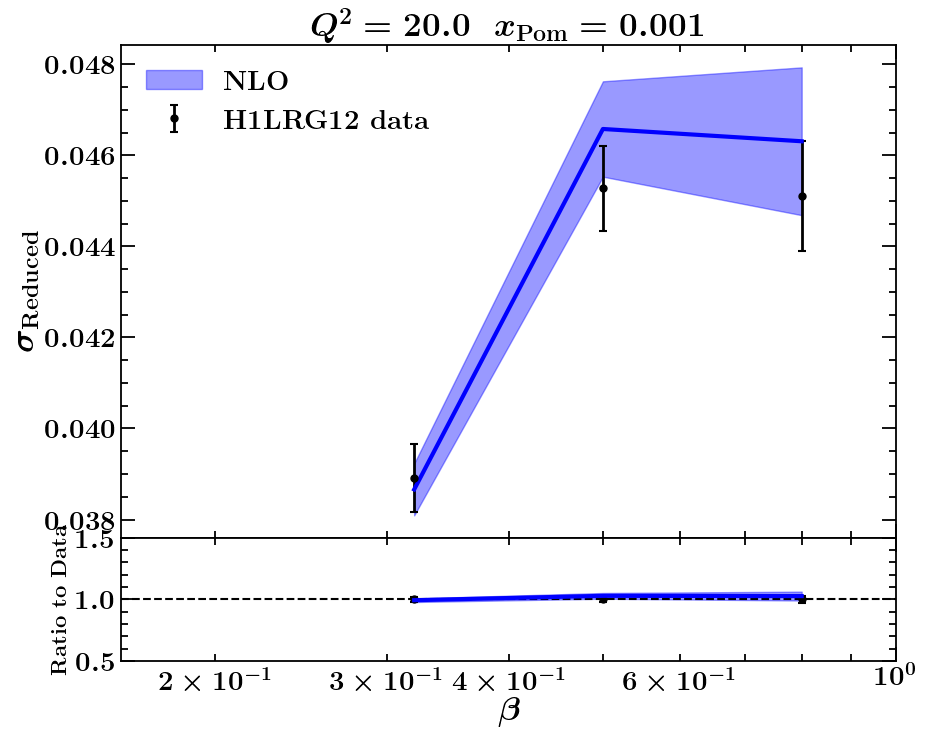

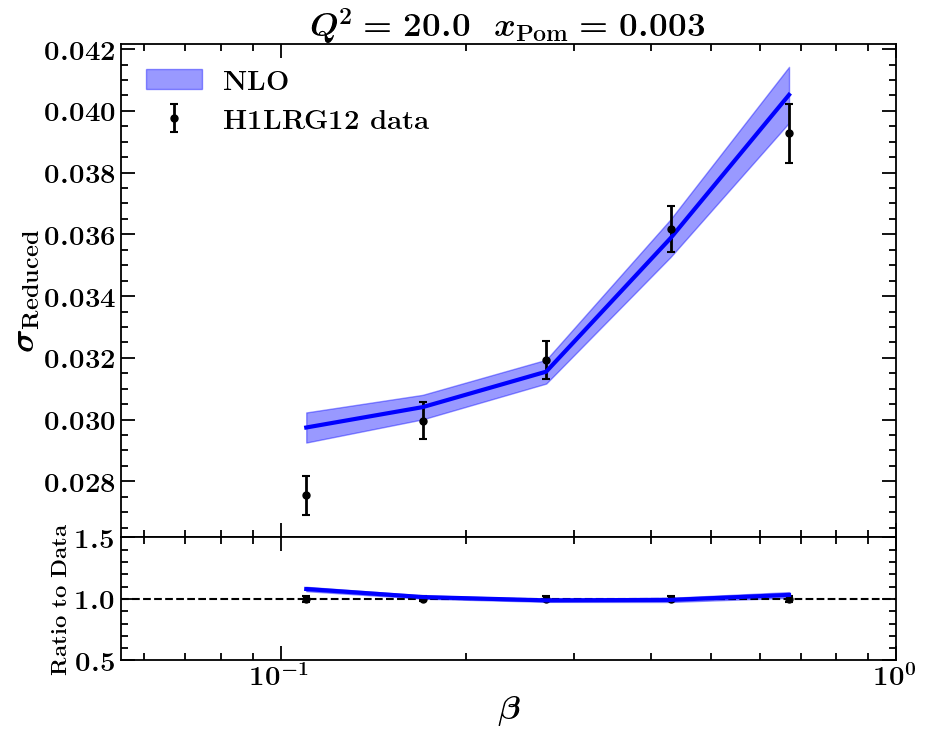

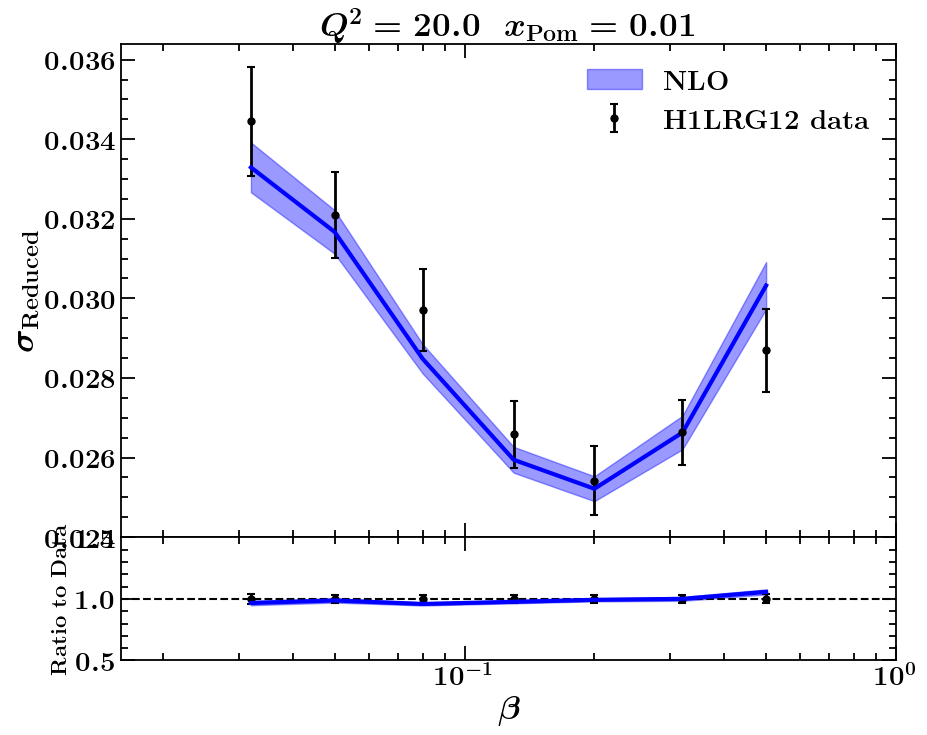

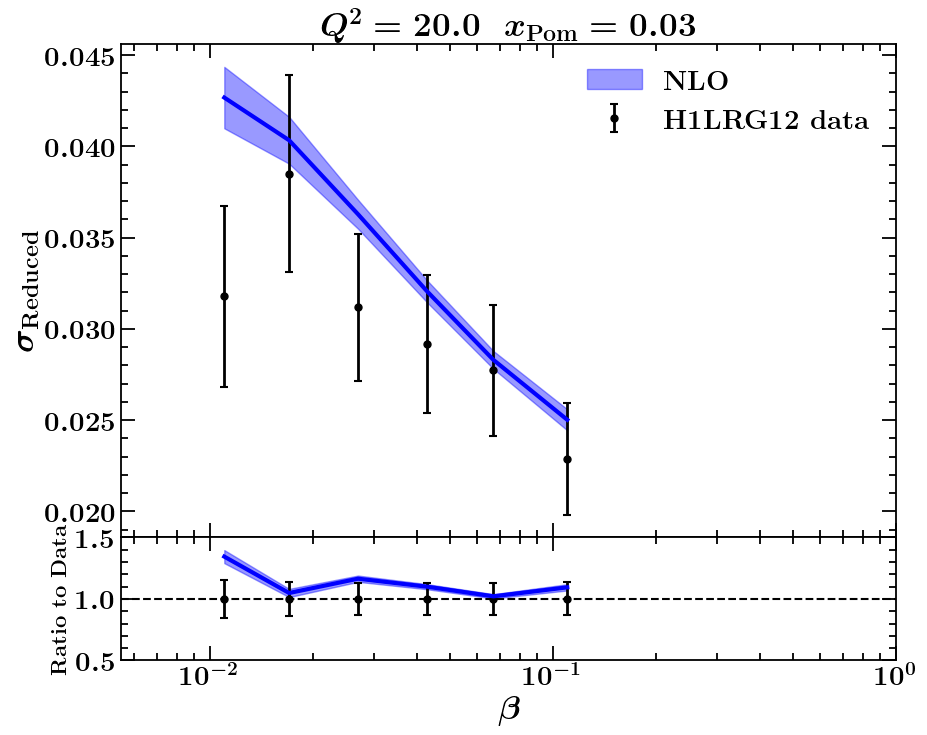

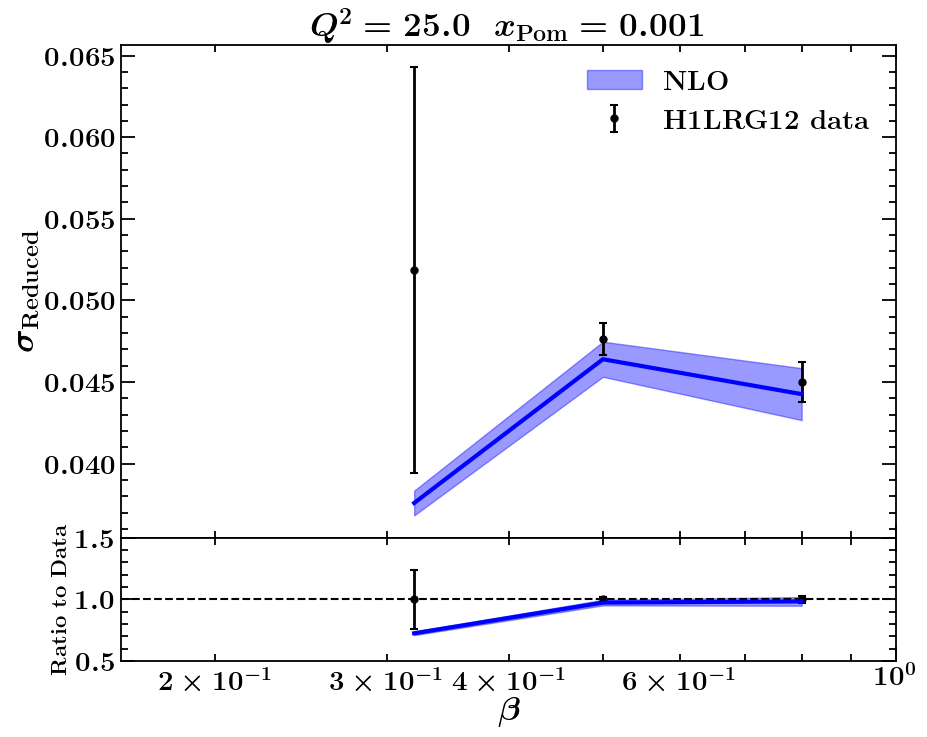

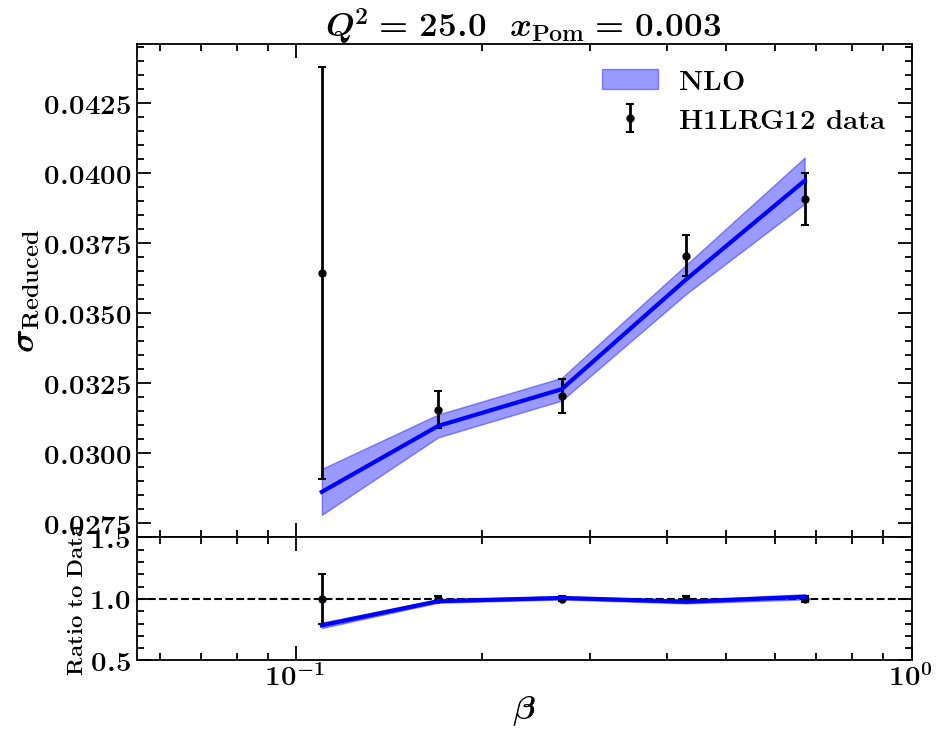

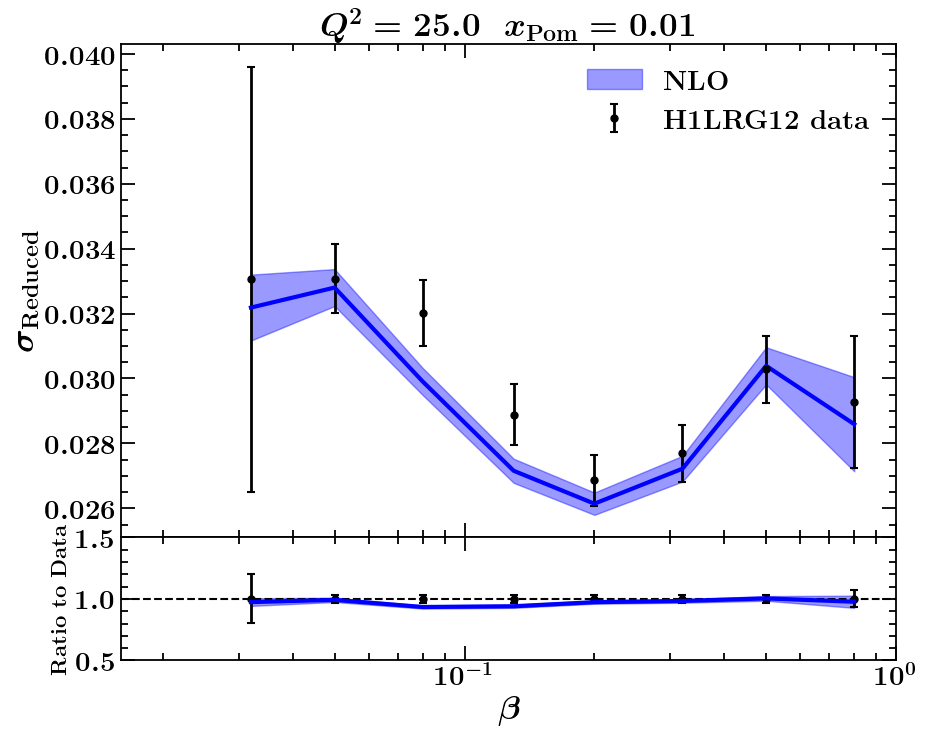

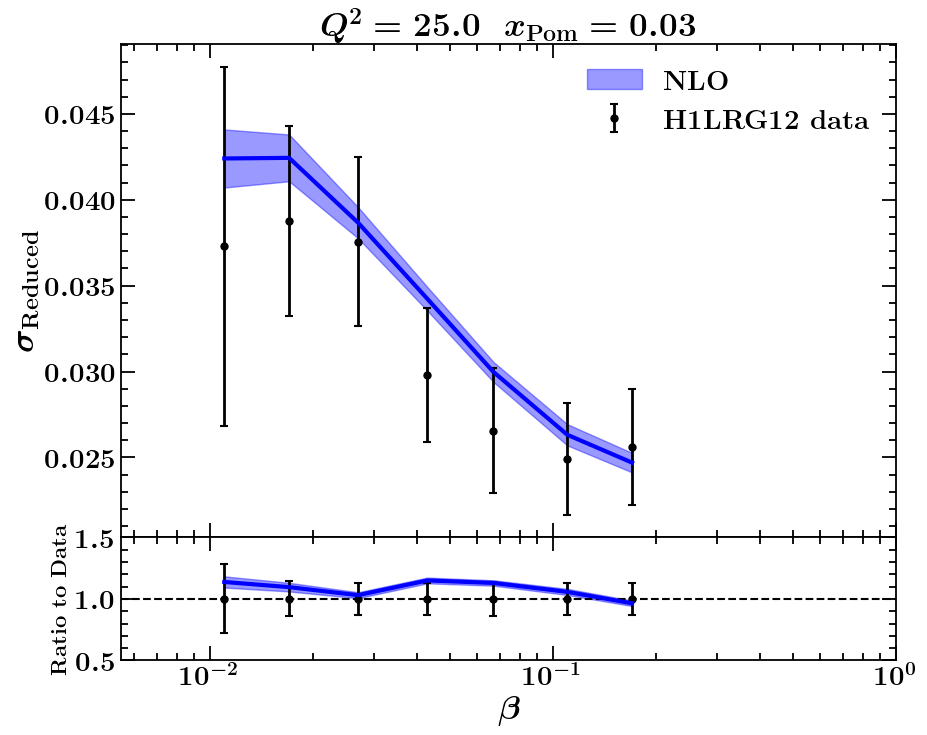

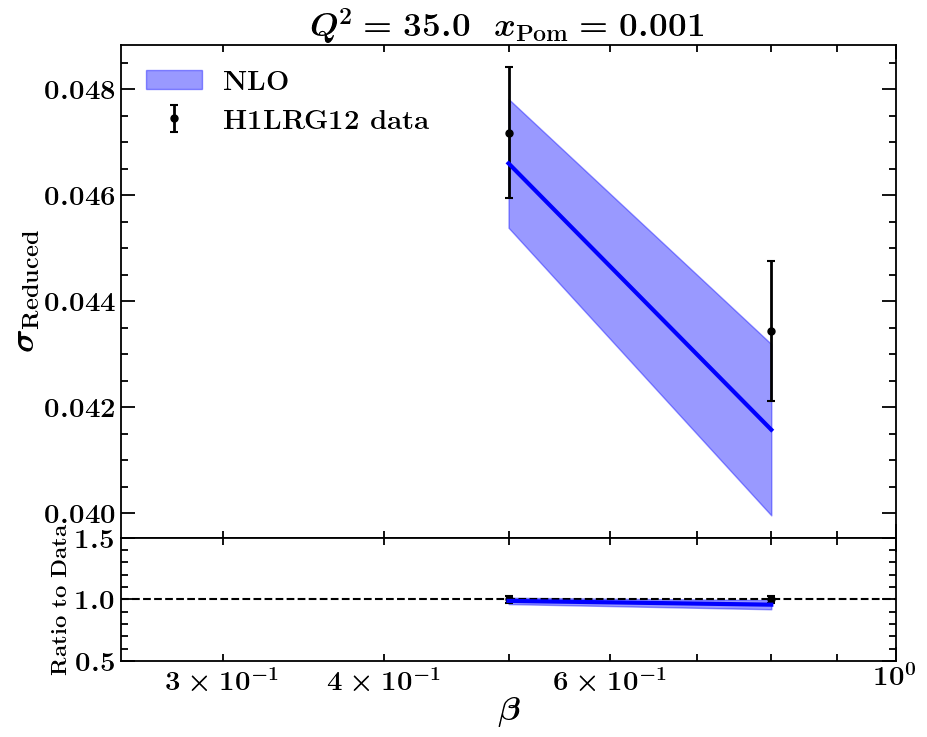

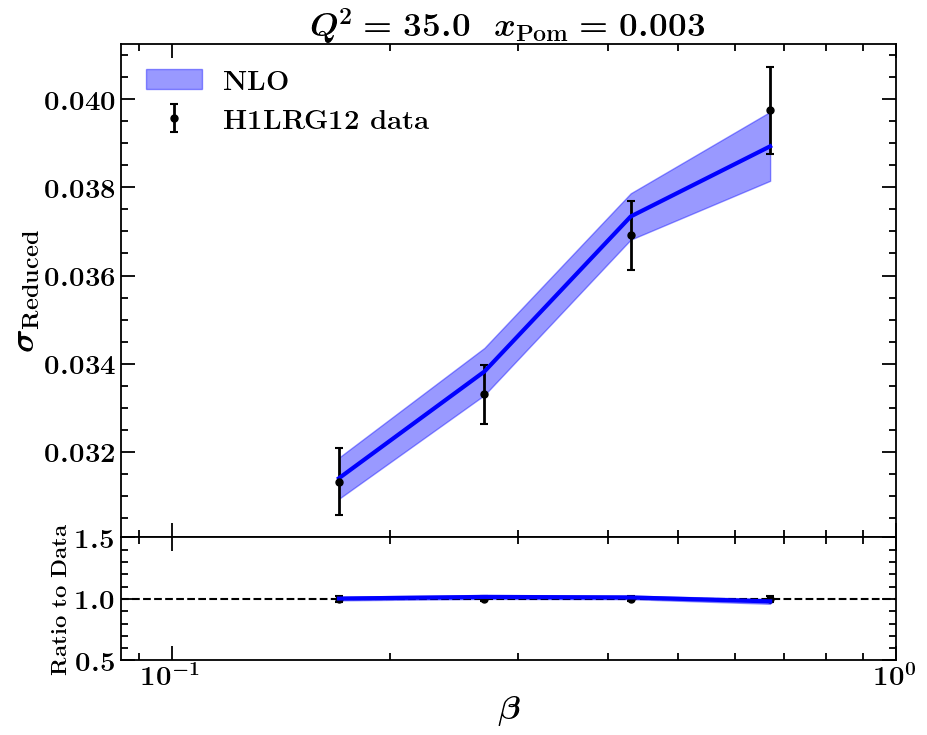

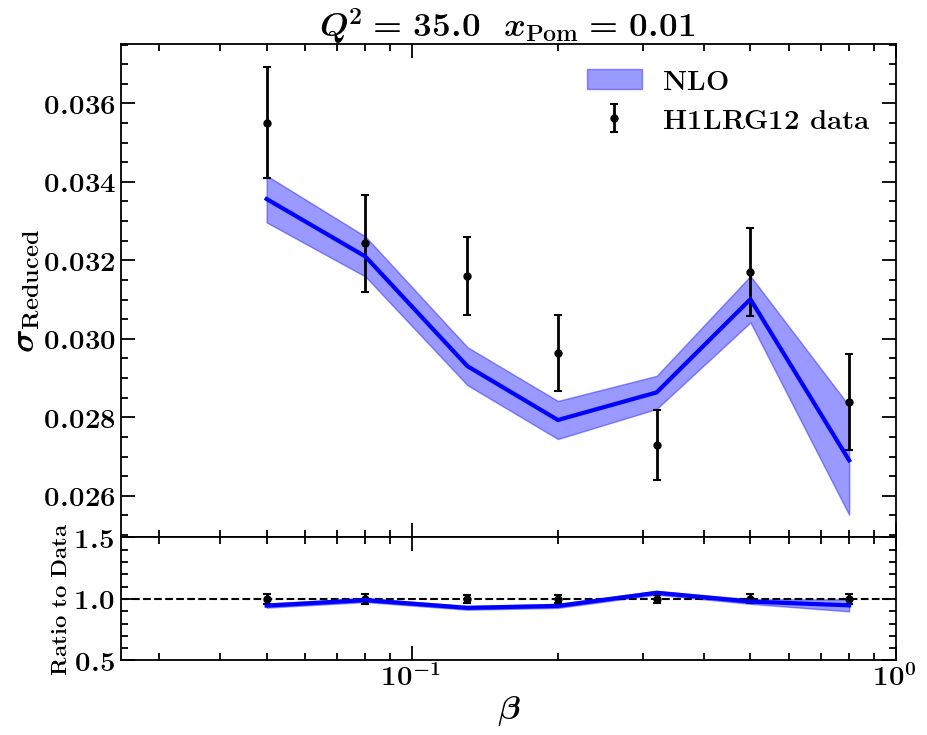

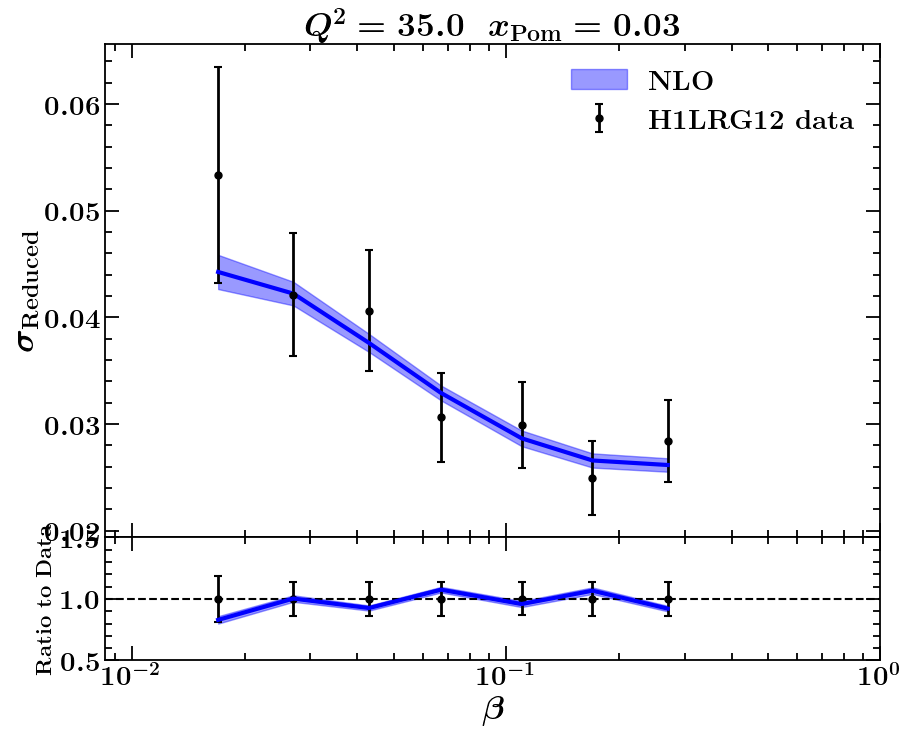

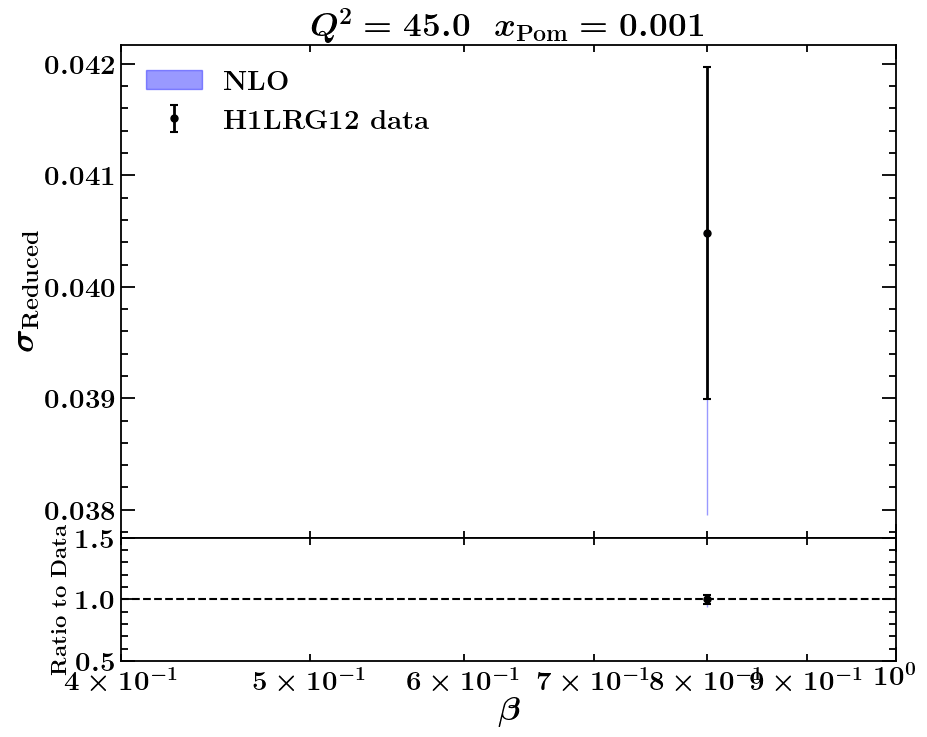

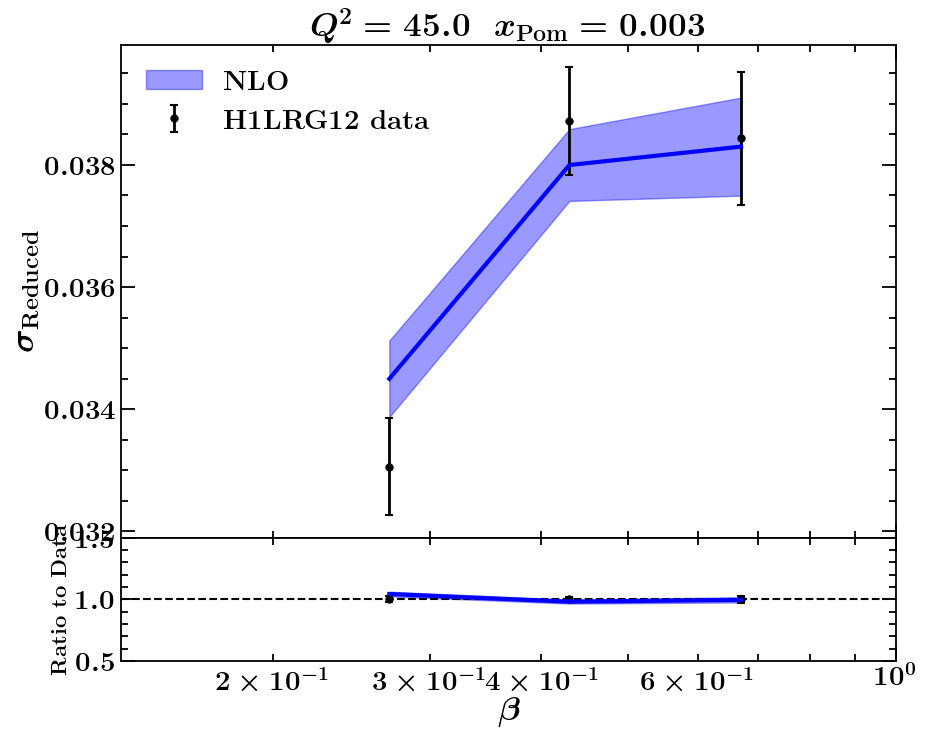

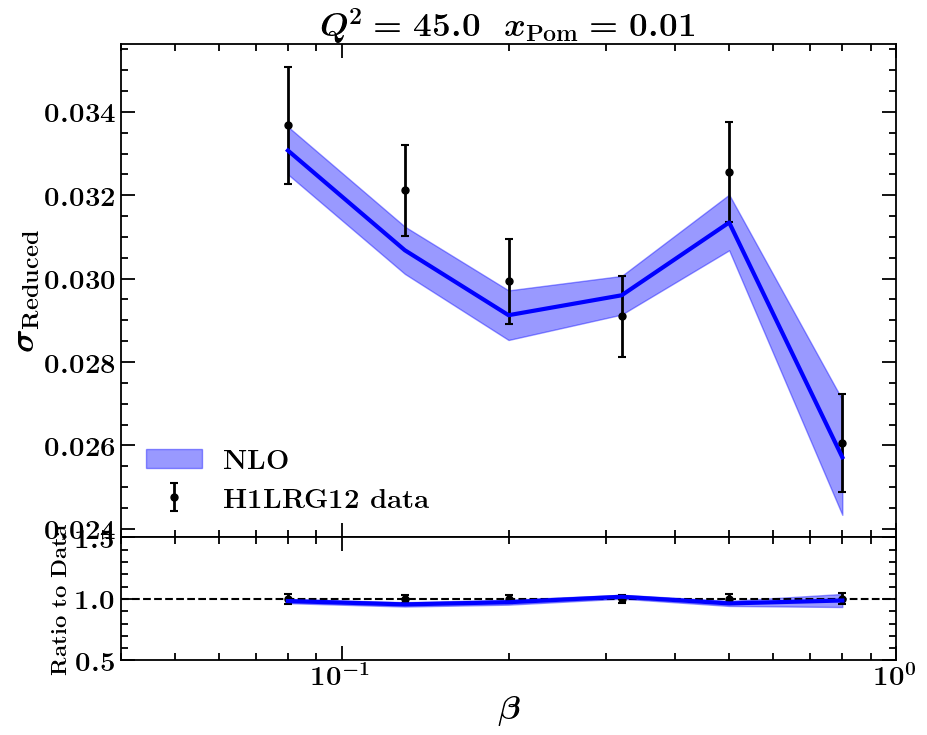

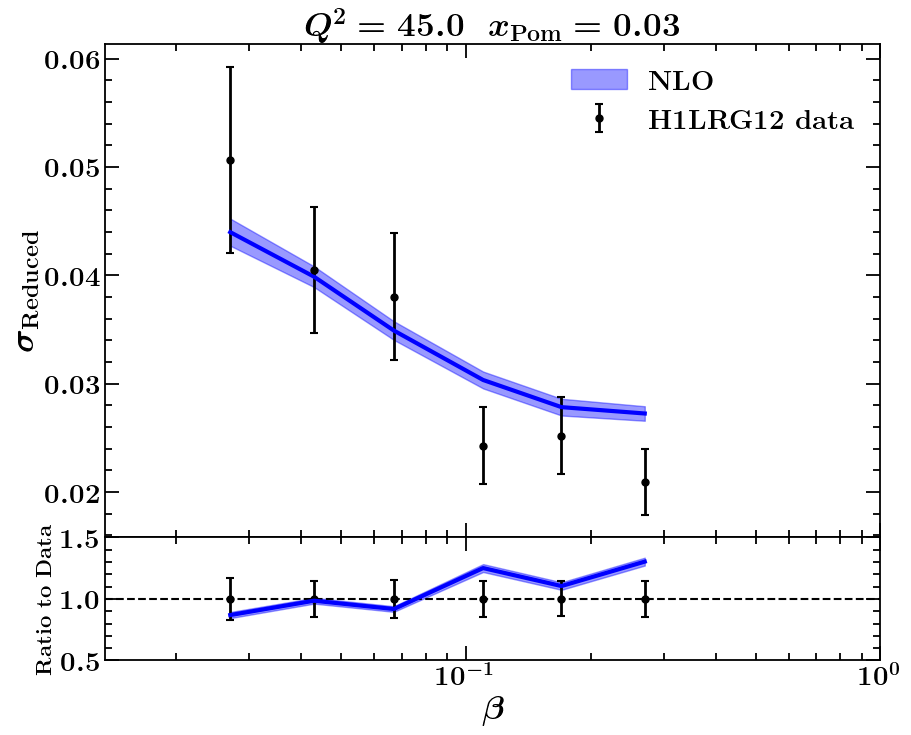

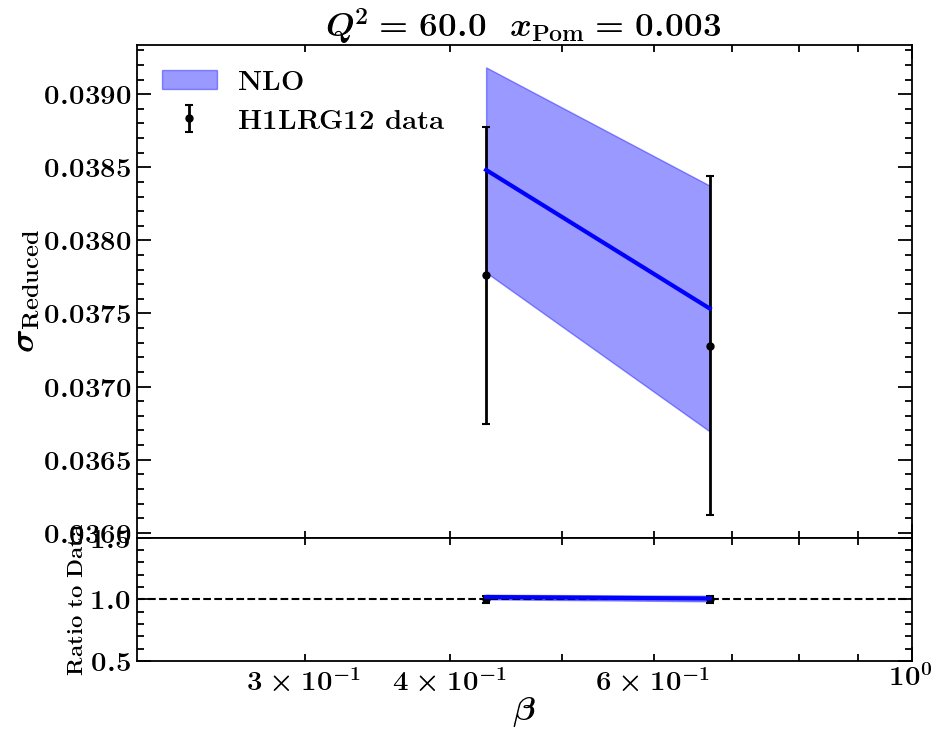

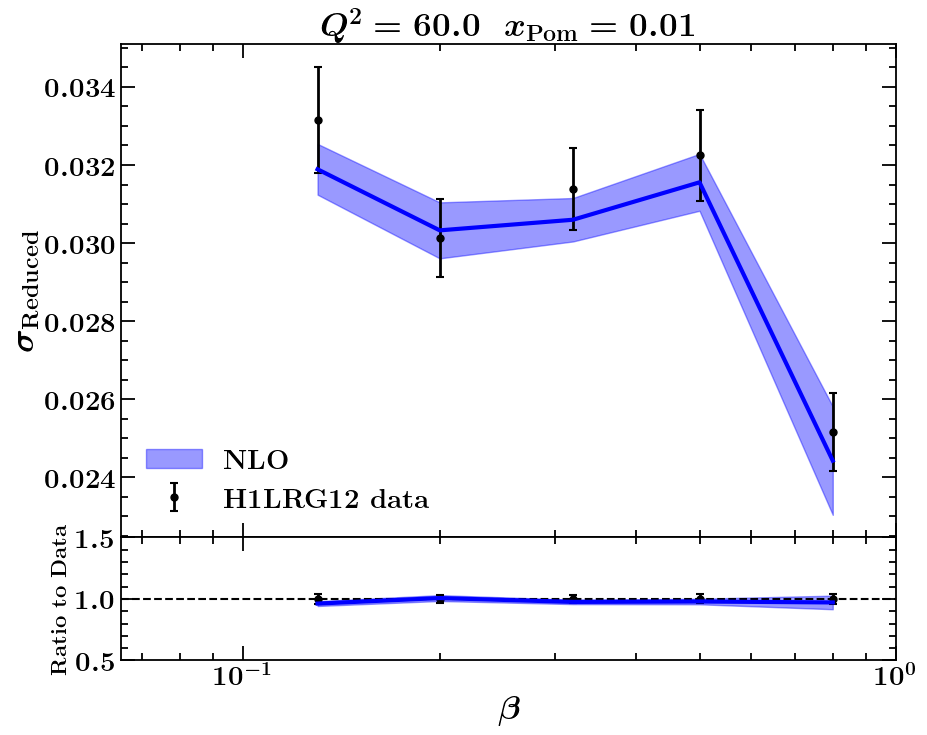

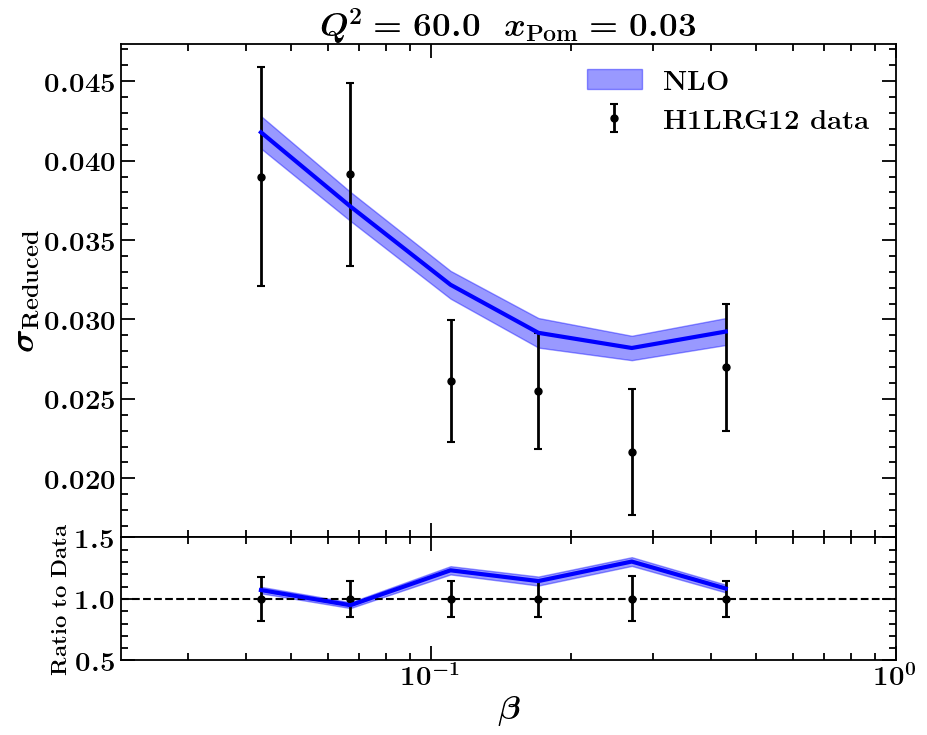

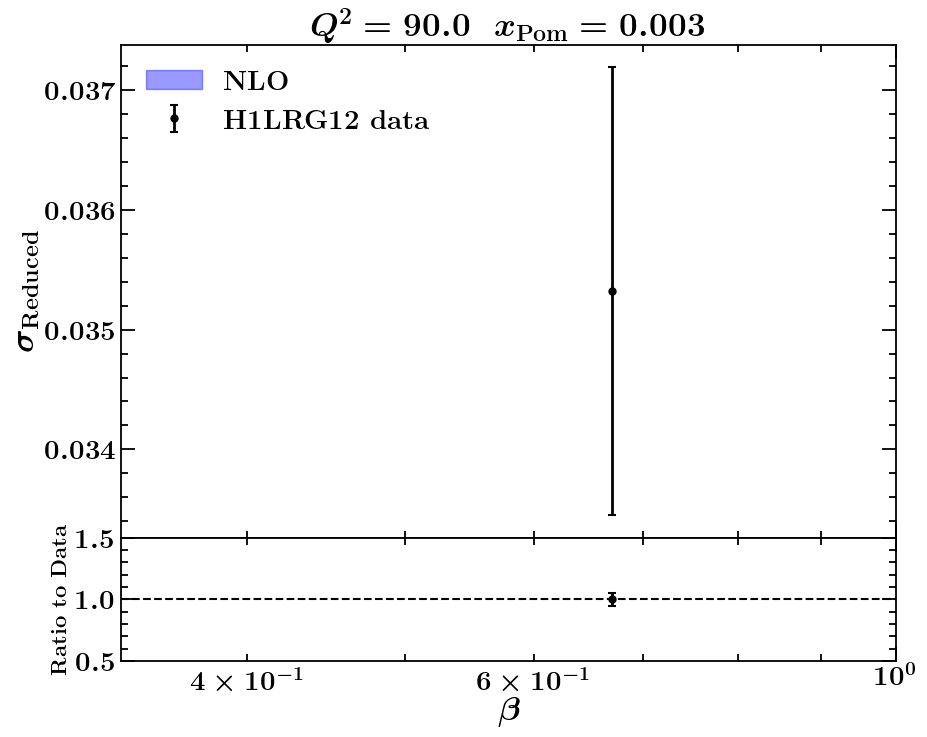

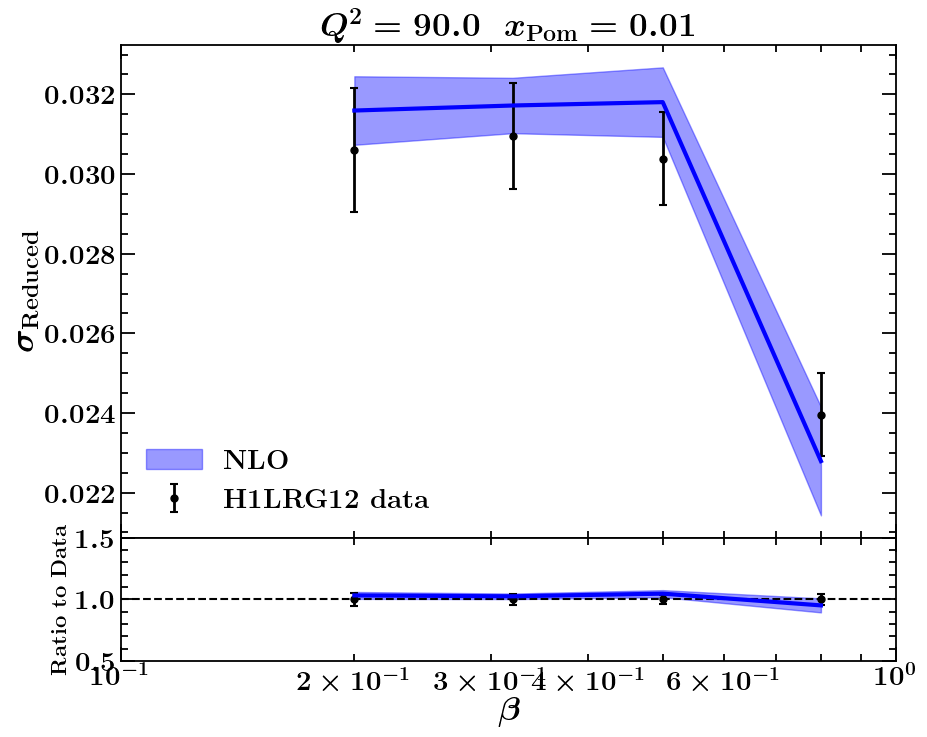

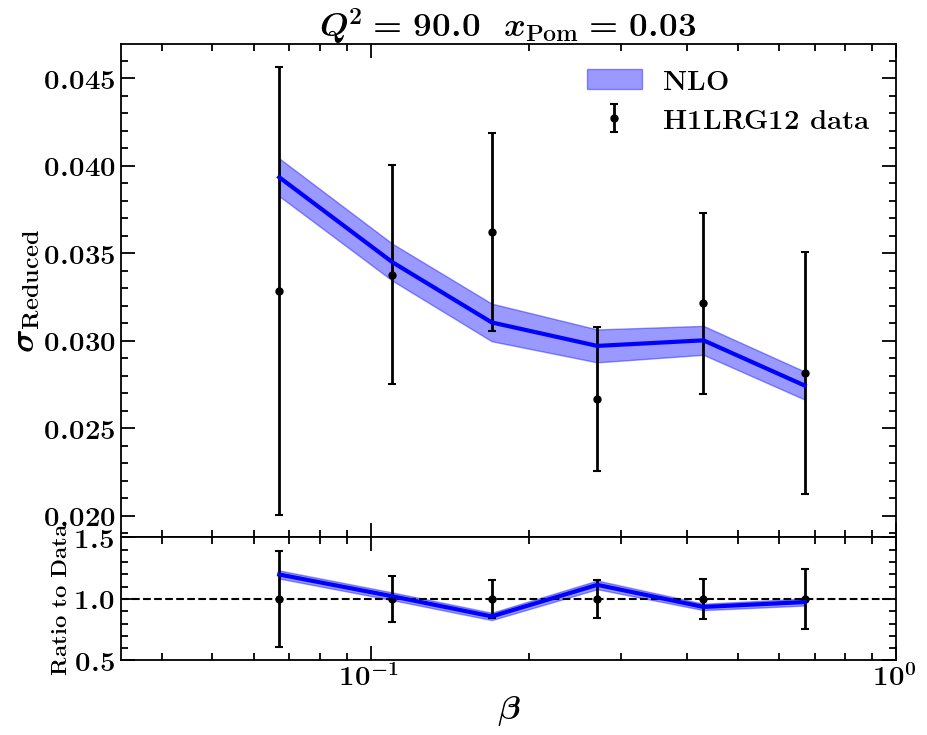

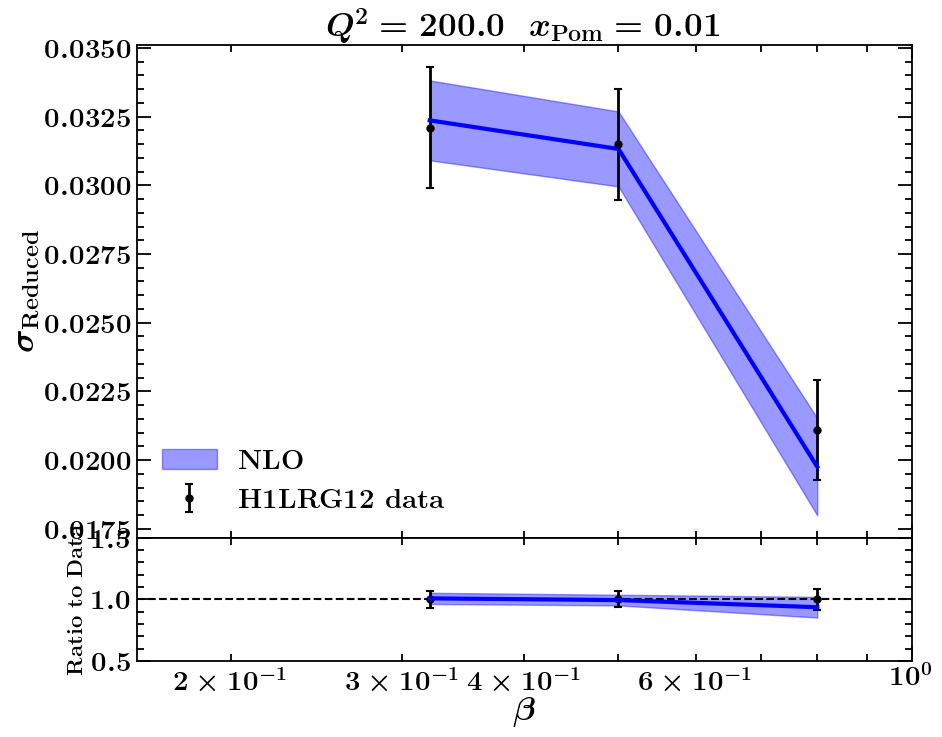

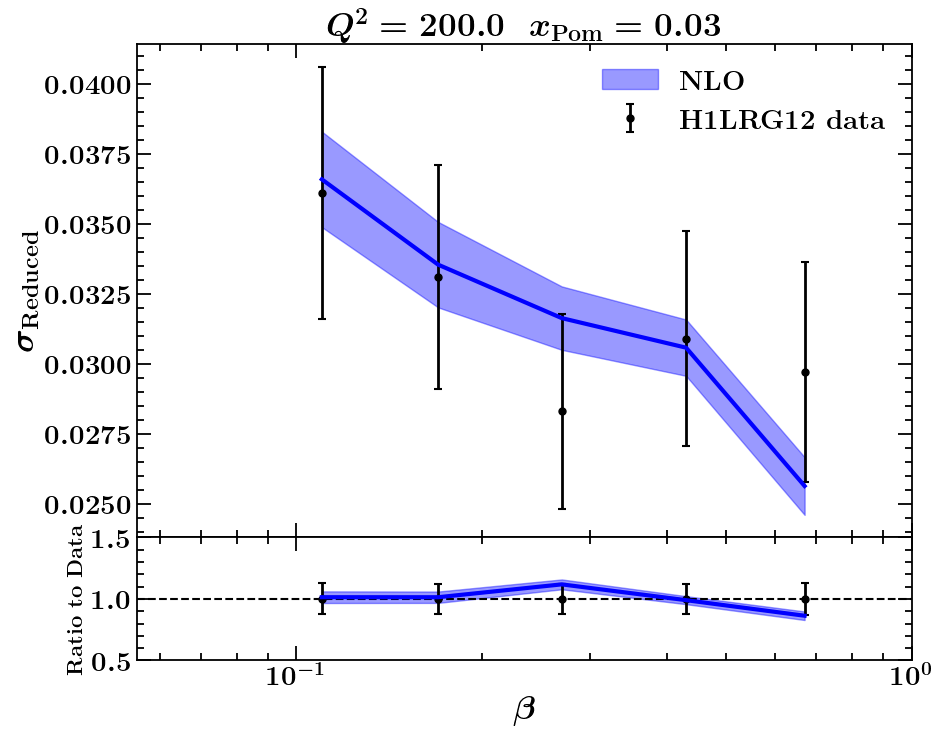

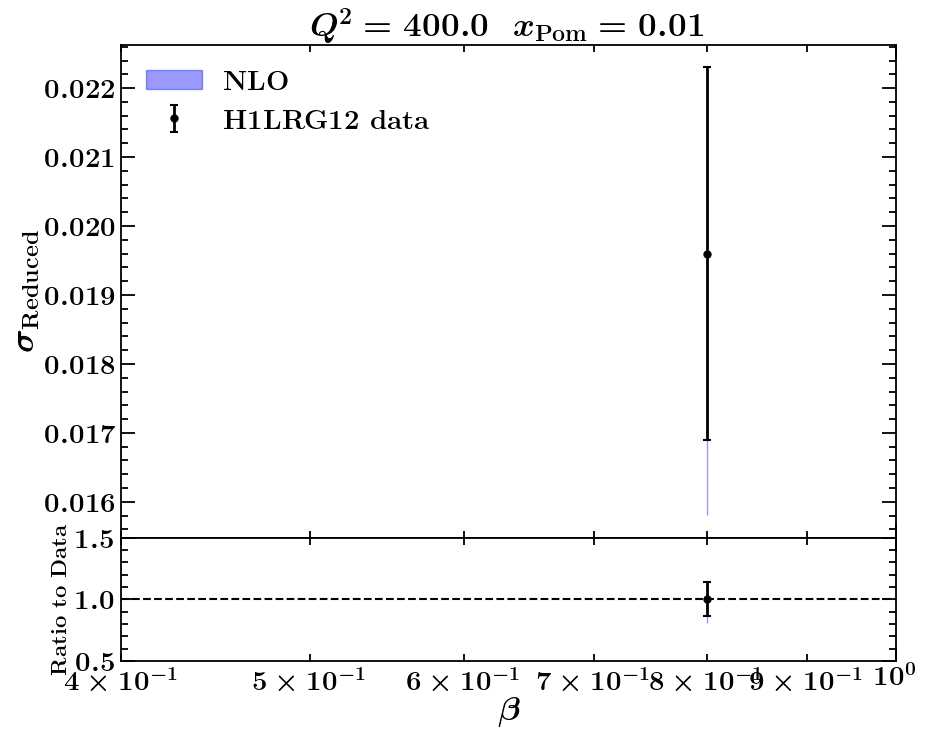

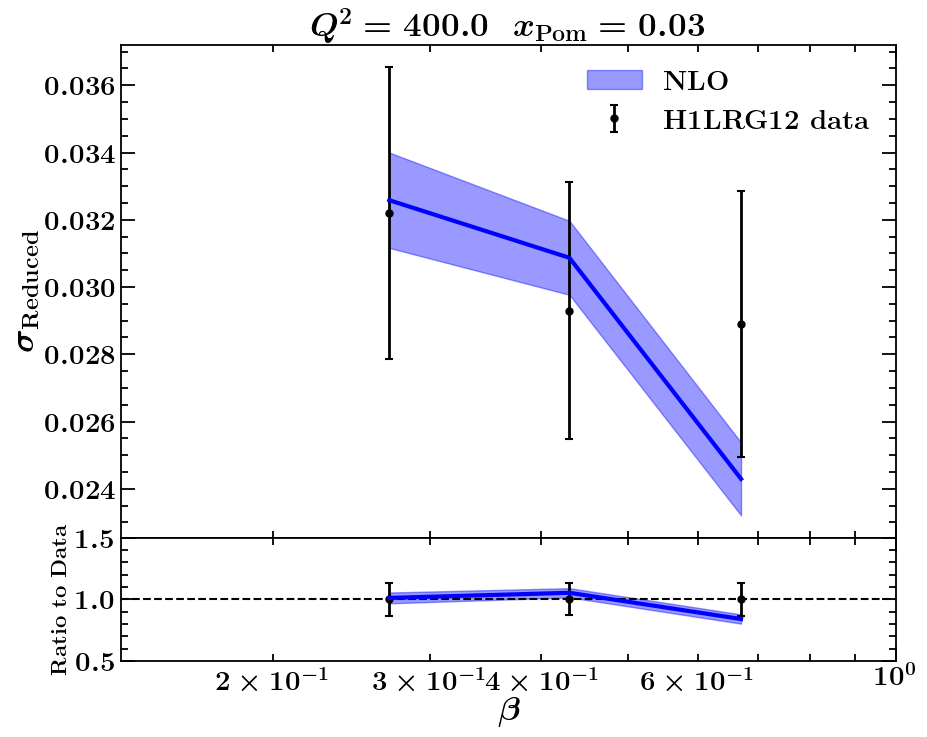

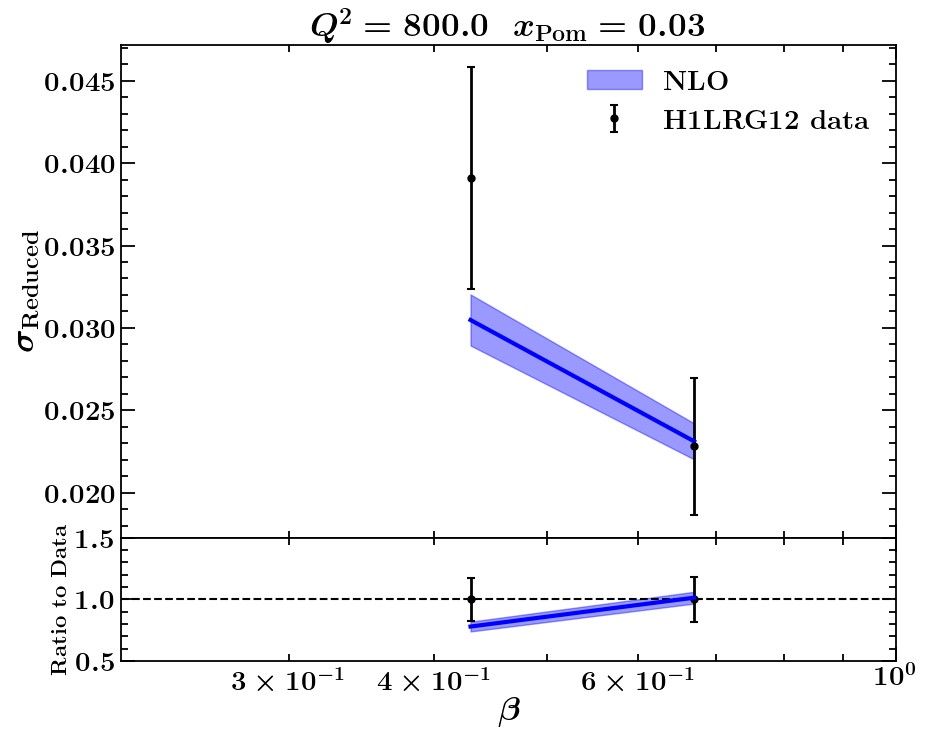

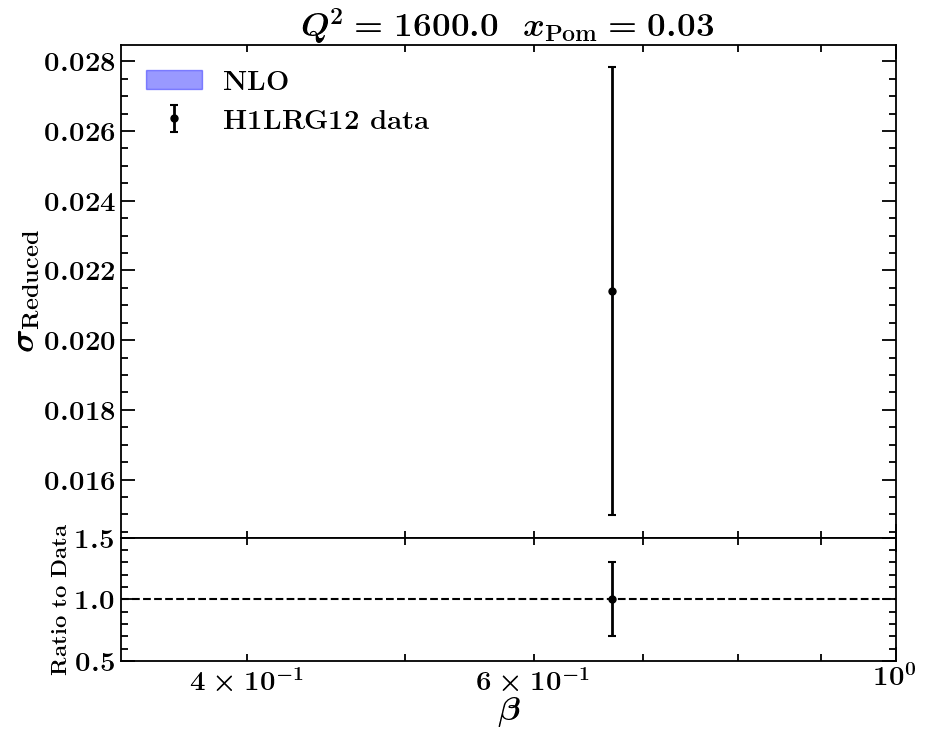

H1LRG11_225


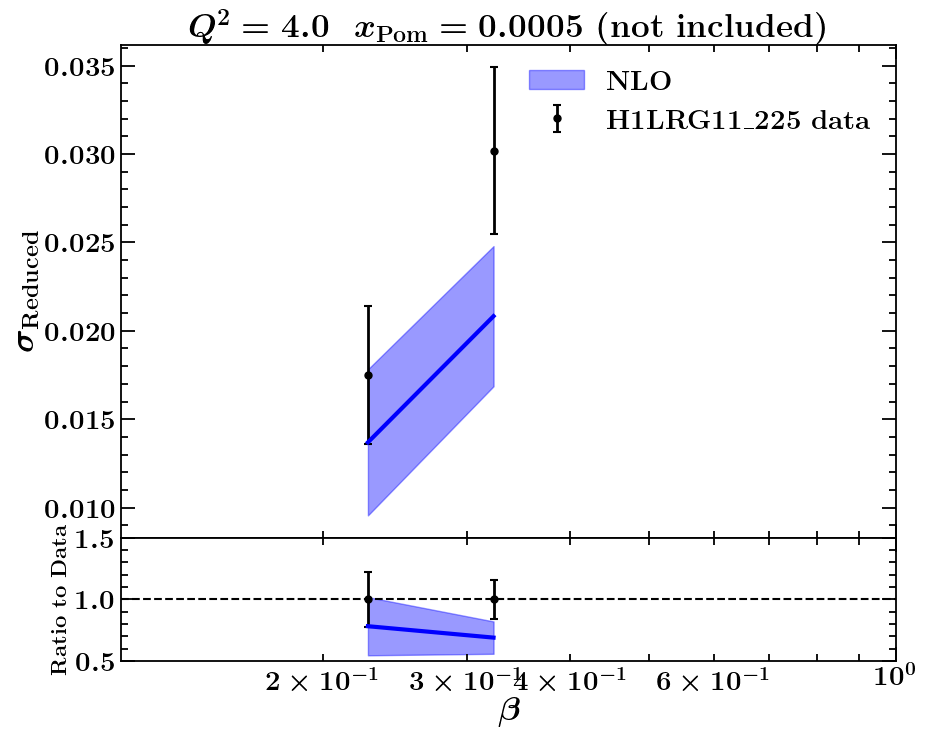

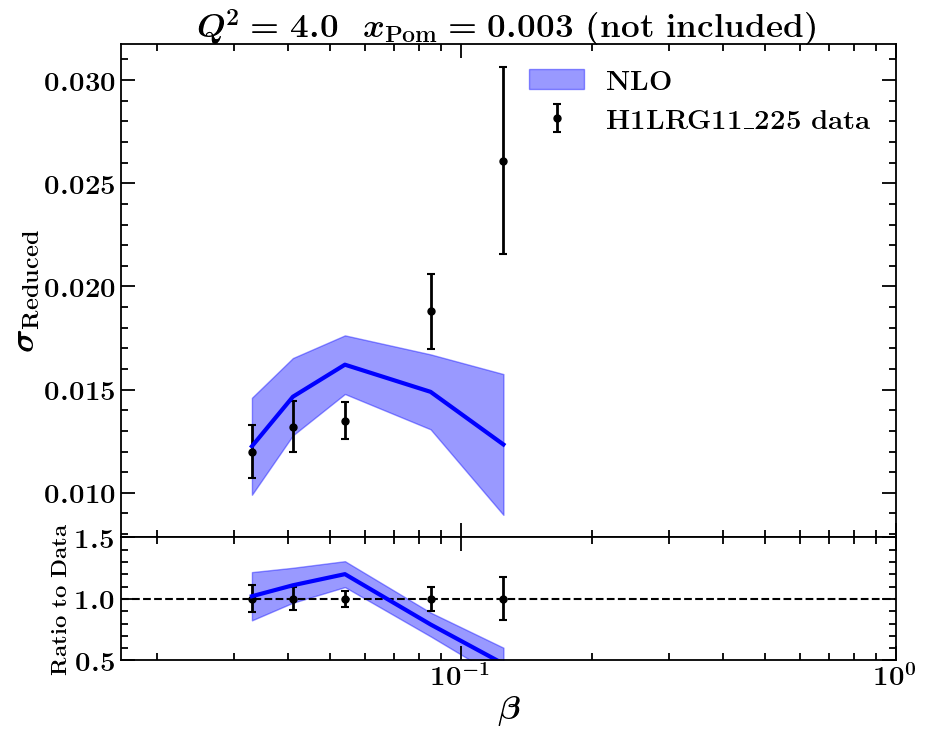

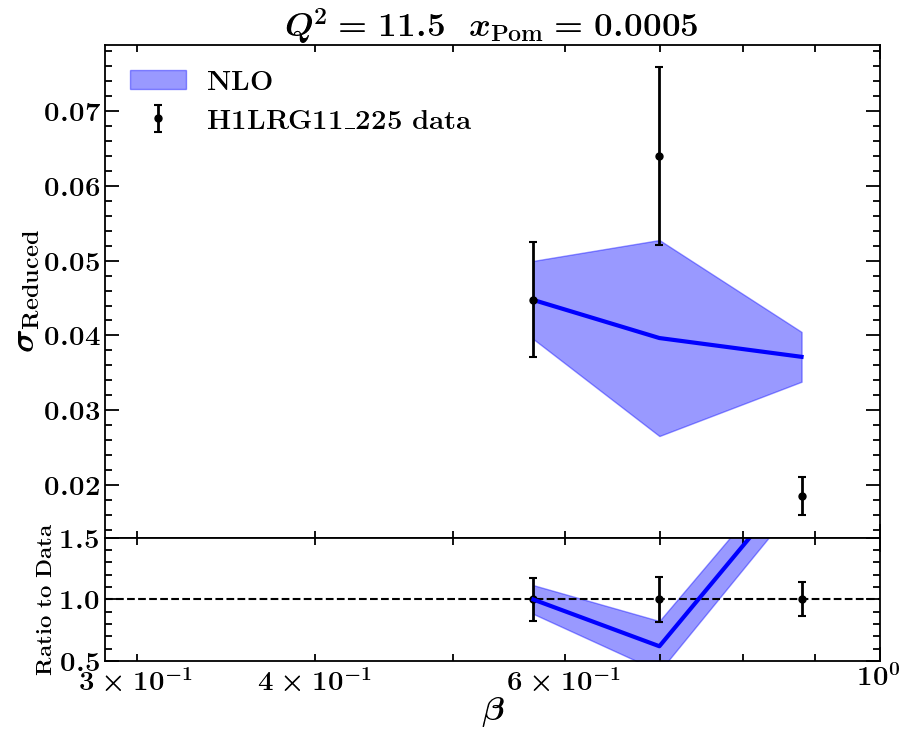

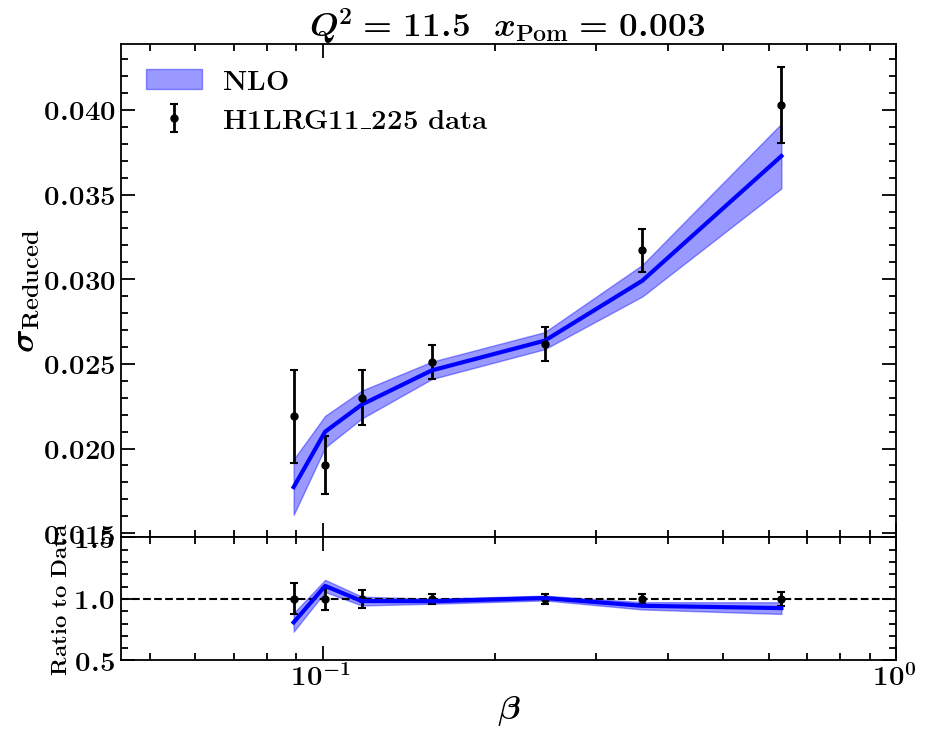

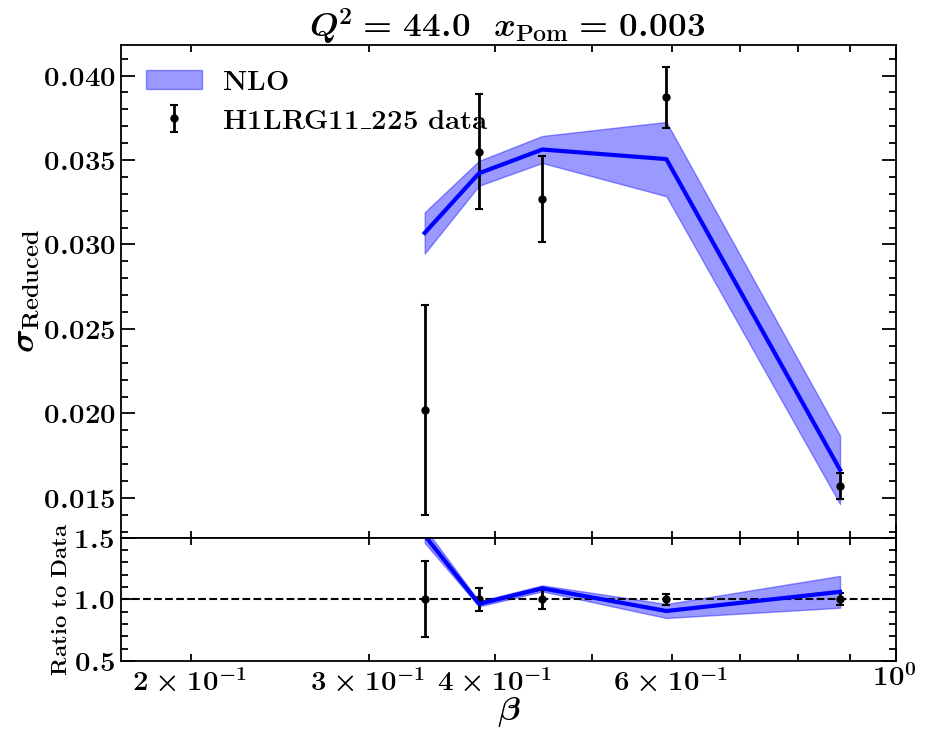

H1LRG11_252


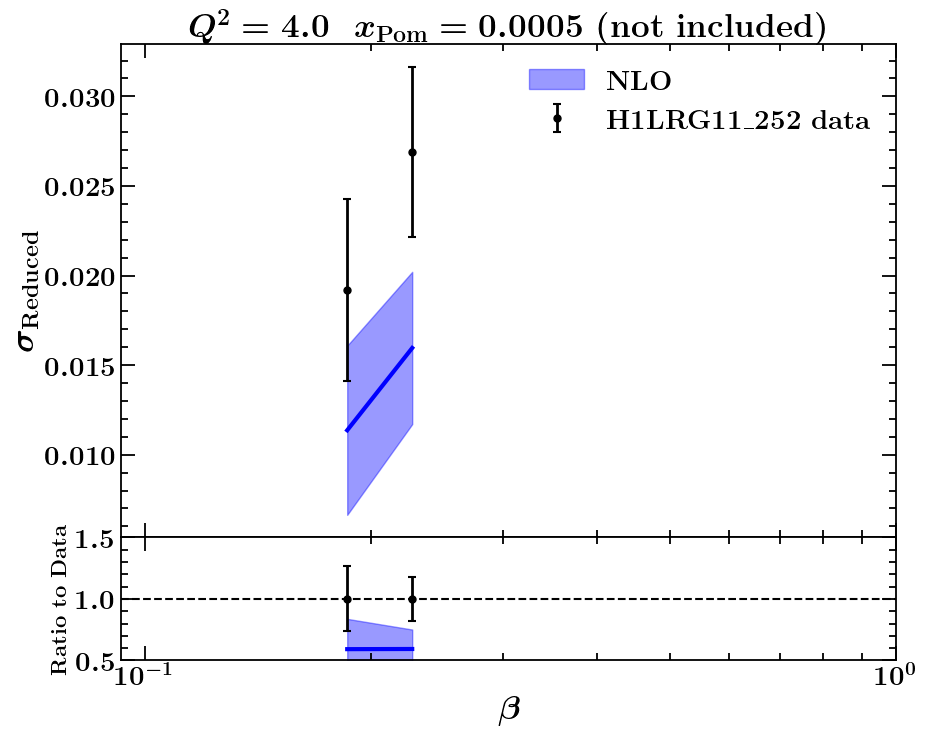

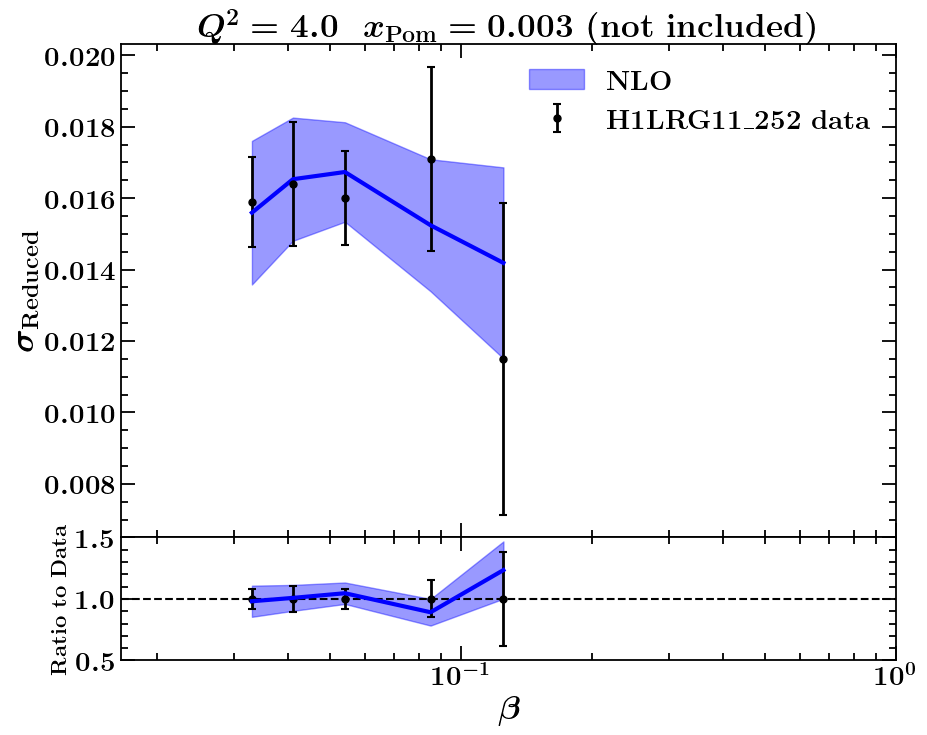

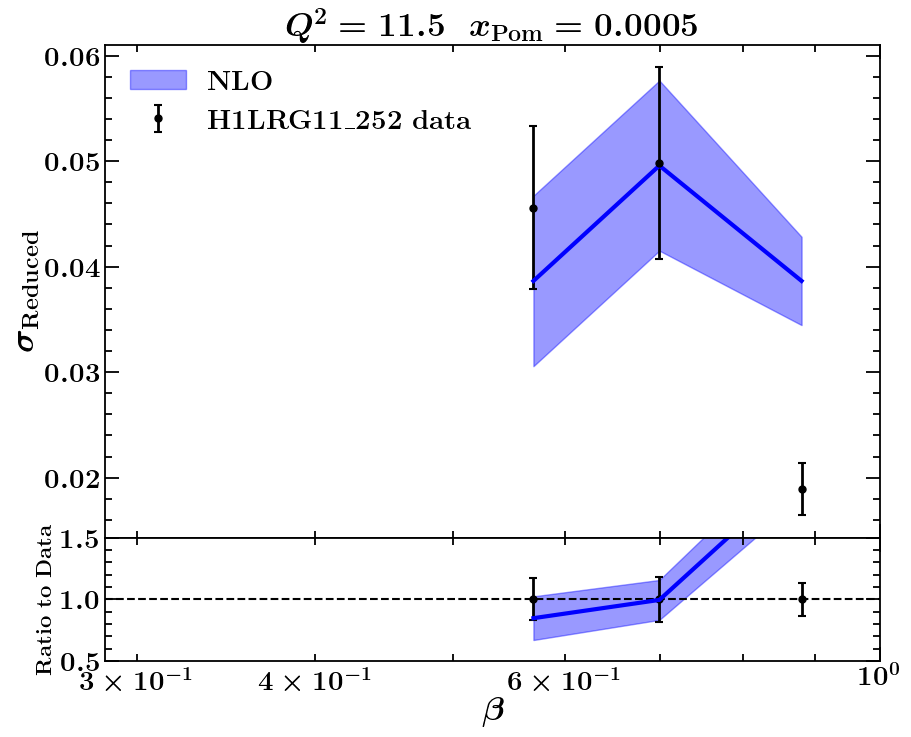

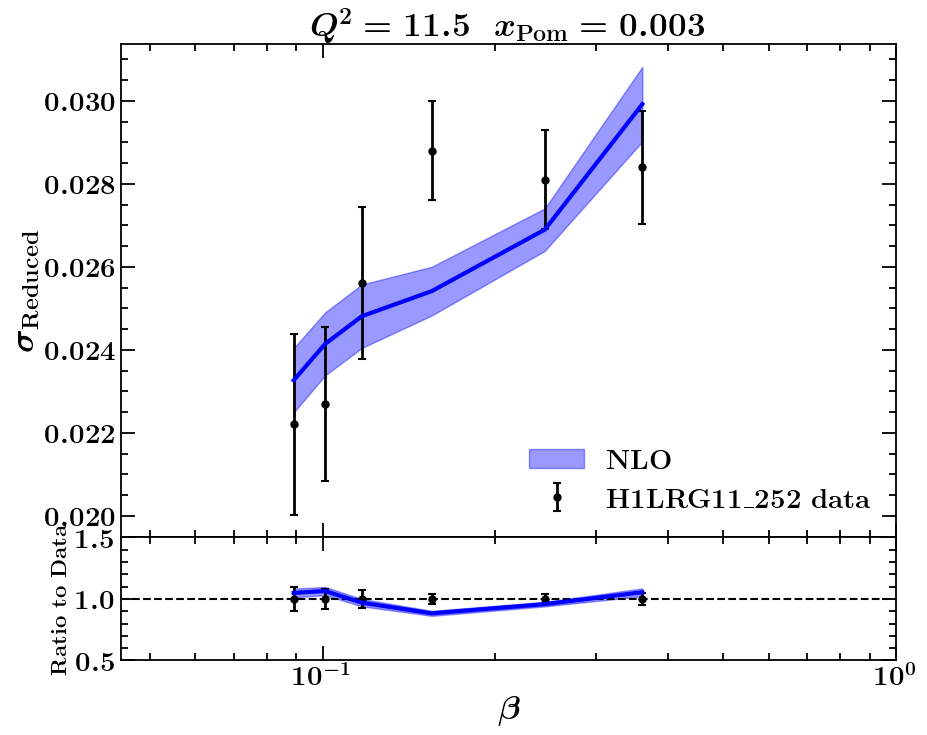

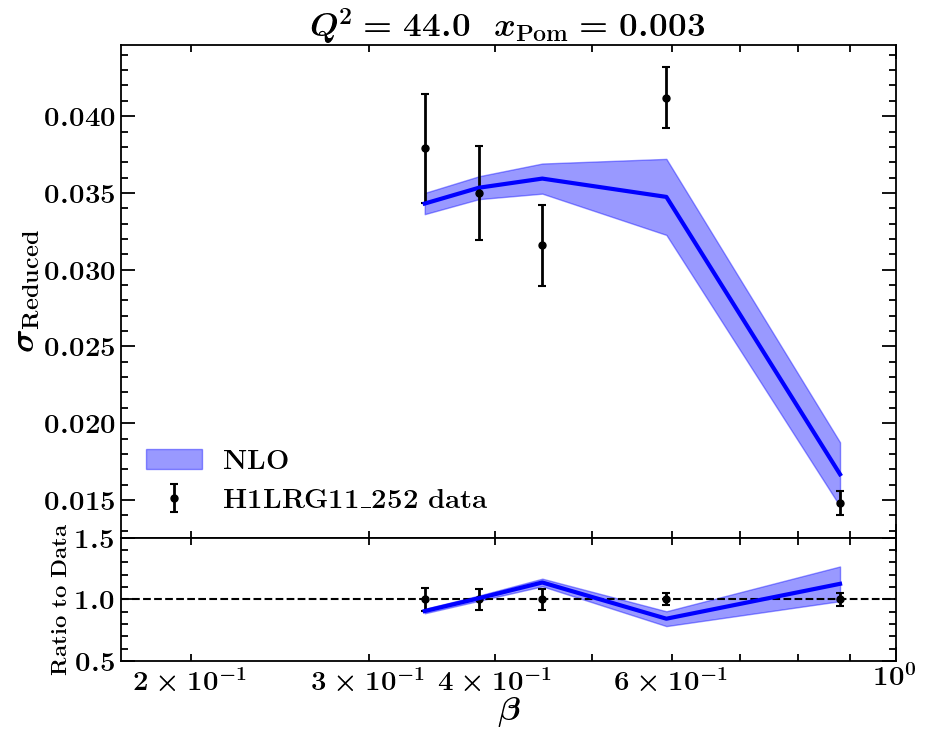

H1LRG11_319


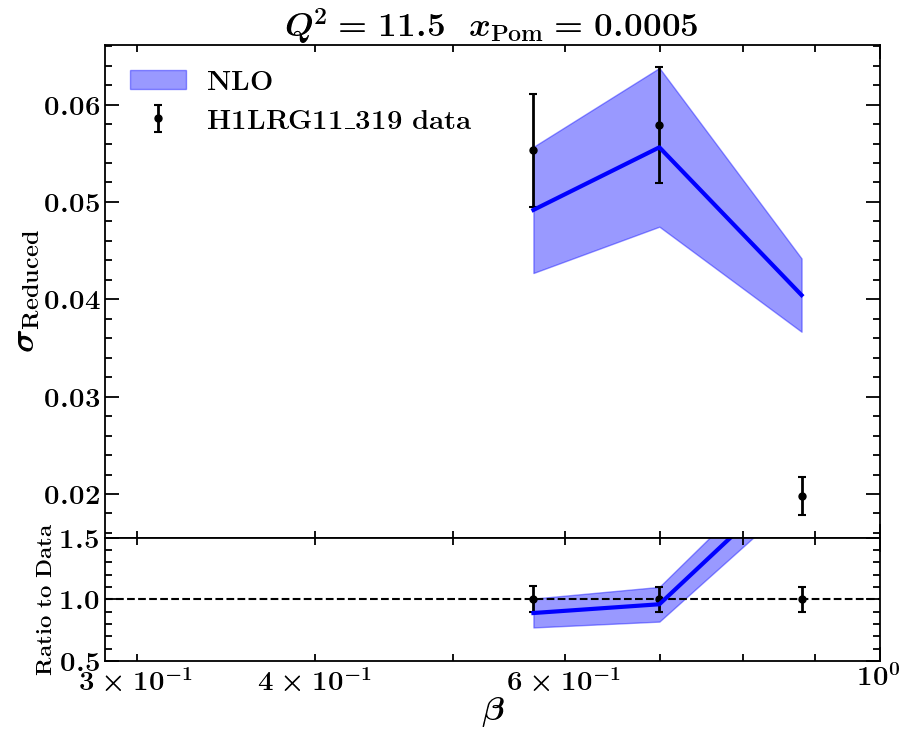

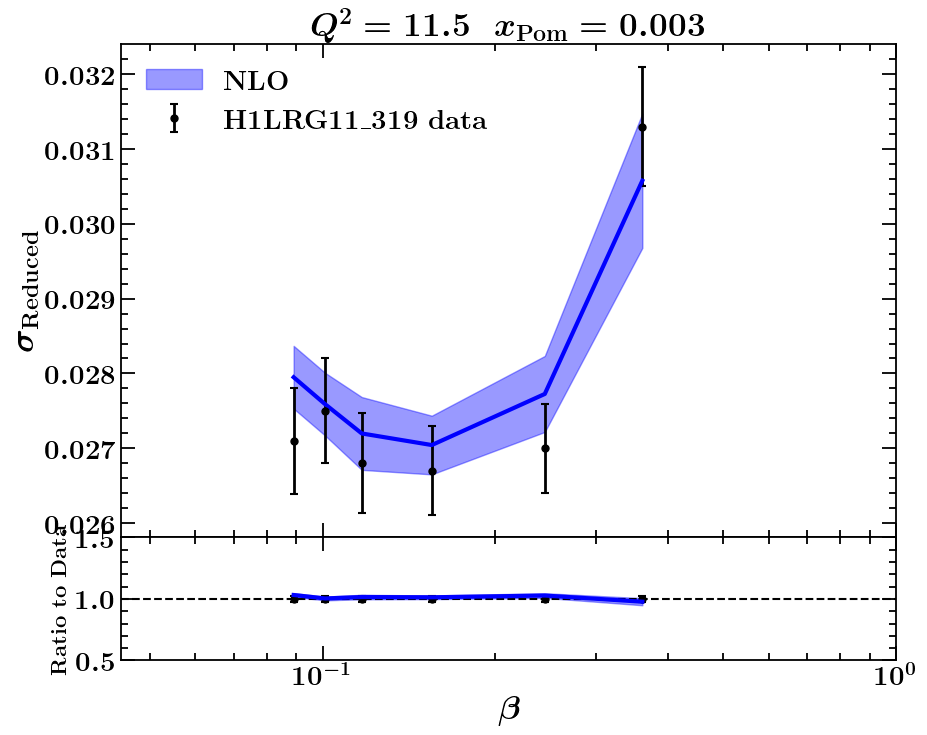

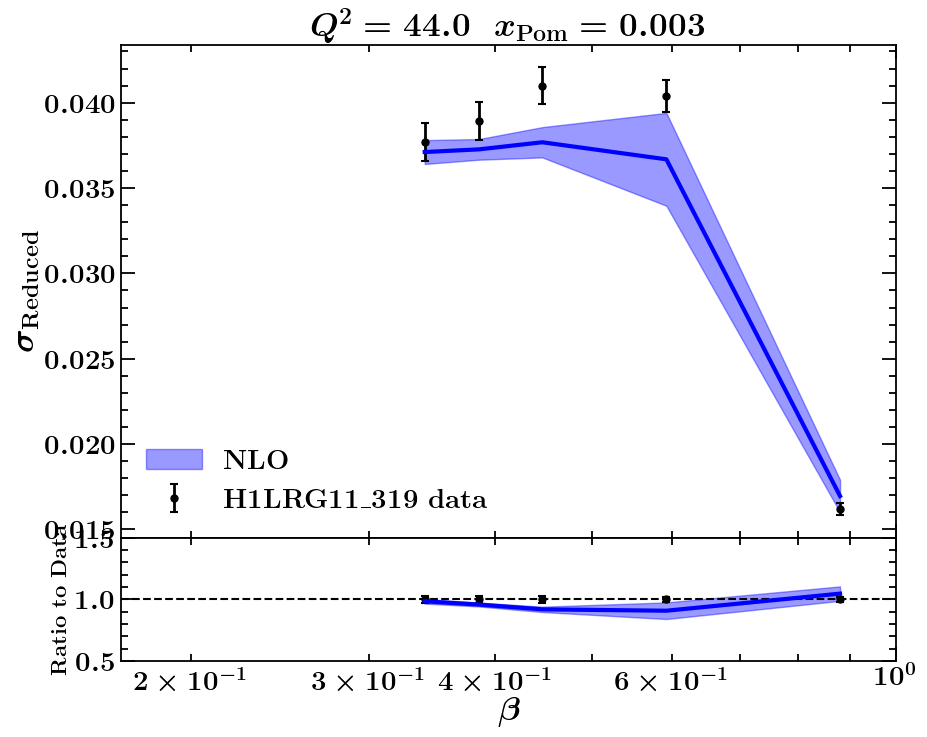

H1ZEUS-combined


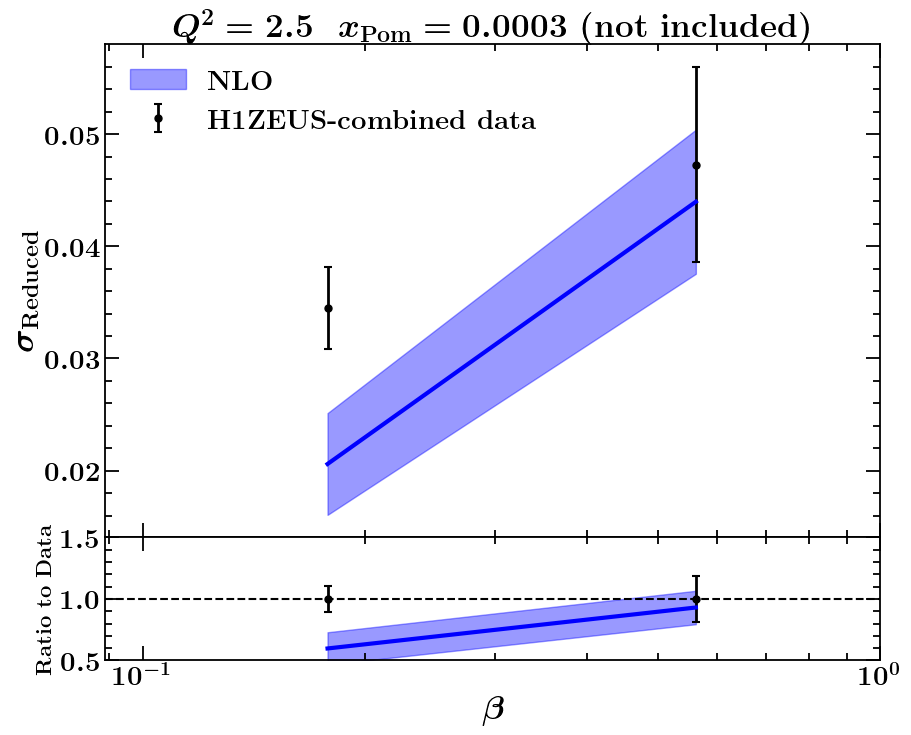

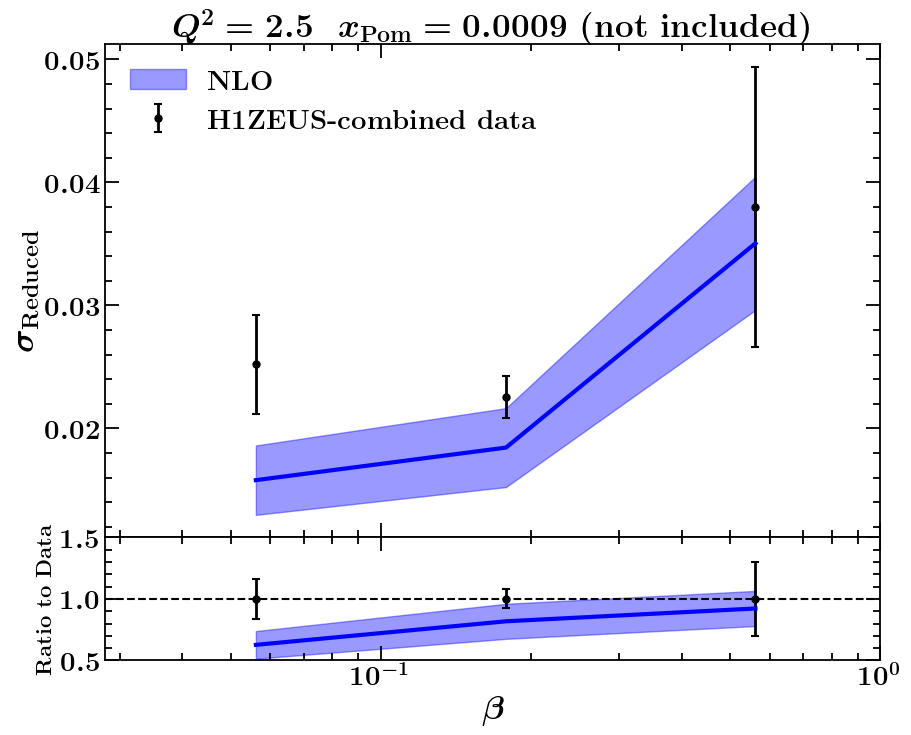

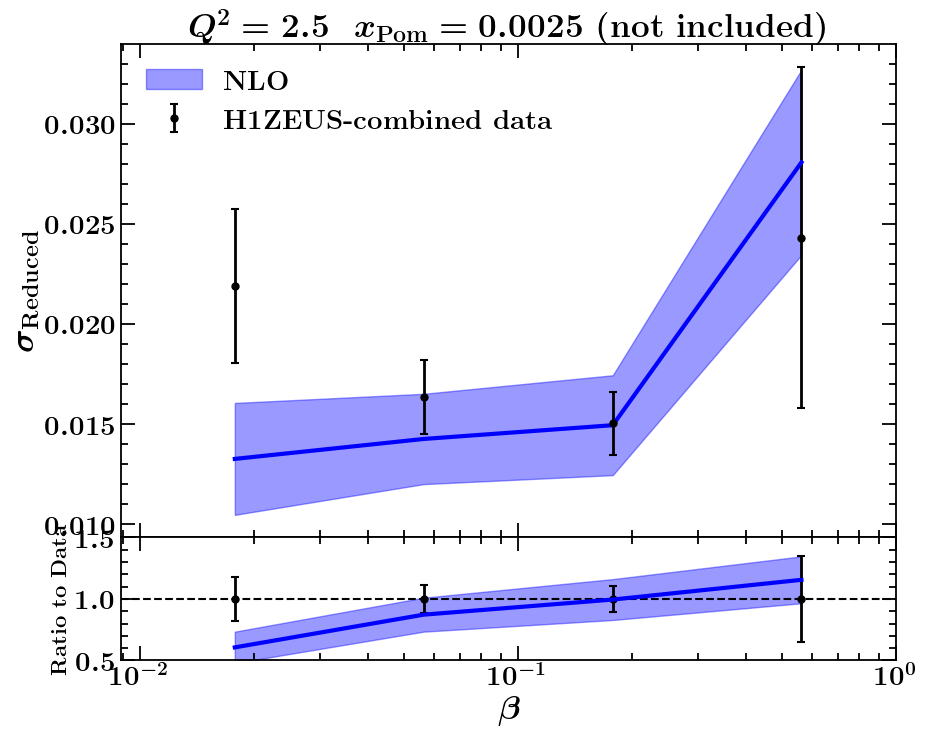

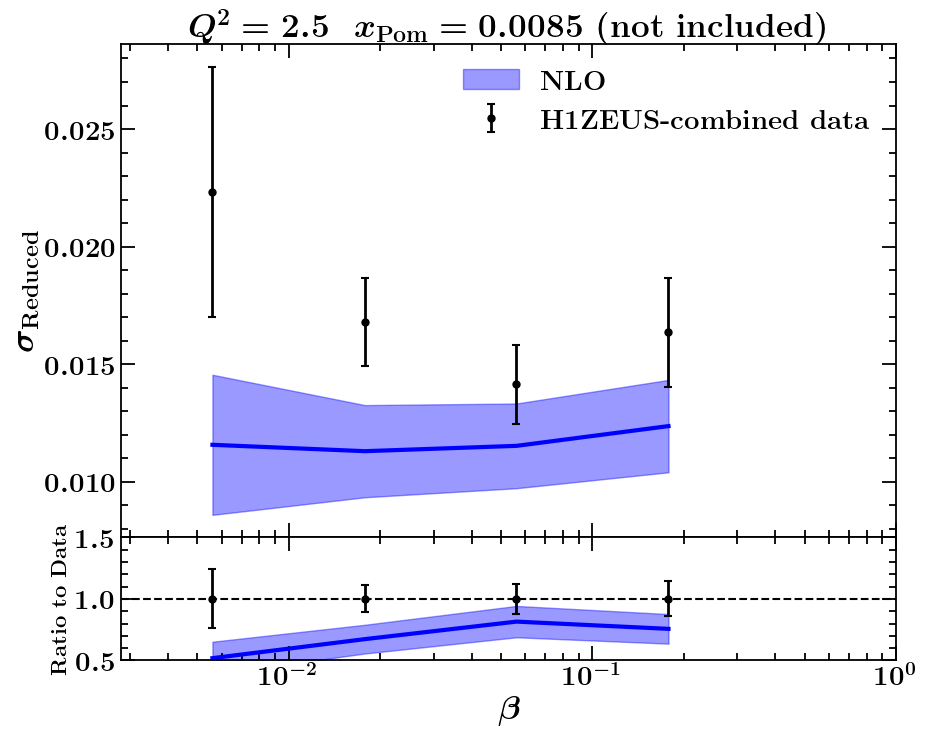

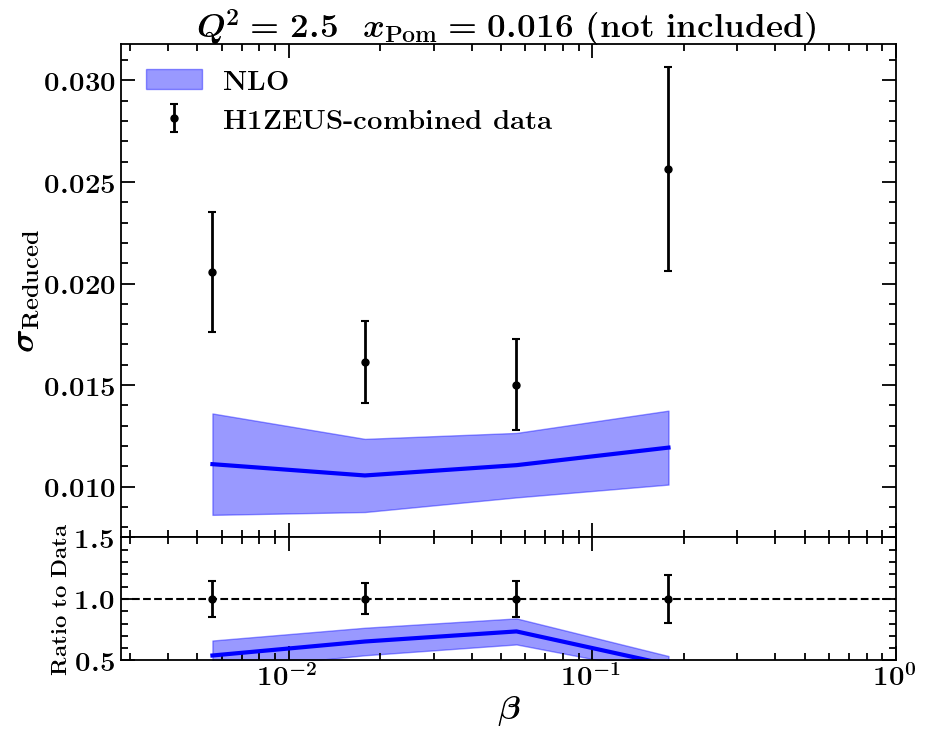

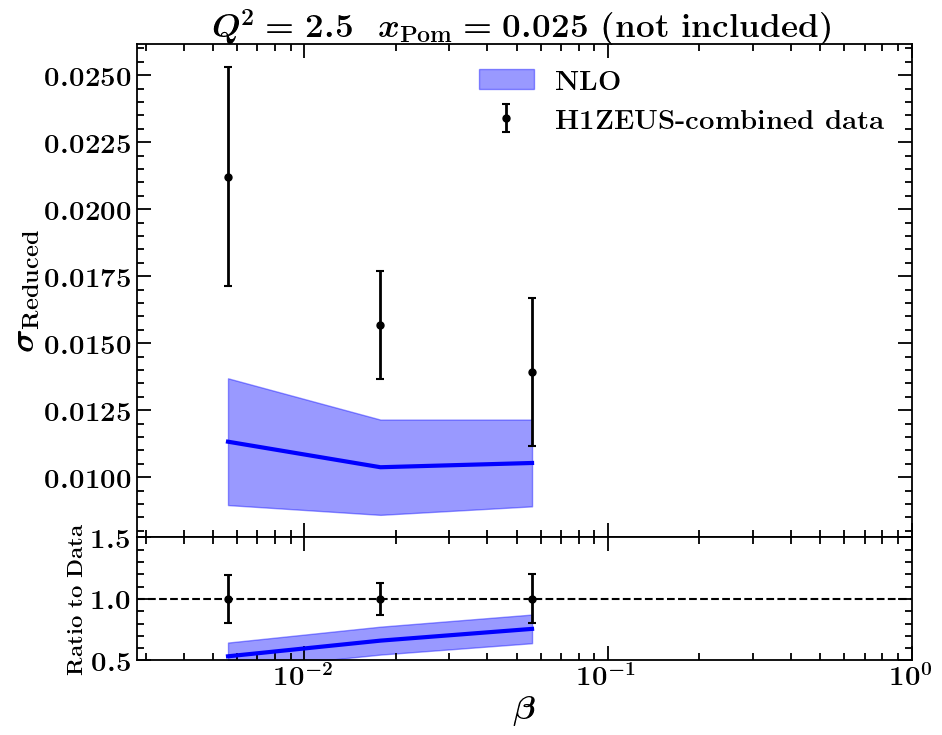

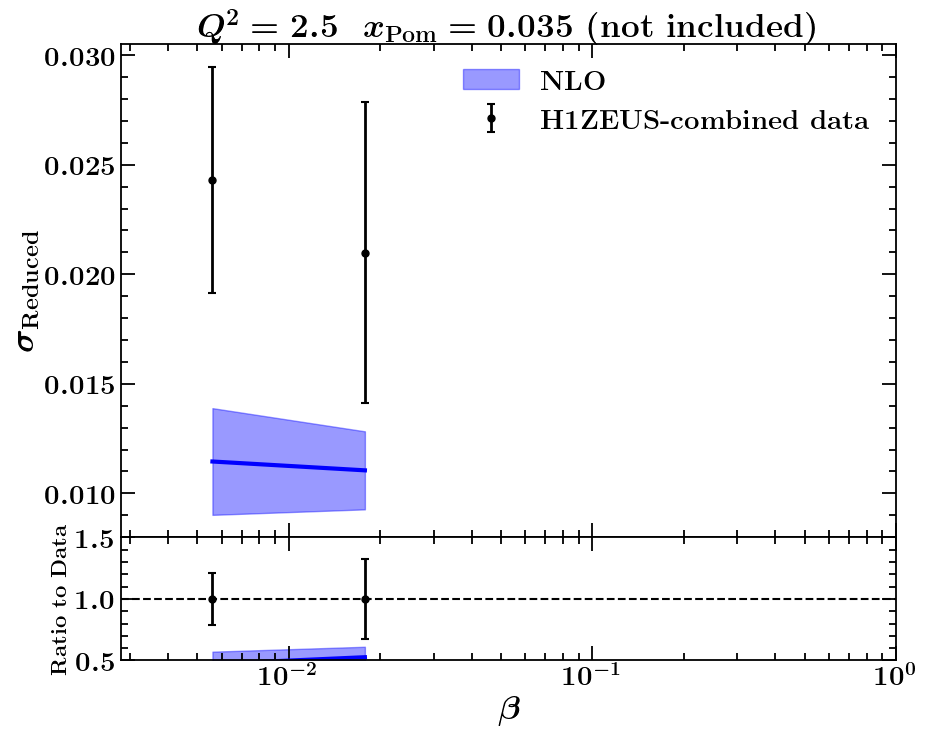

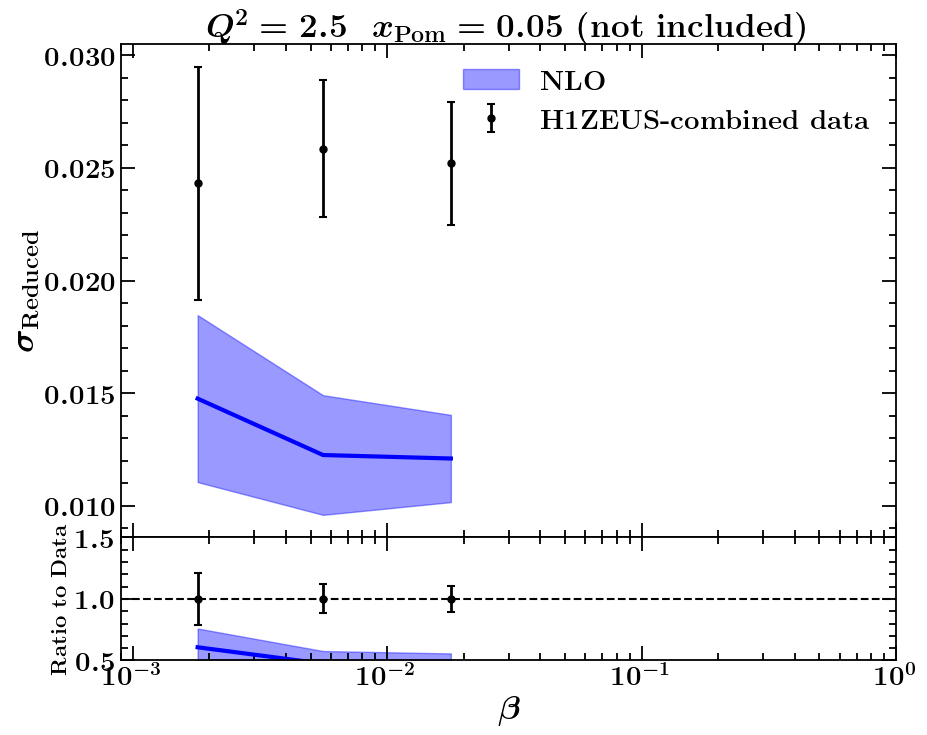

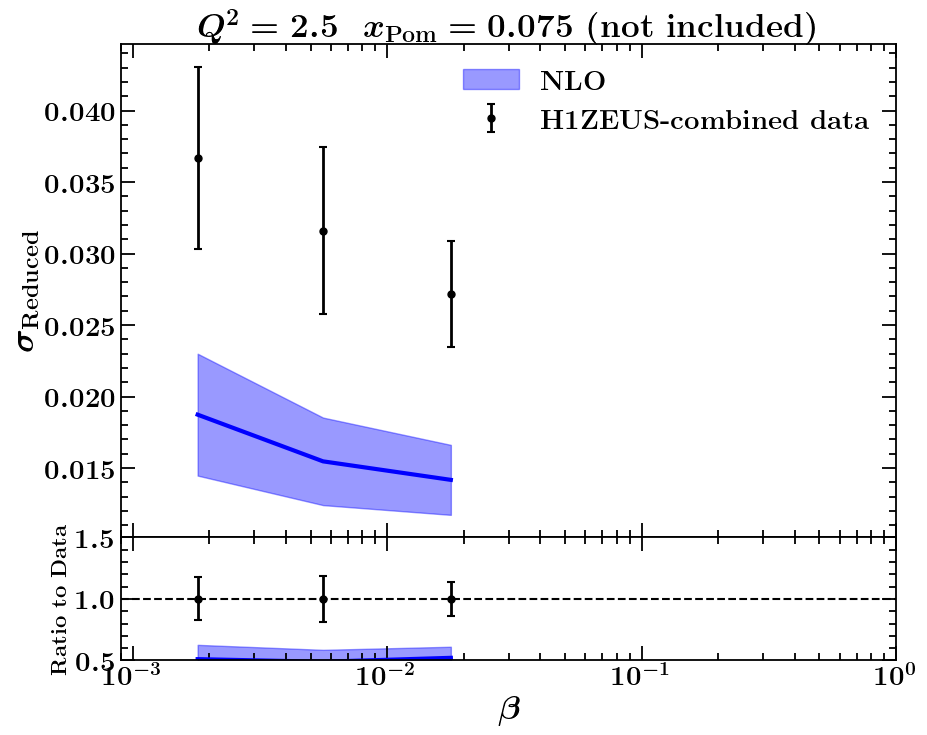

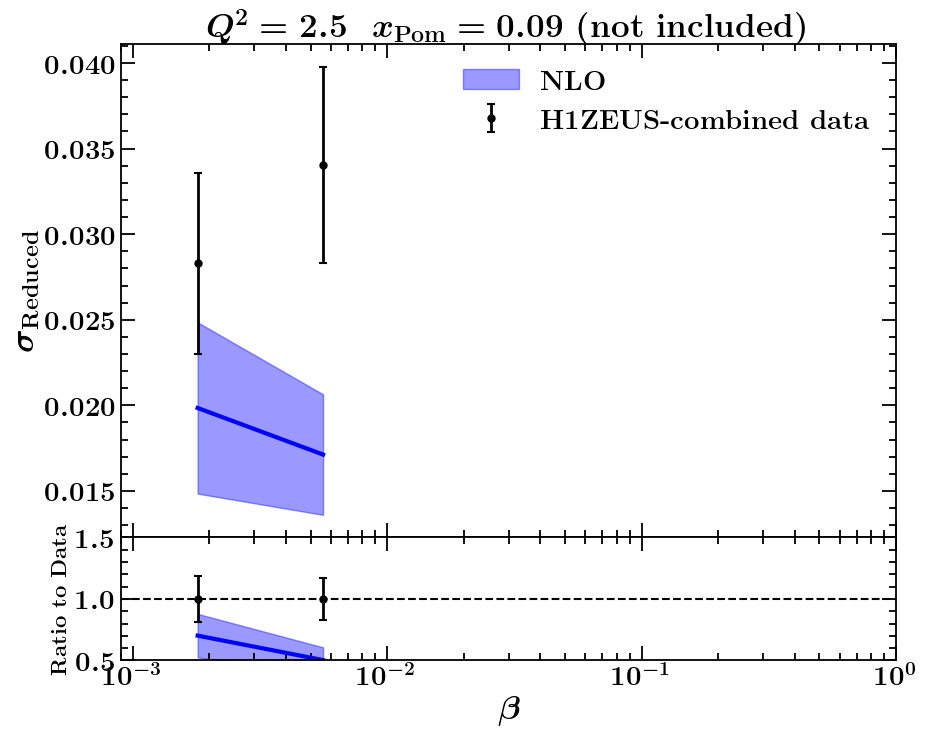

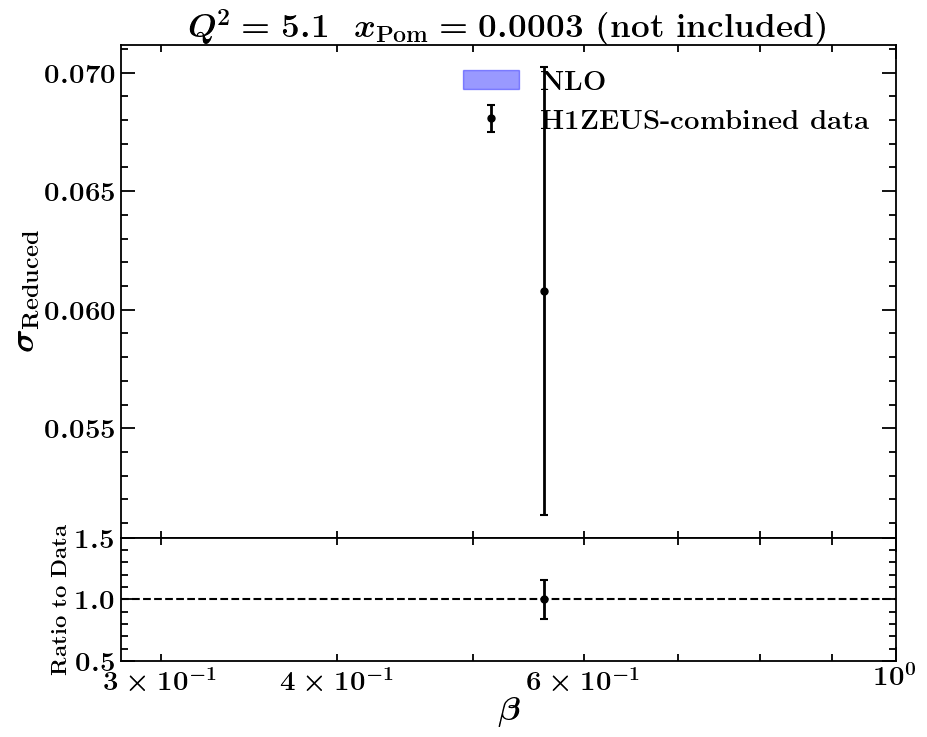

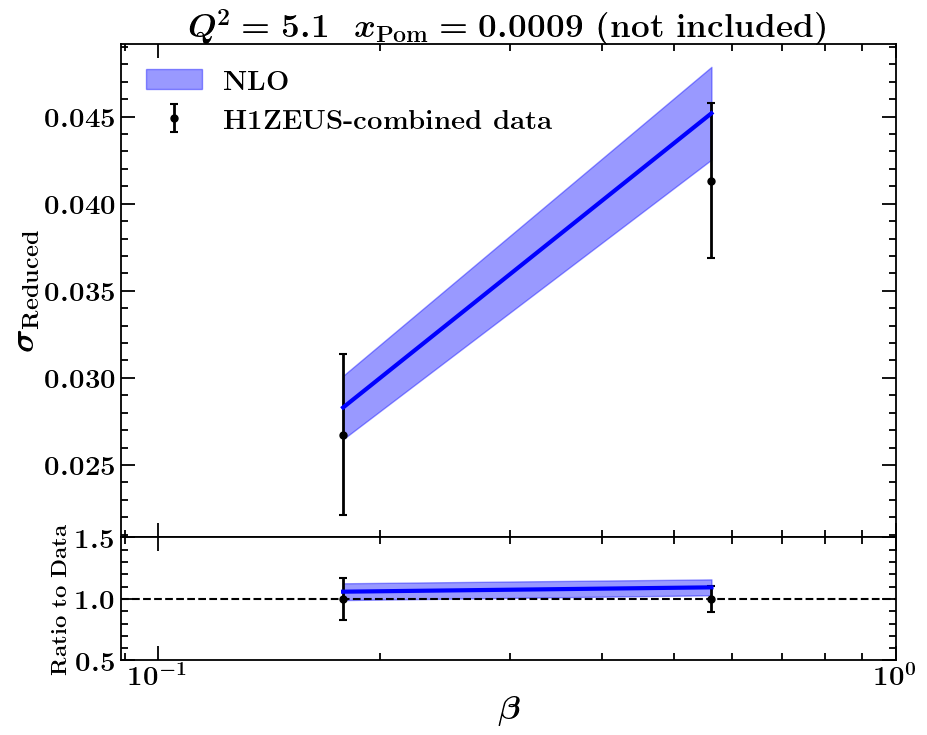

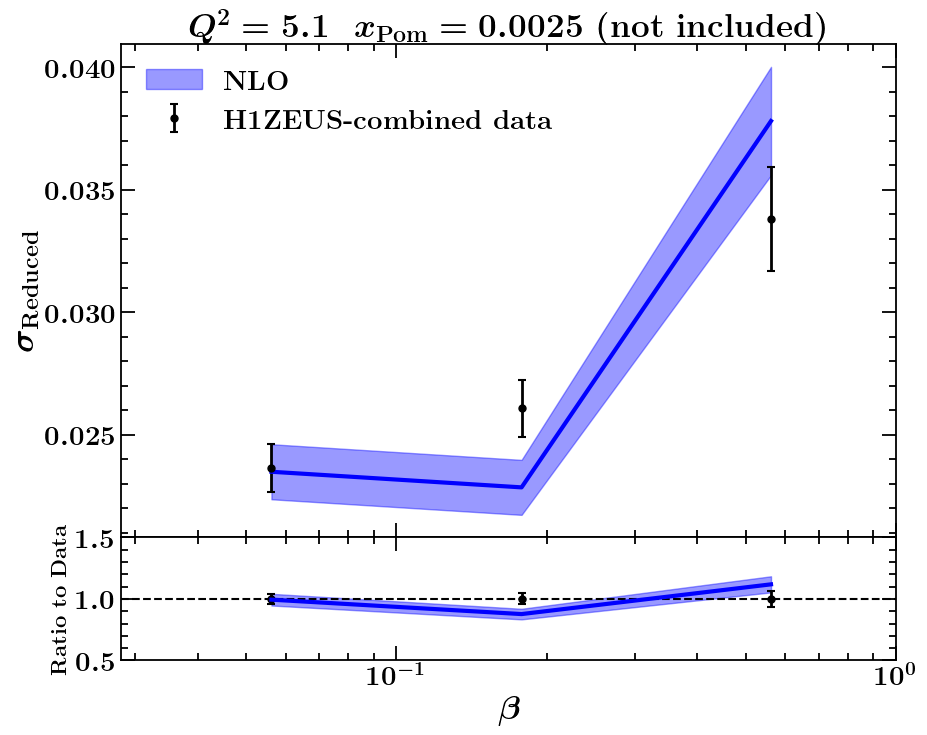

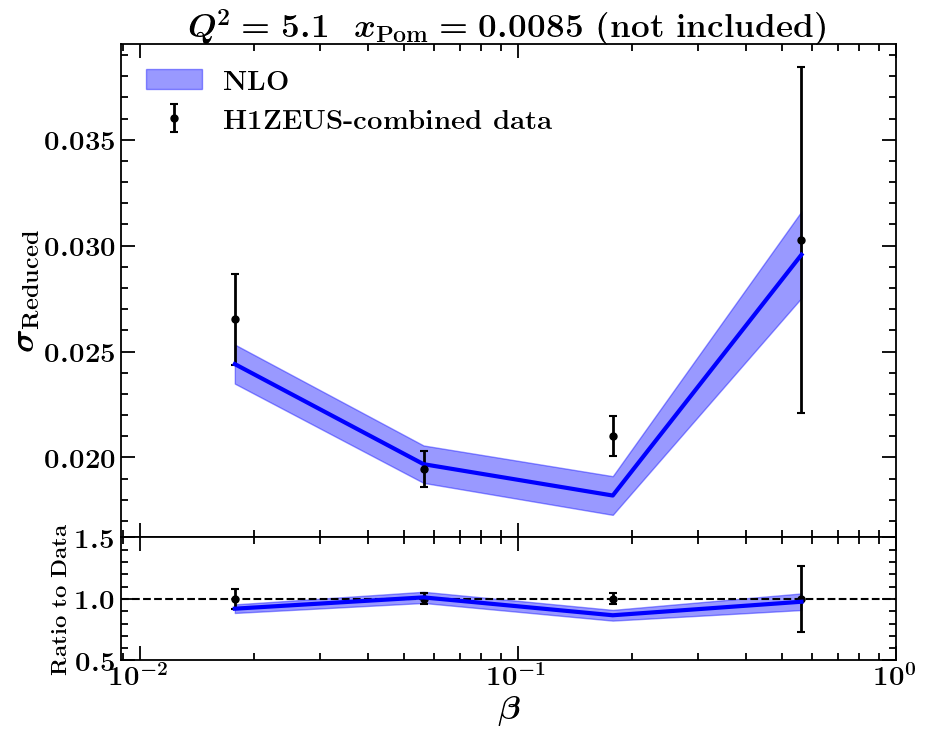

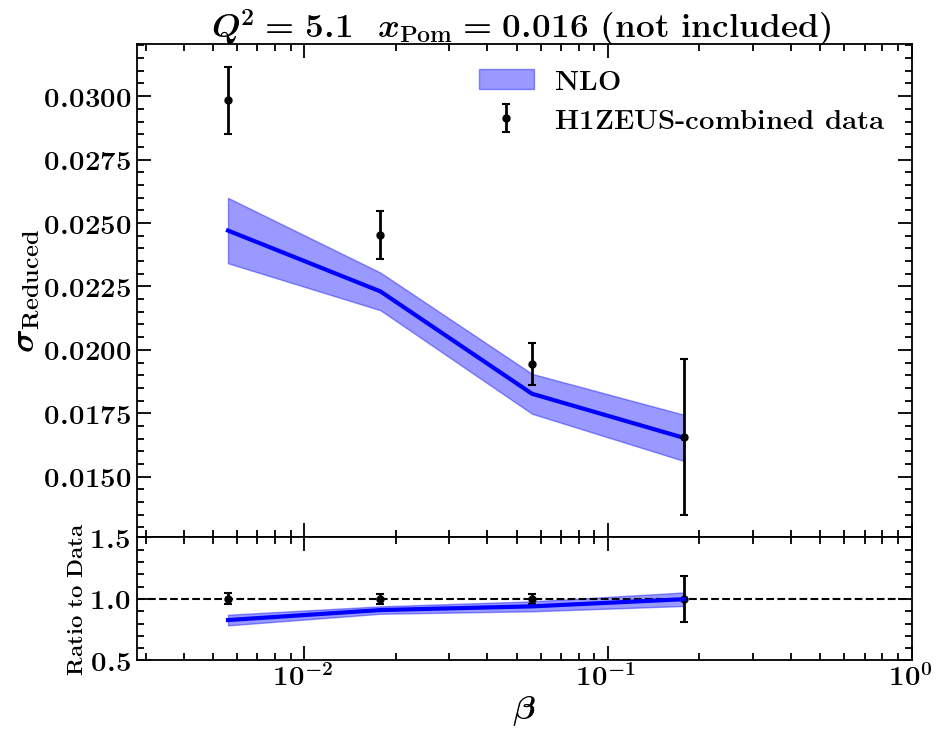

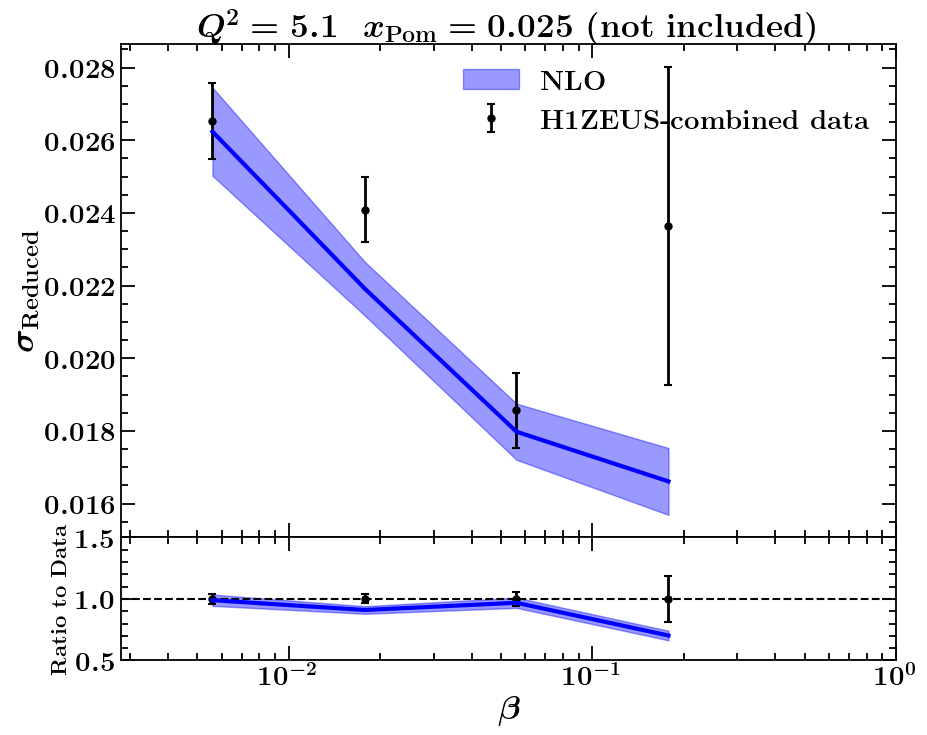

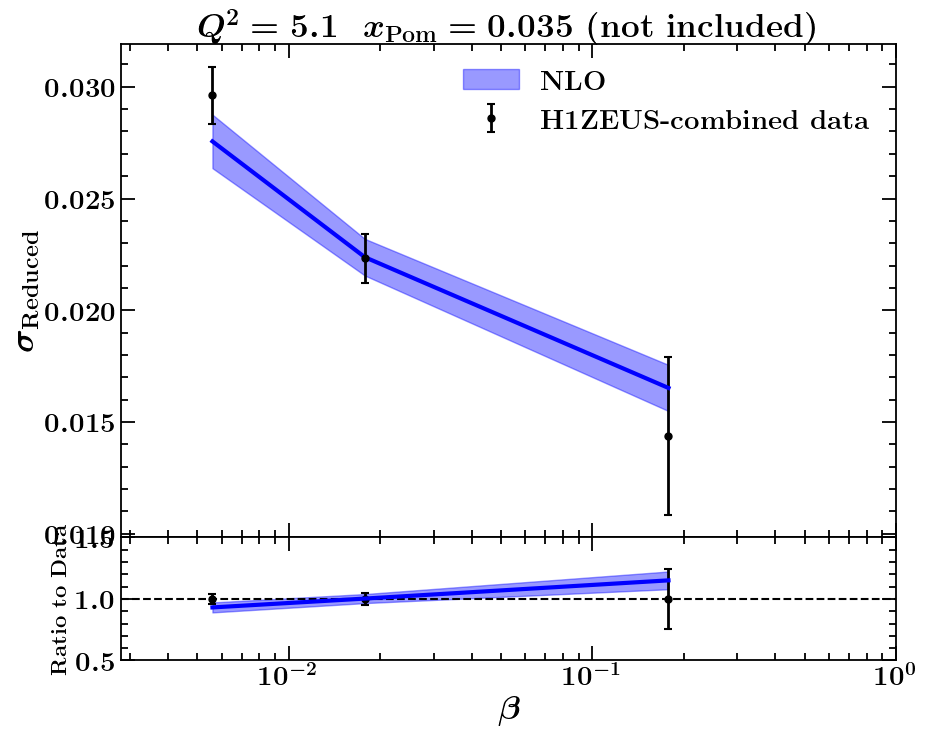

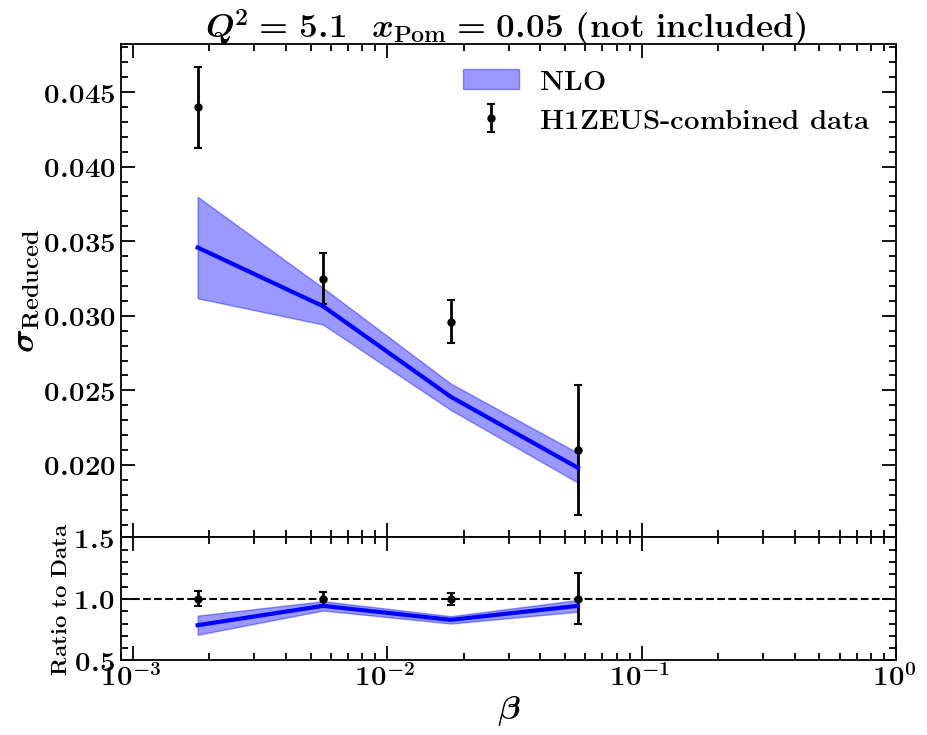

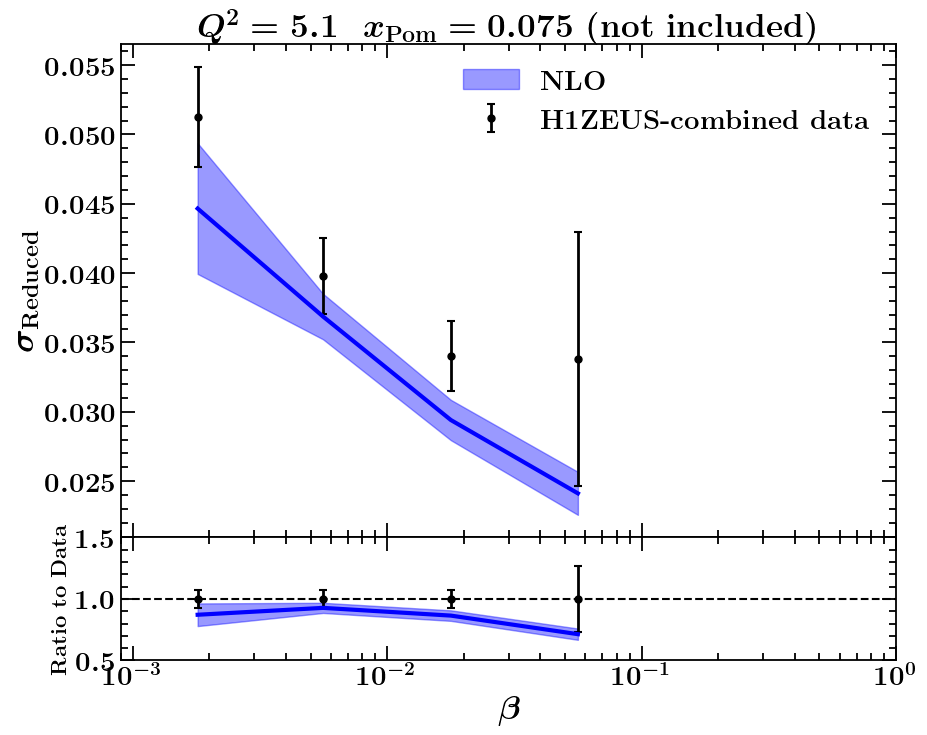

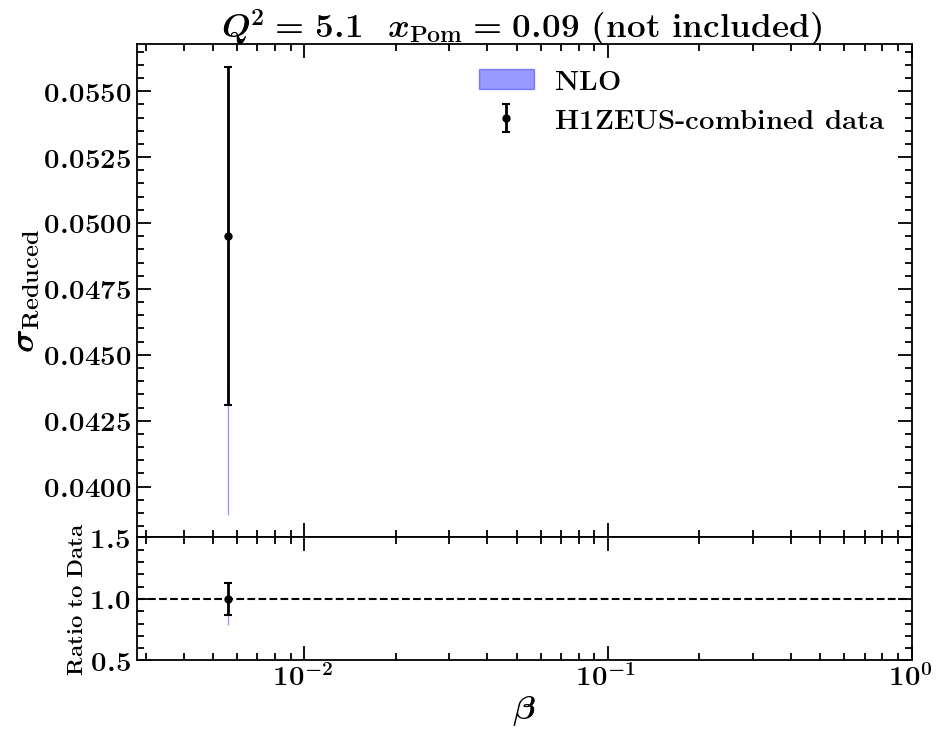

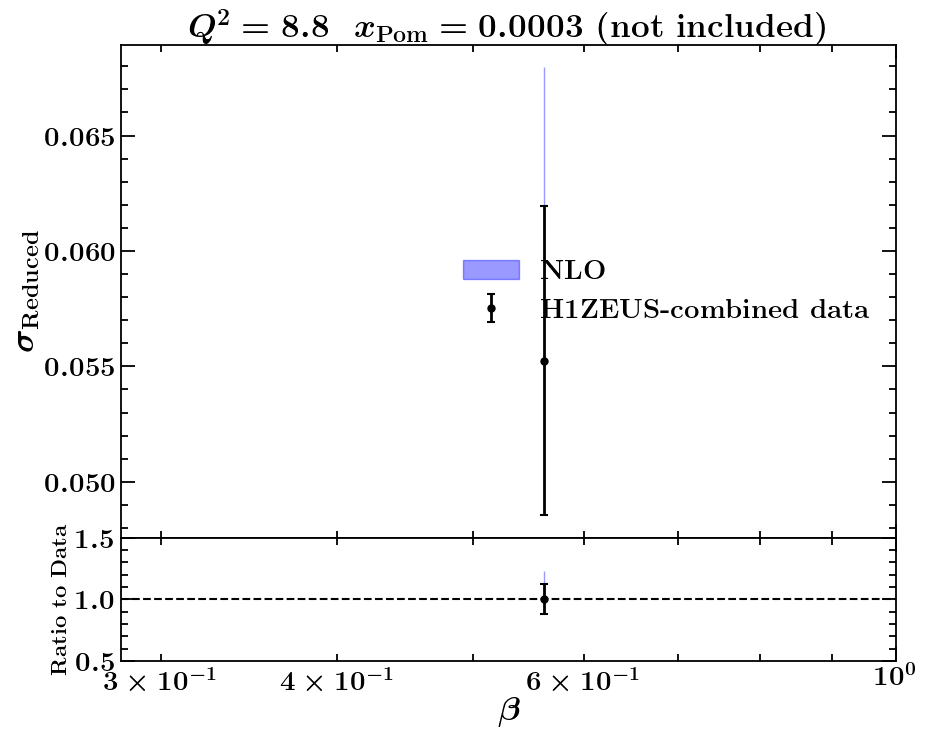

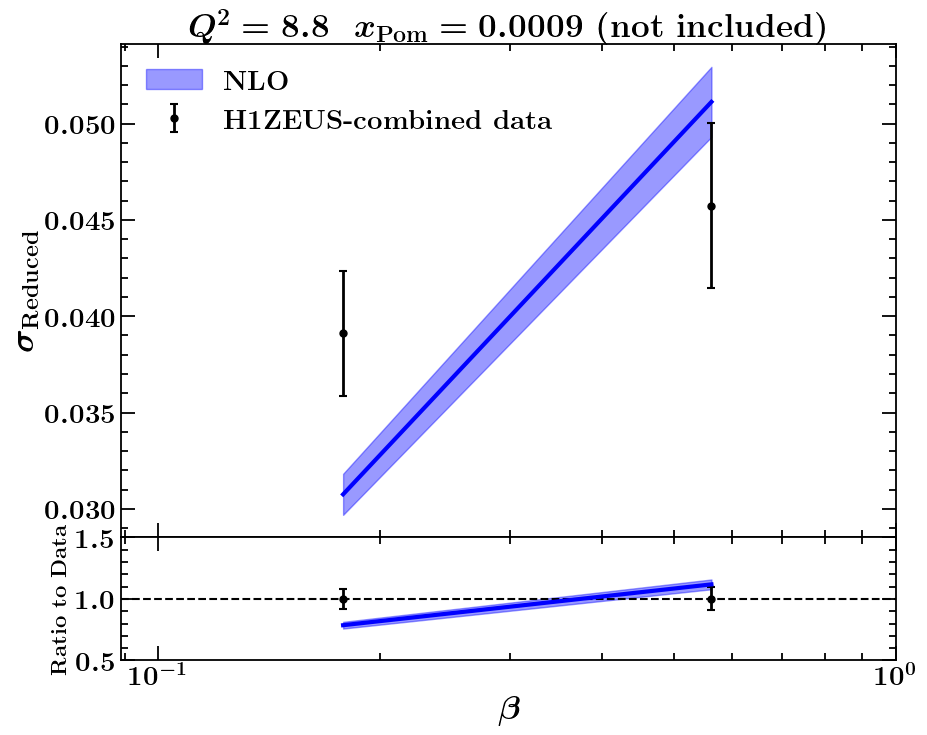

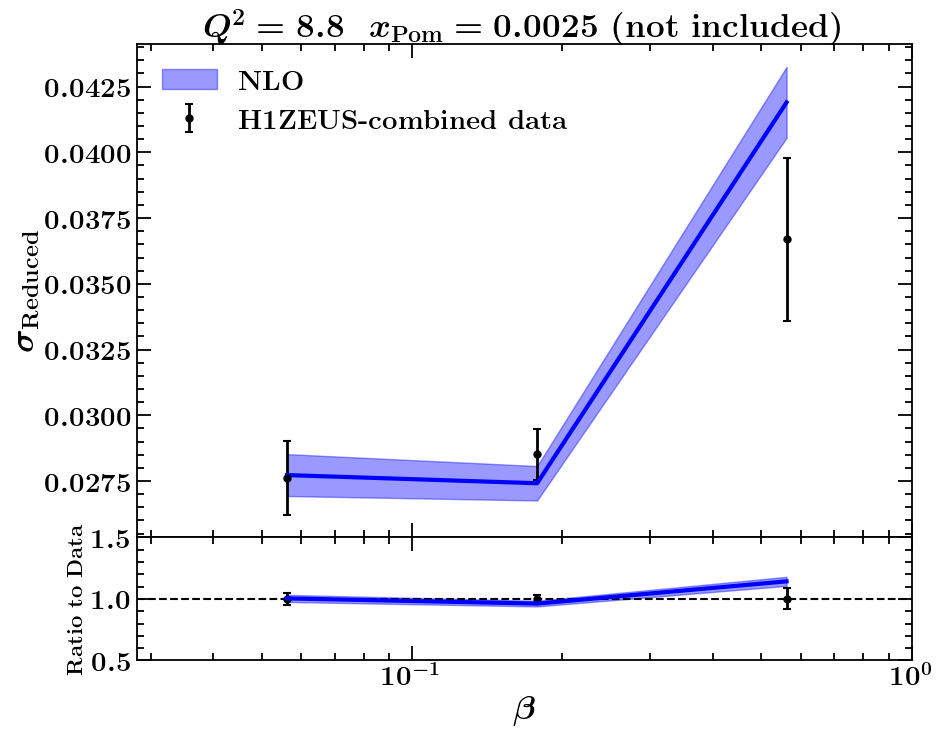

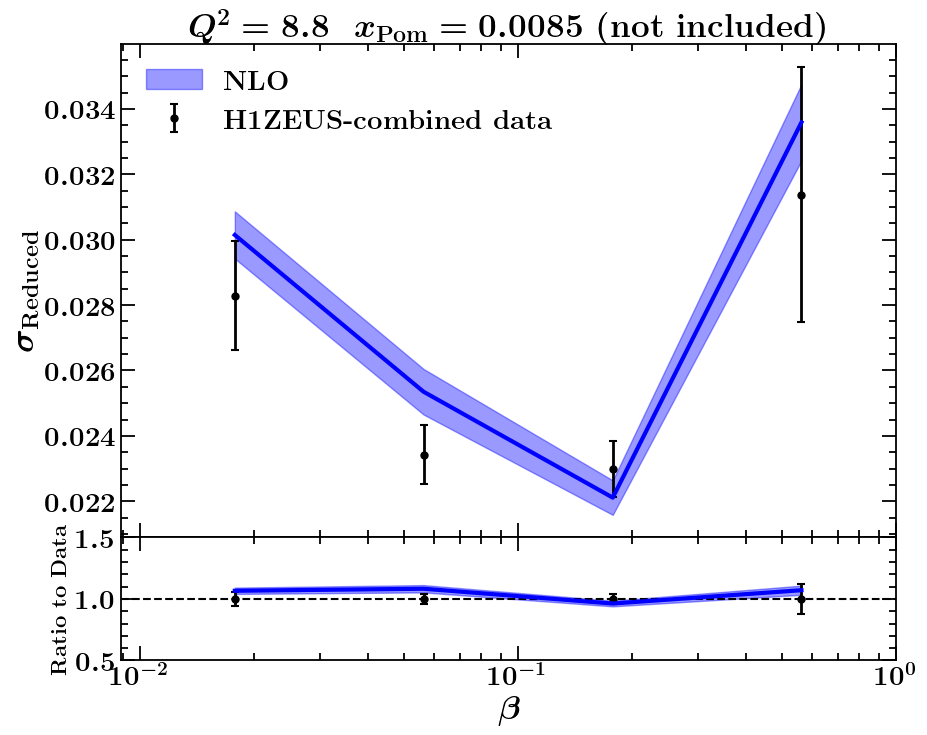

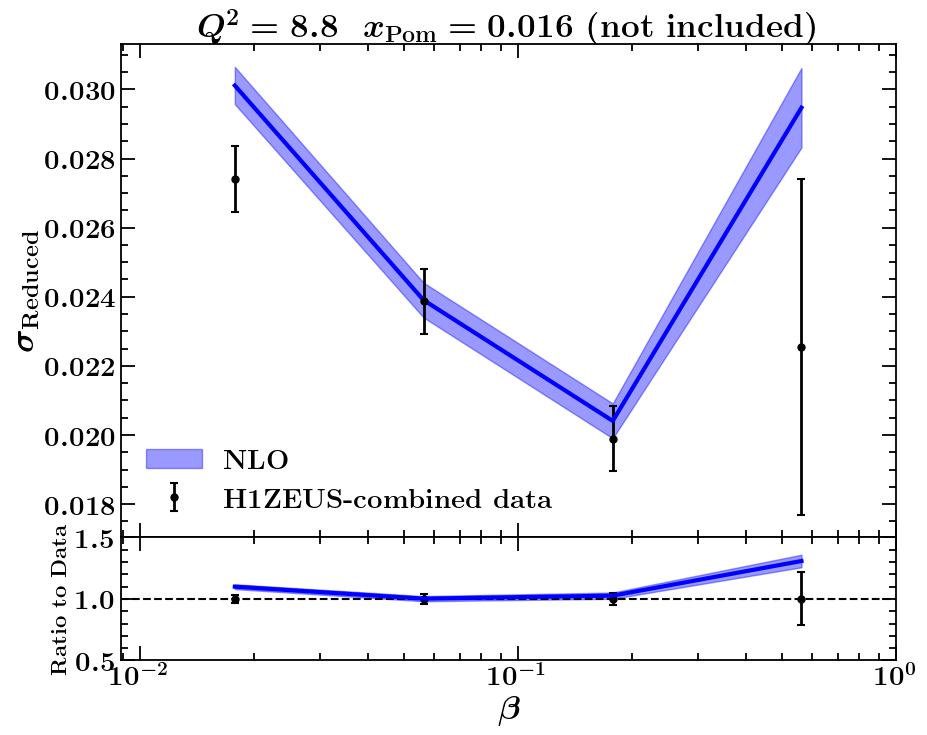

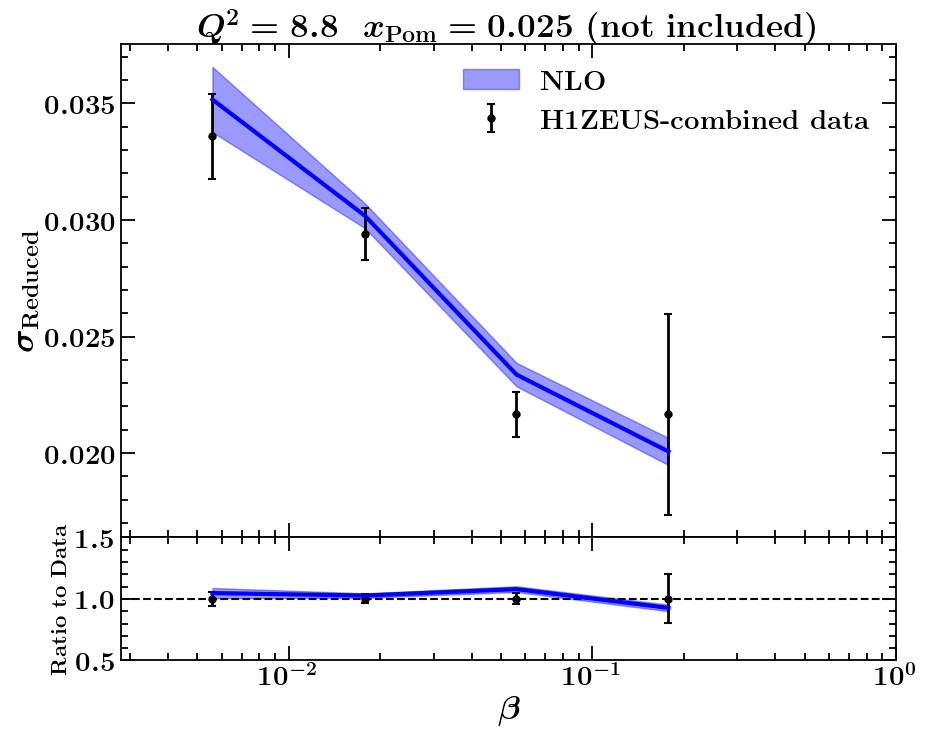

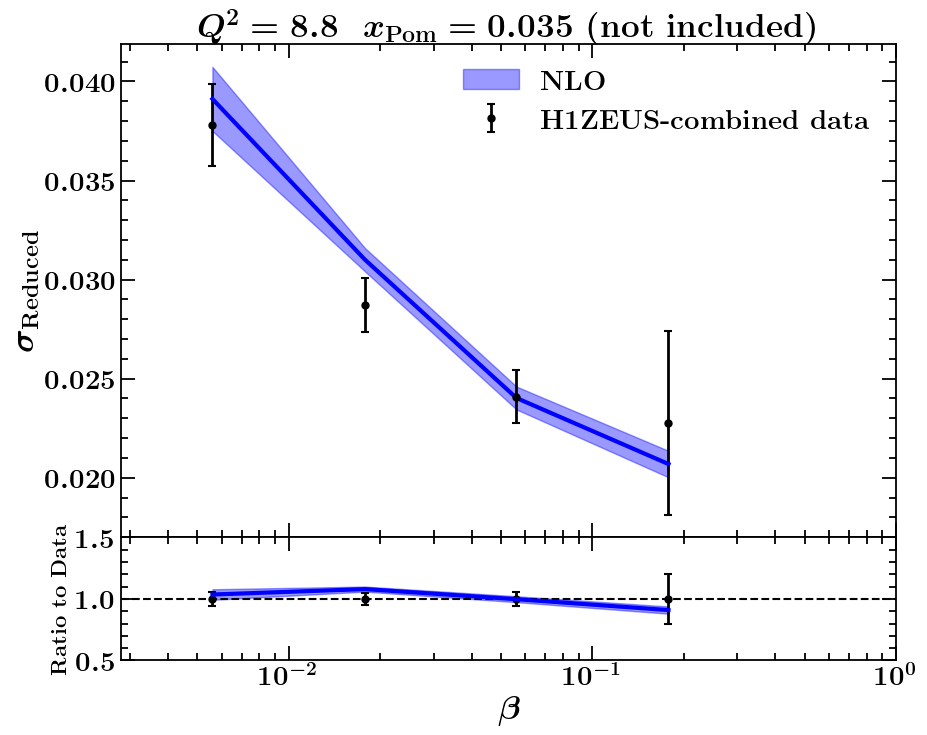

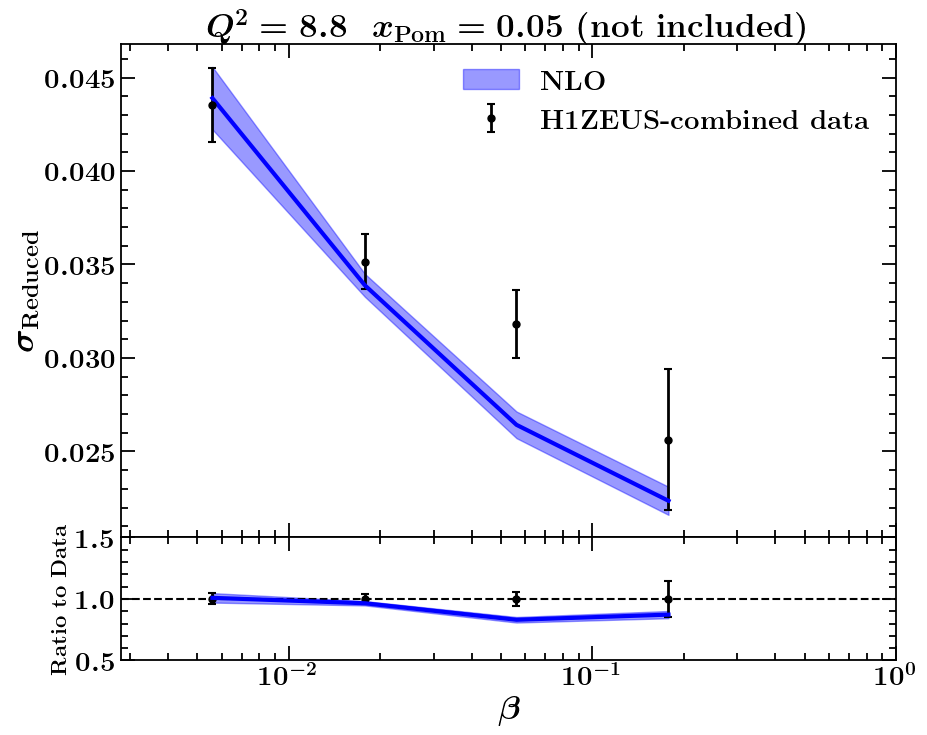

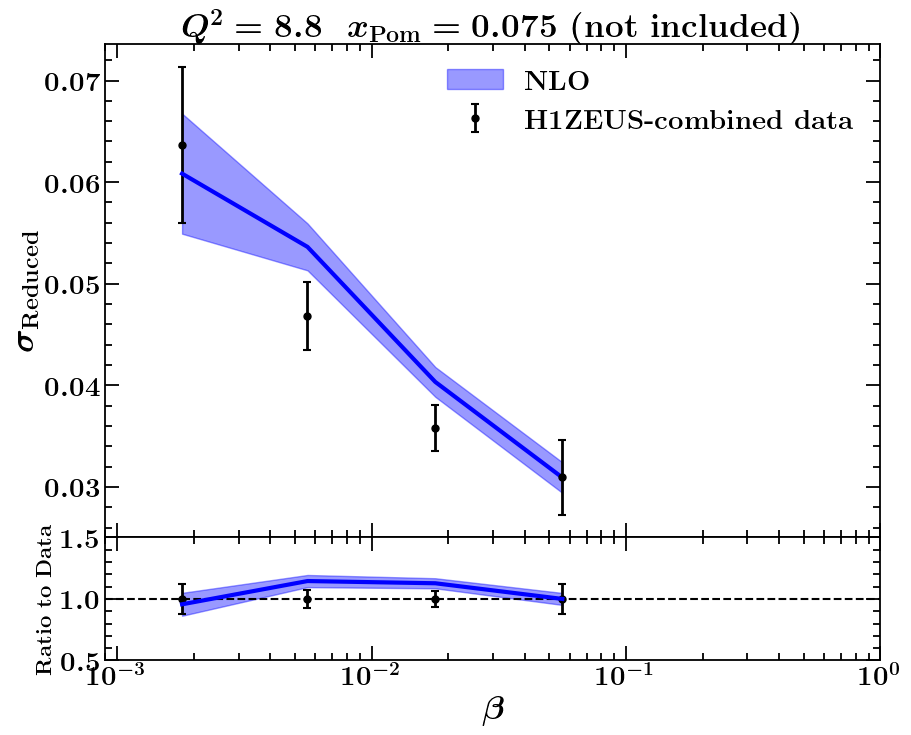

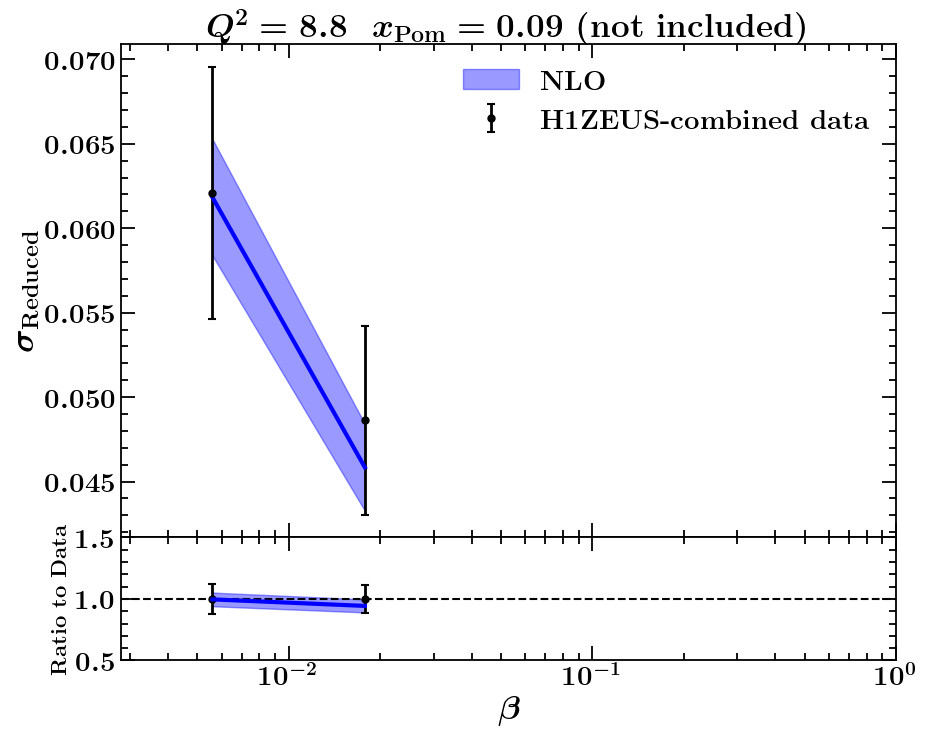

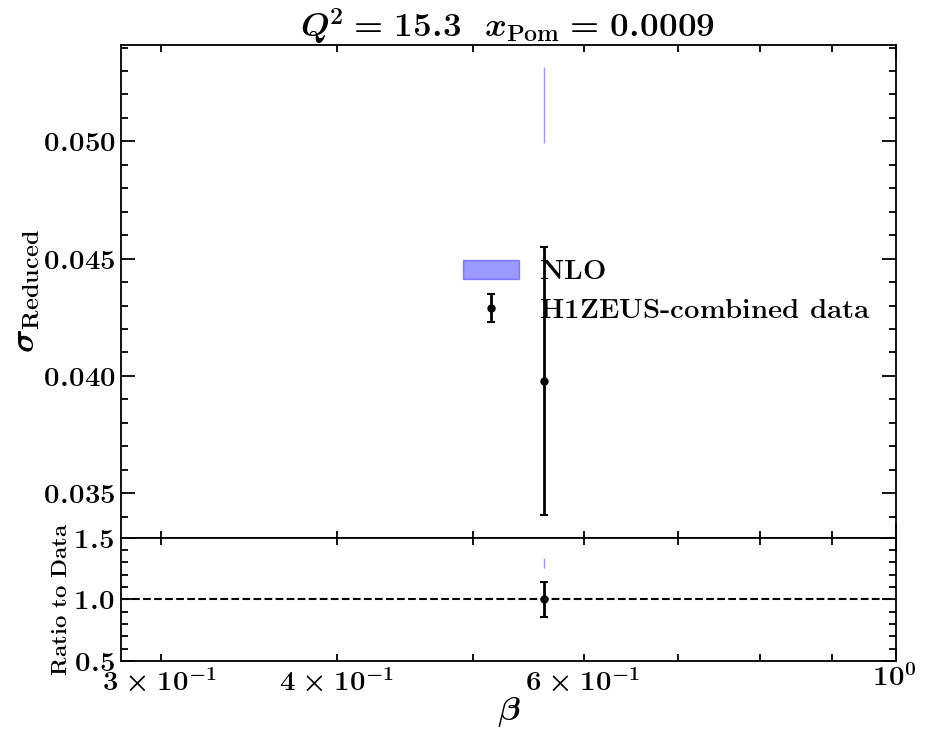

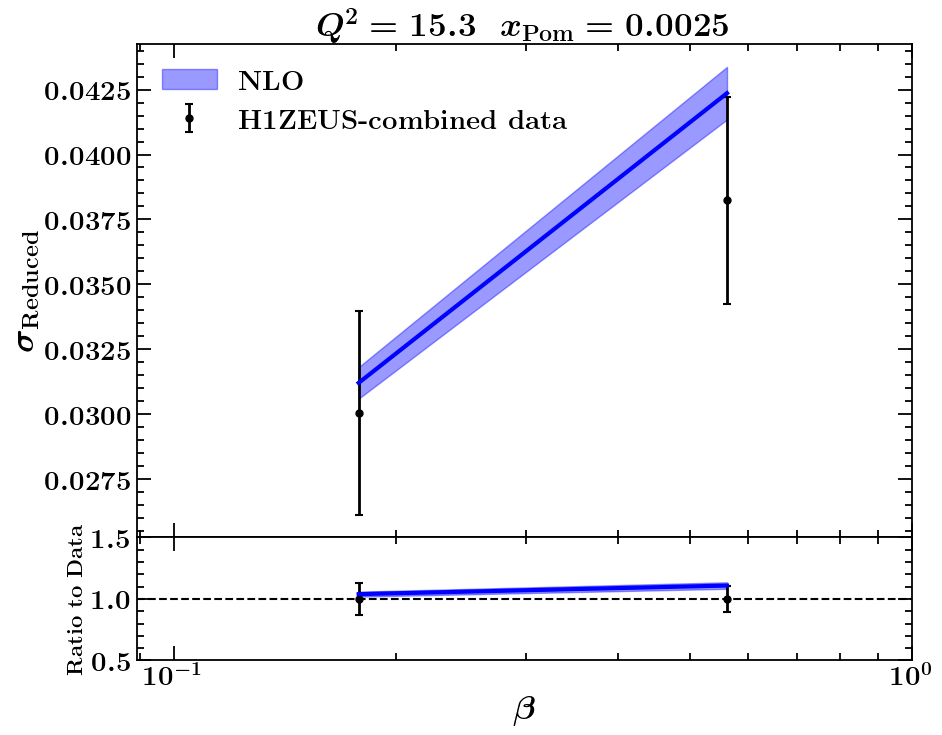

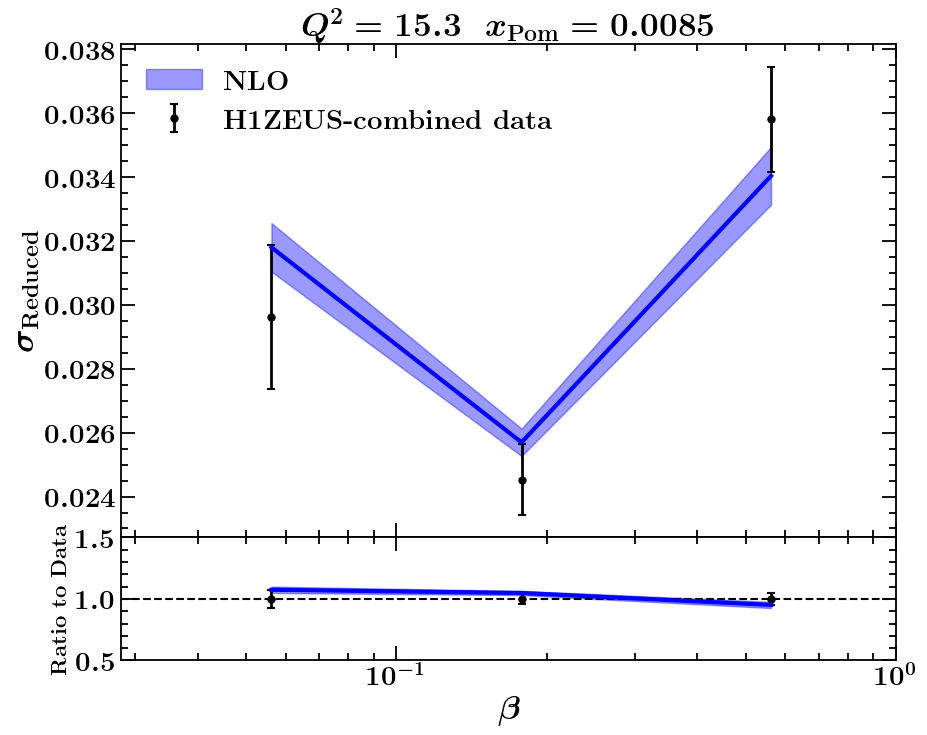

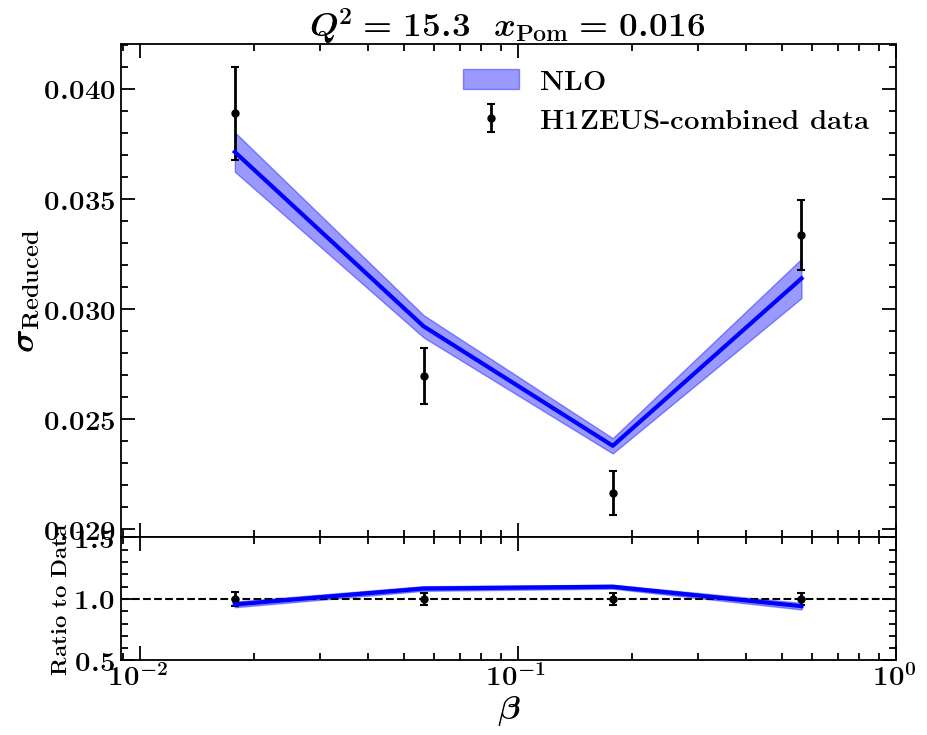

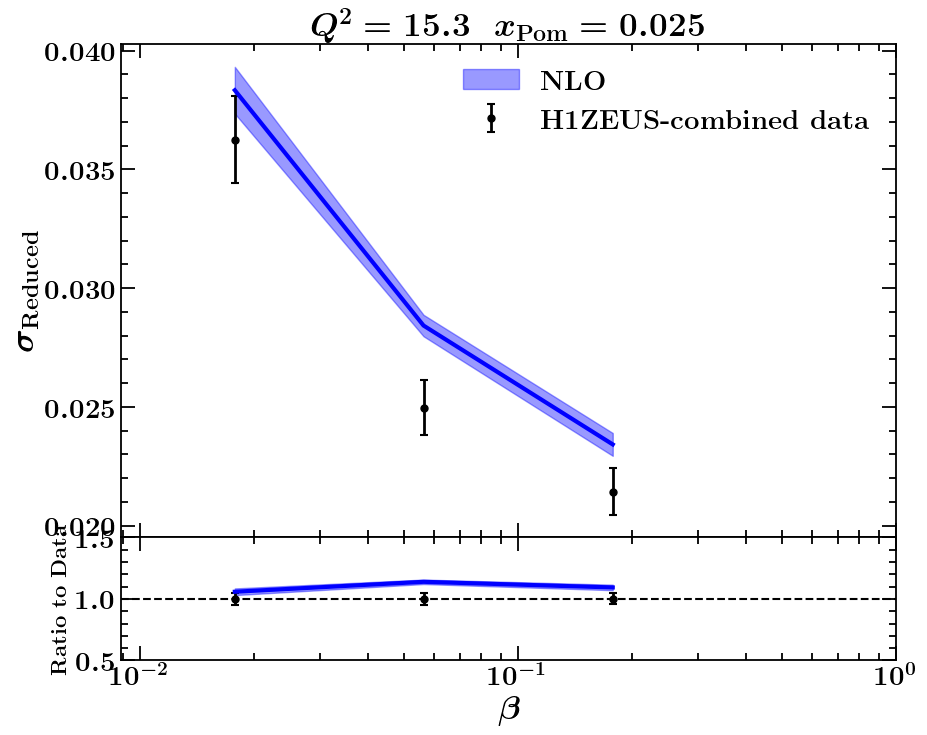

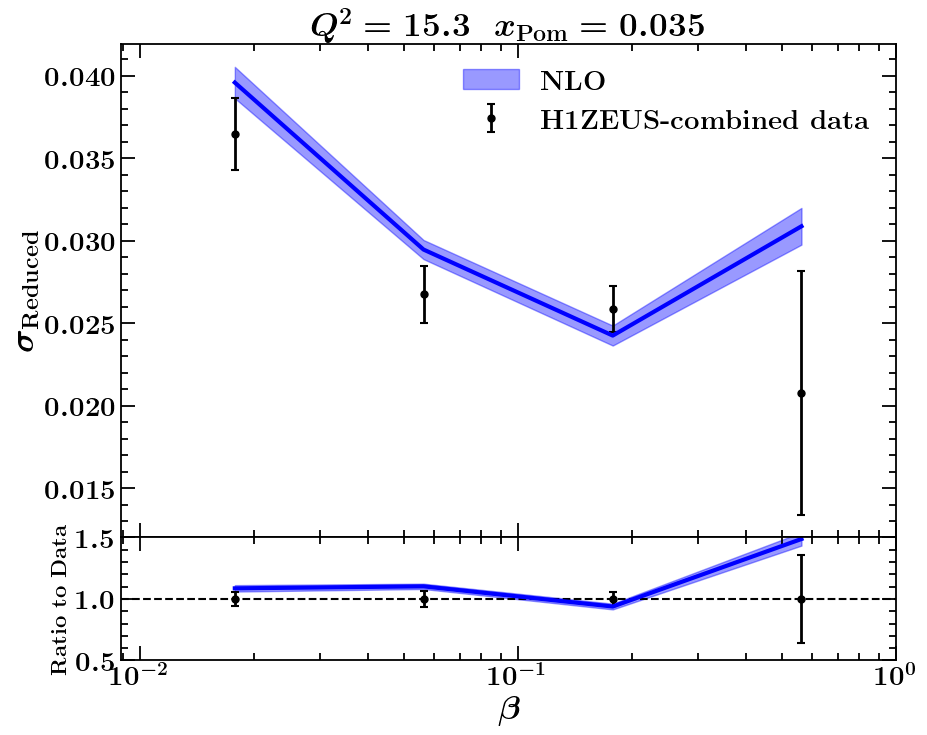

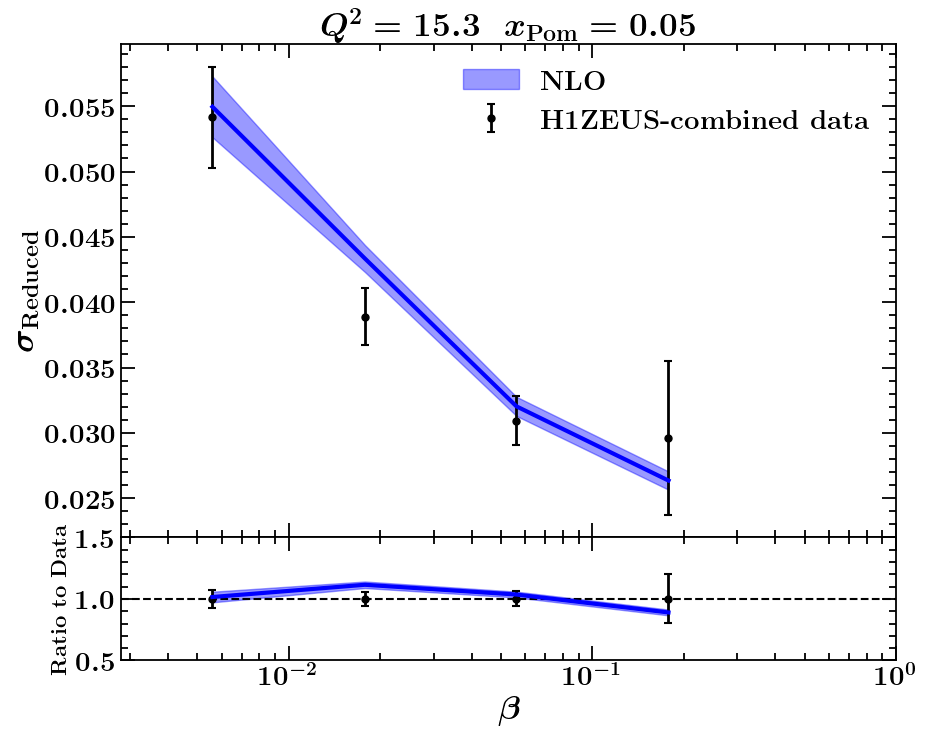

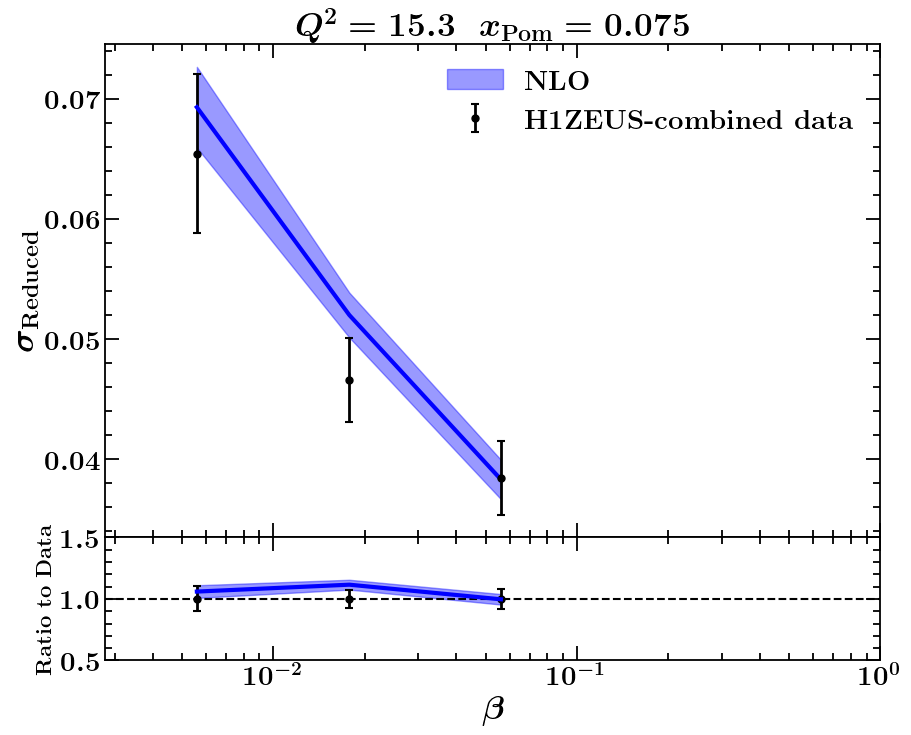

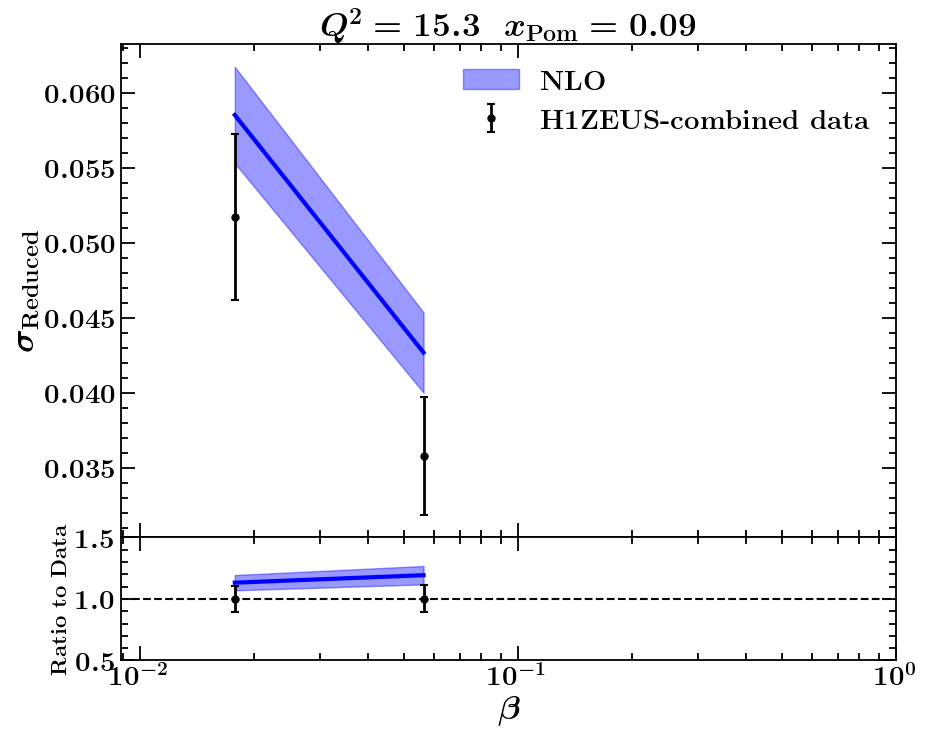

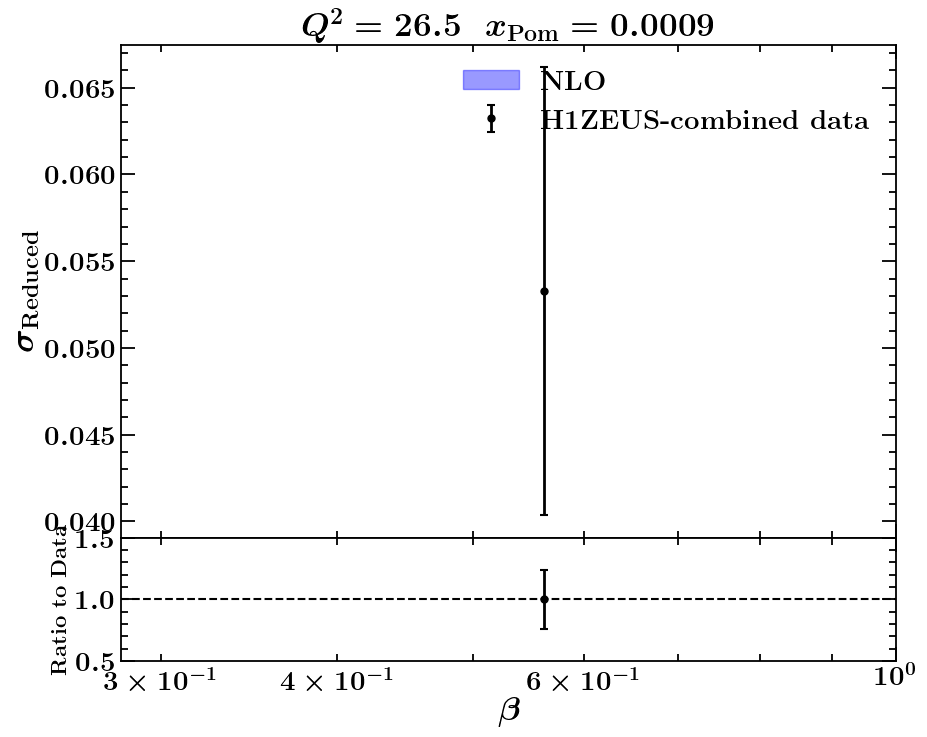

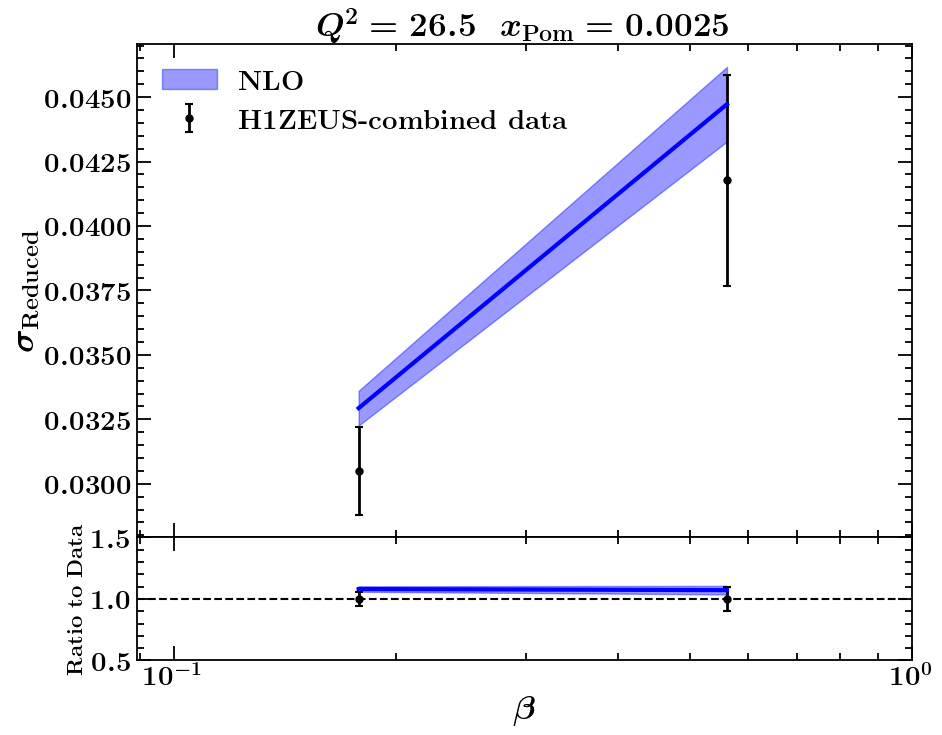

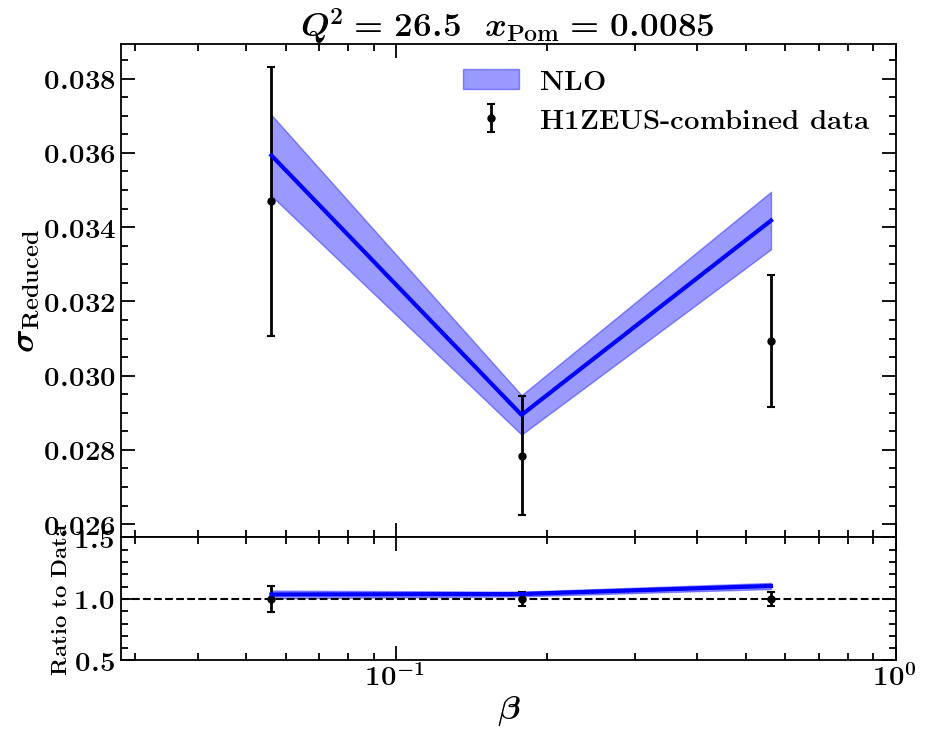

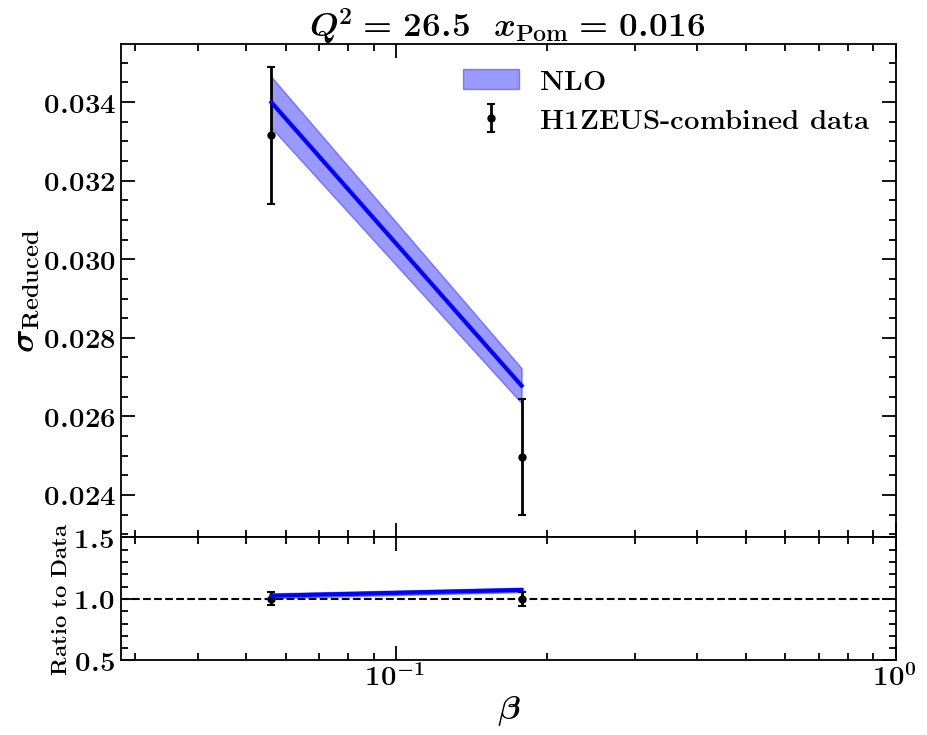

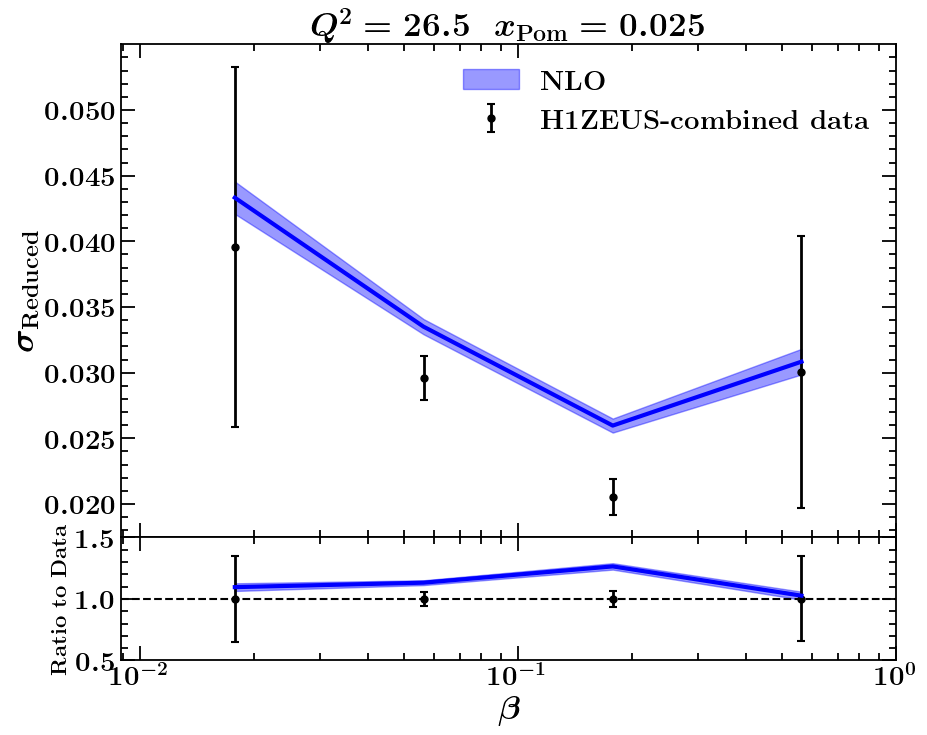

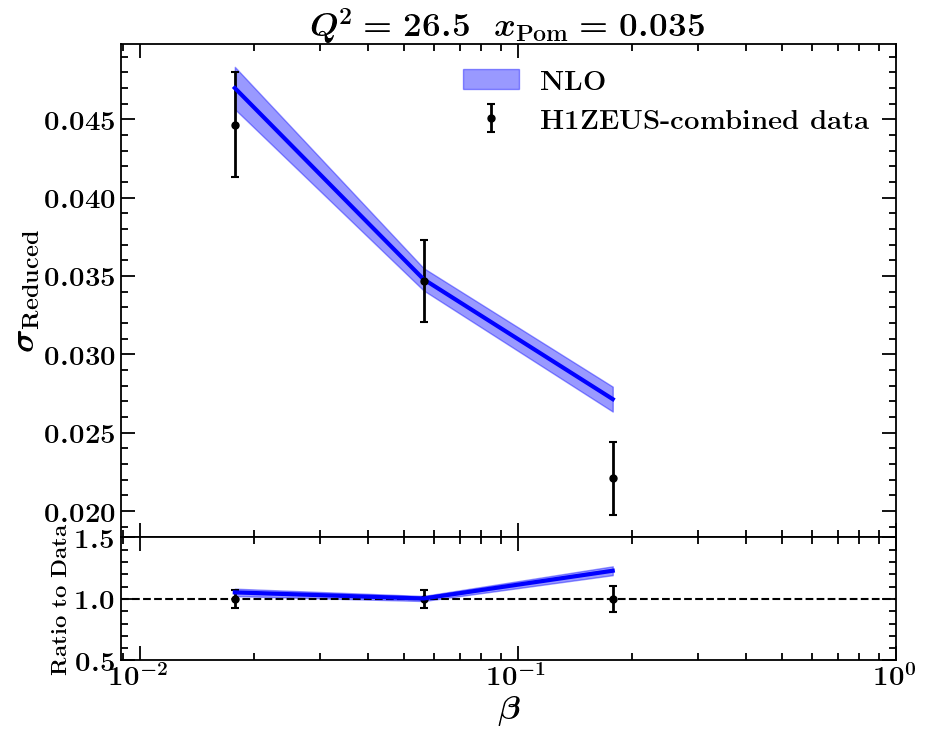

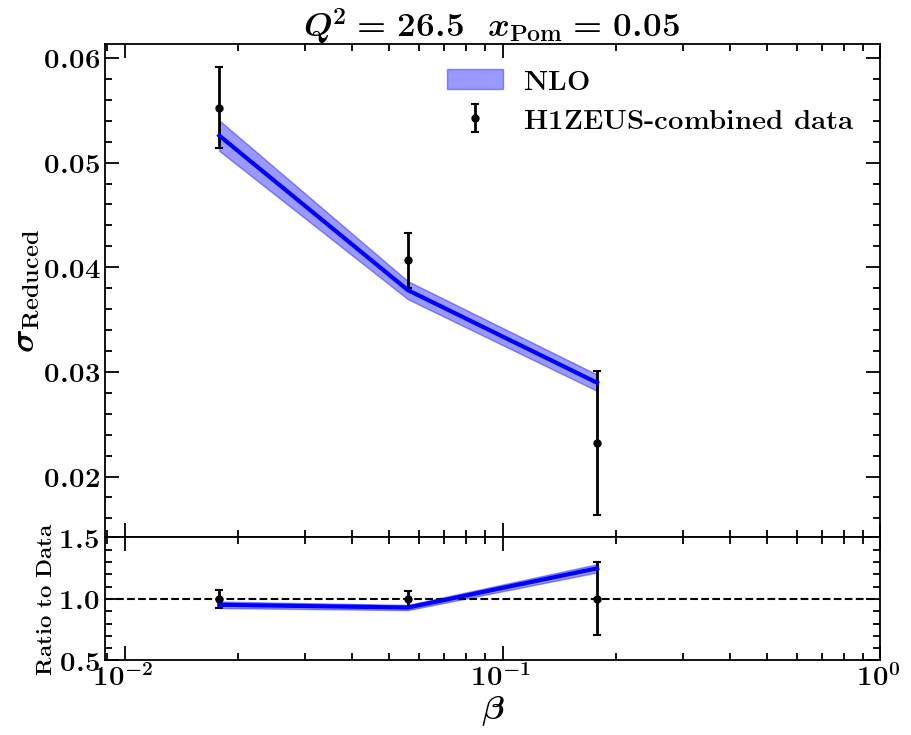

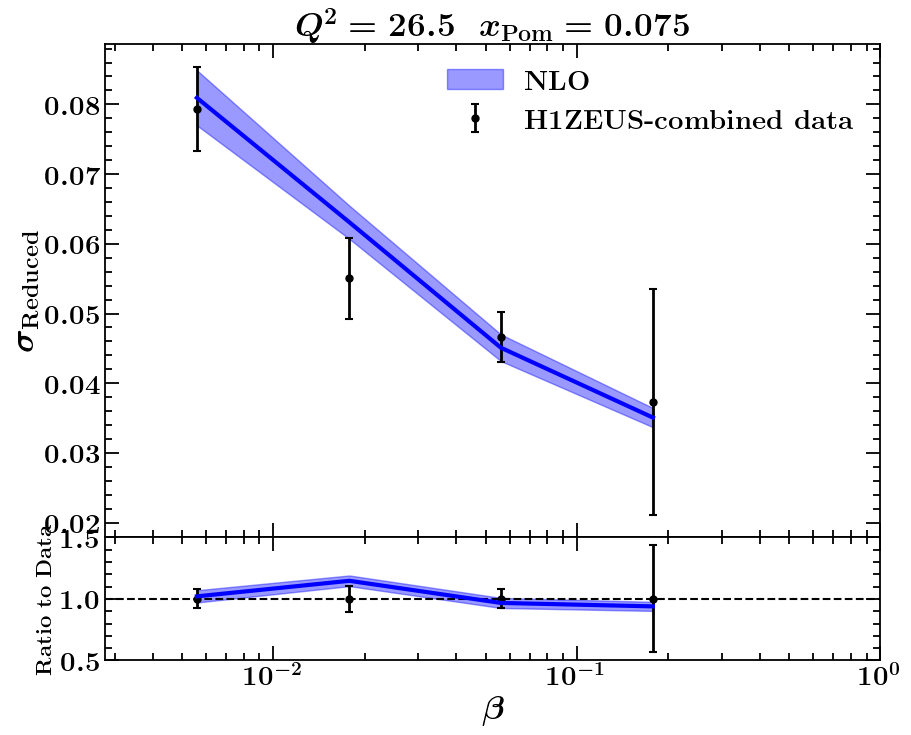

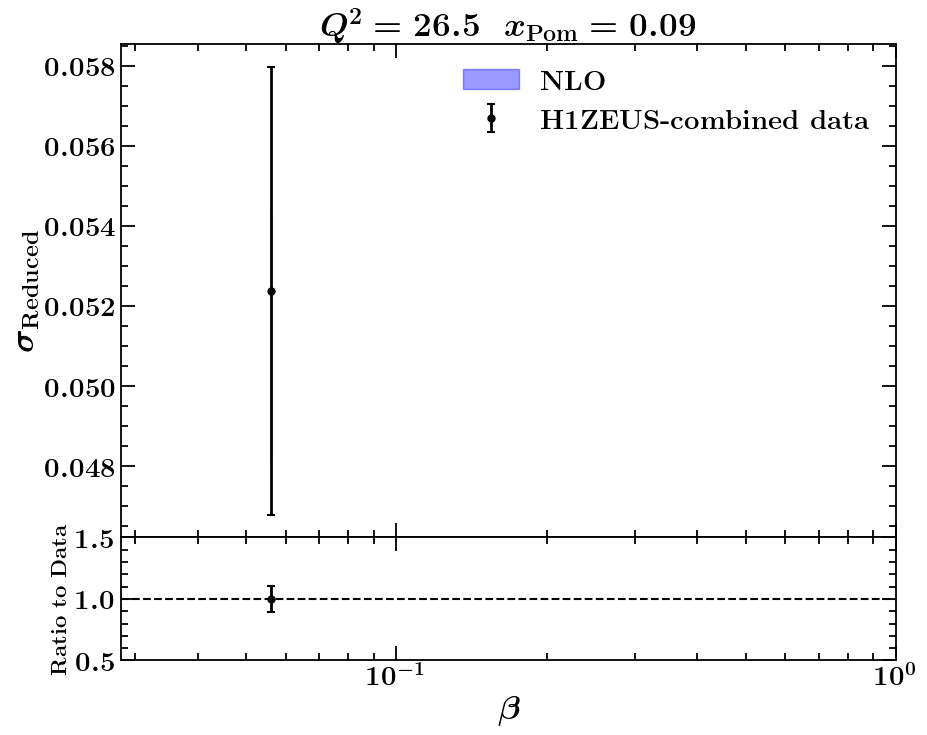

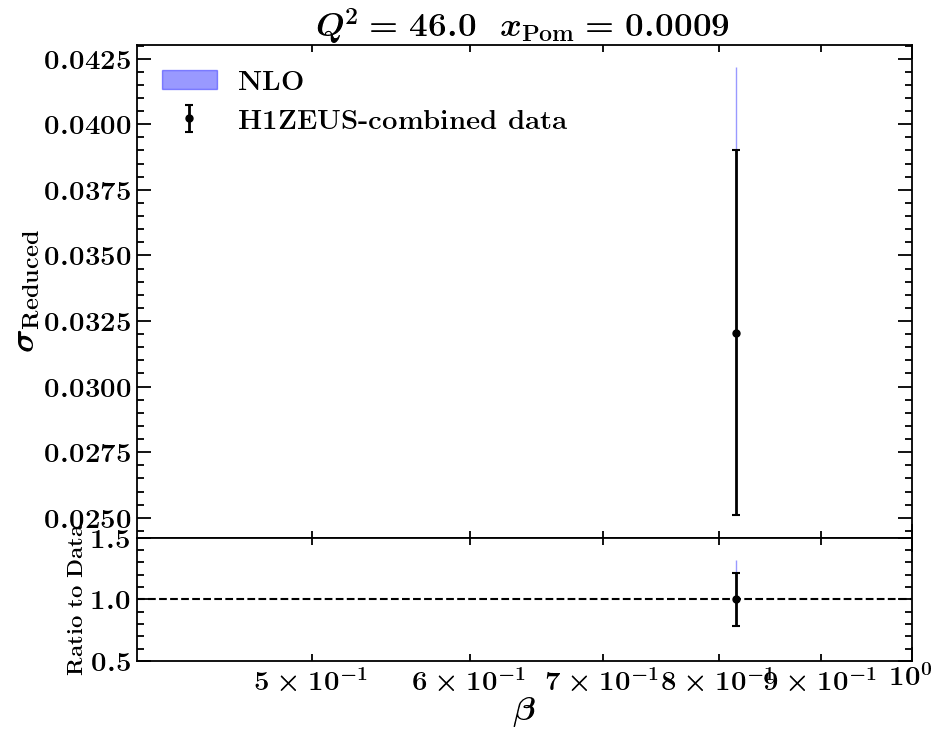

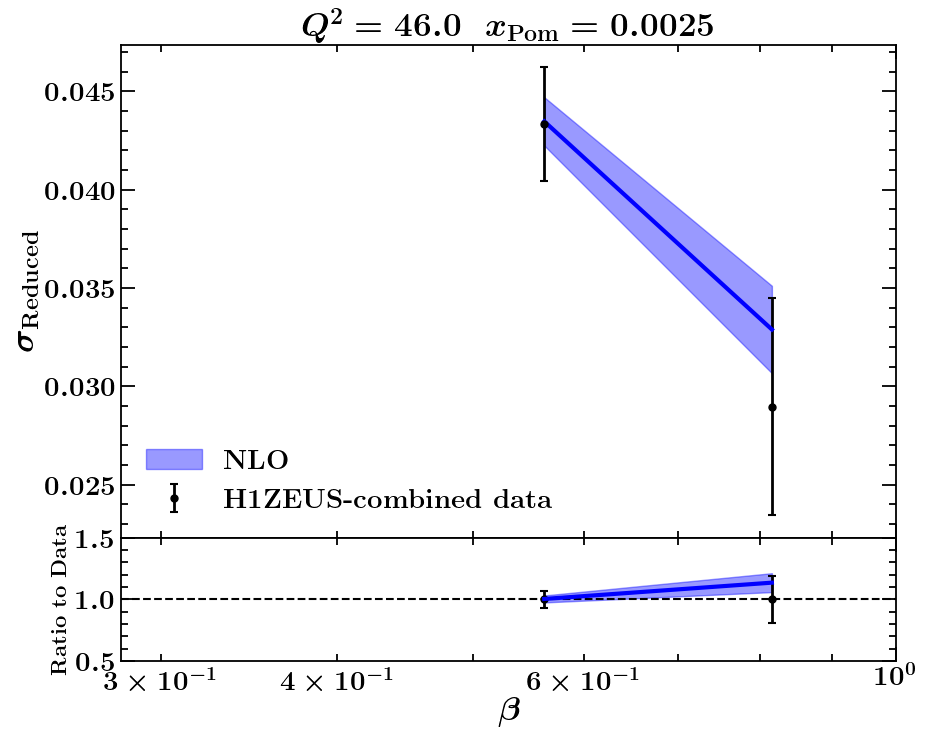

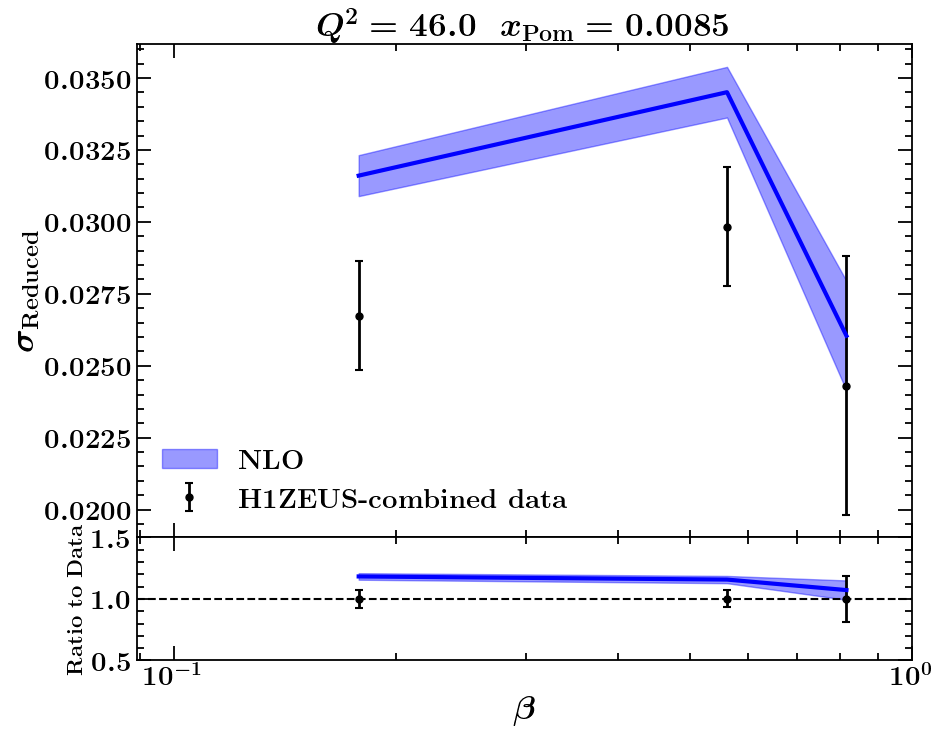

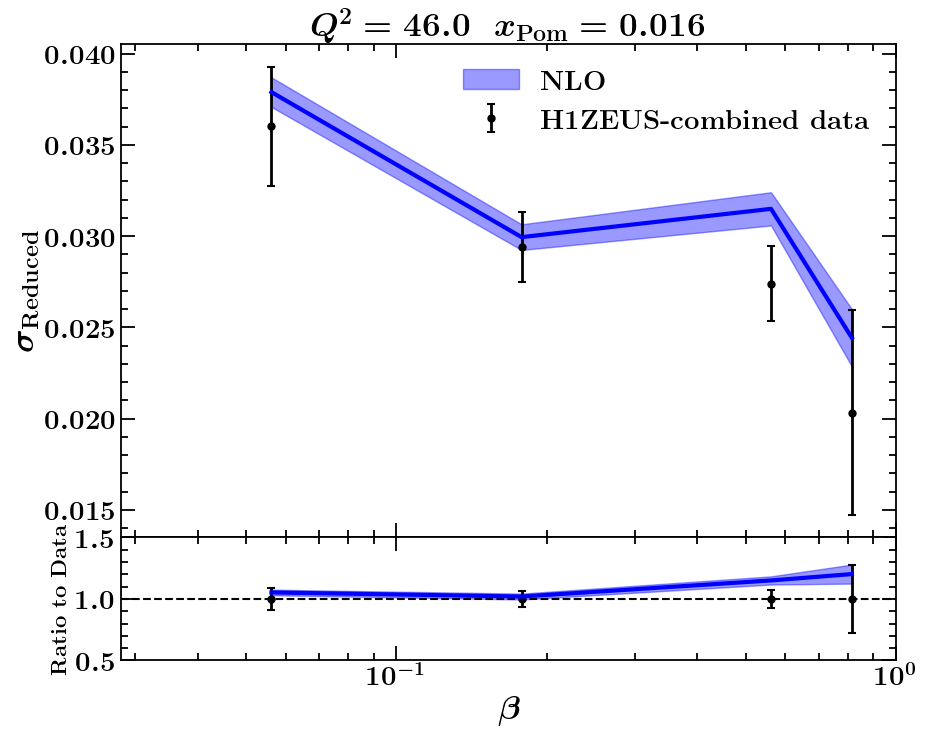

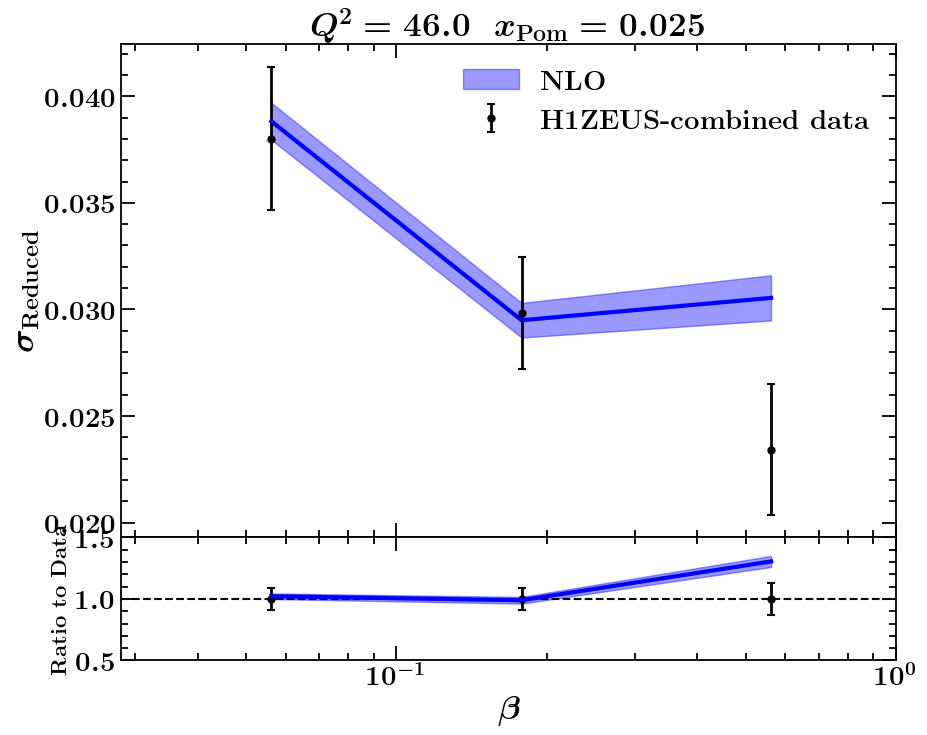

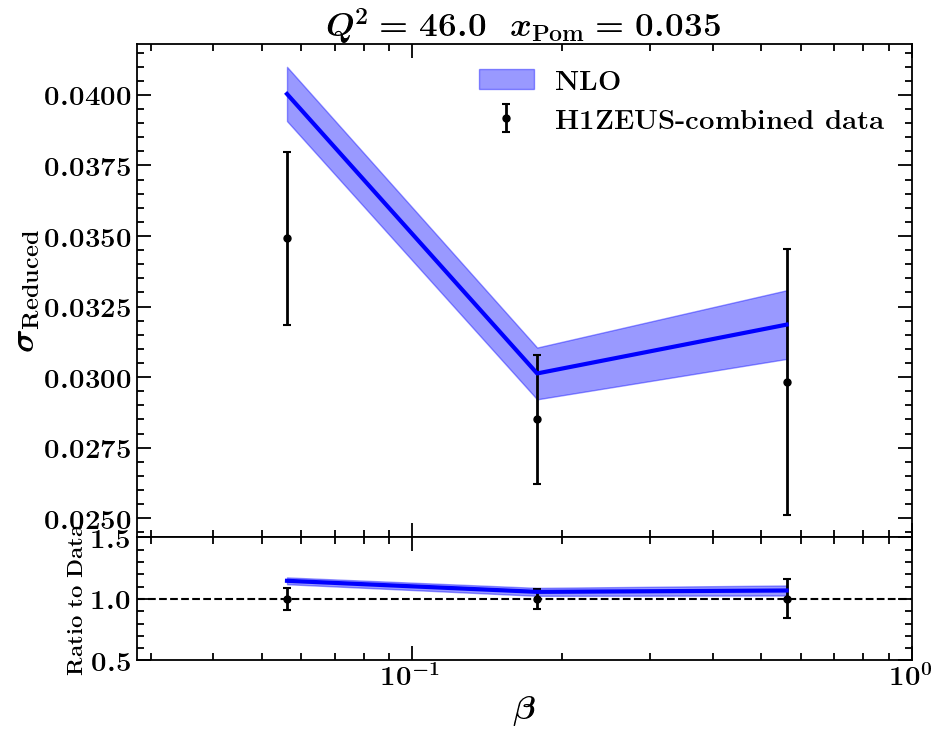

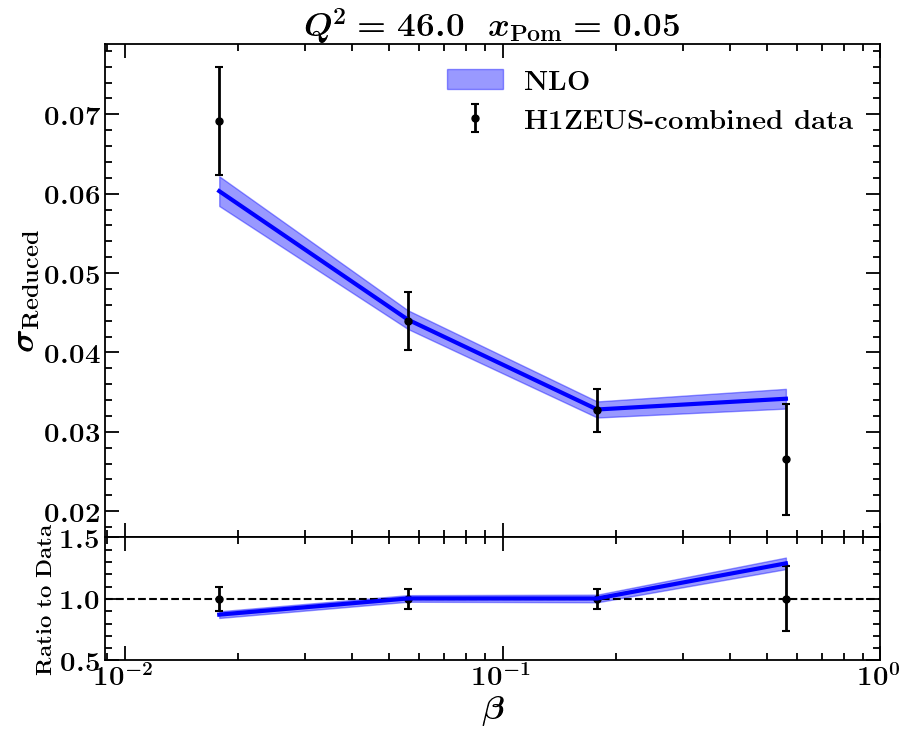

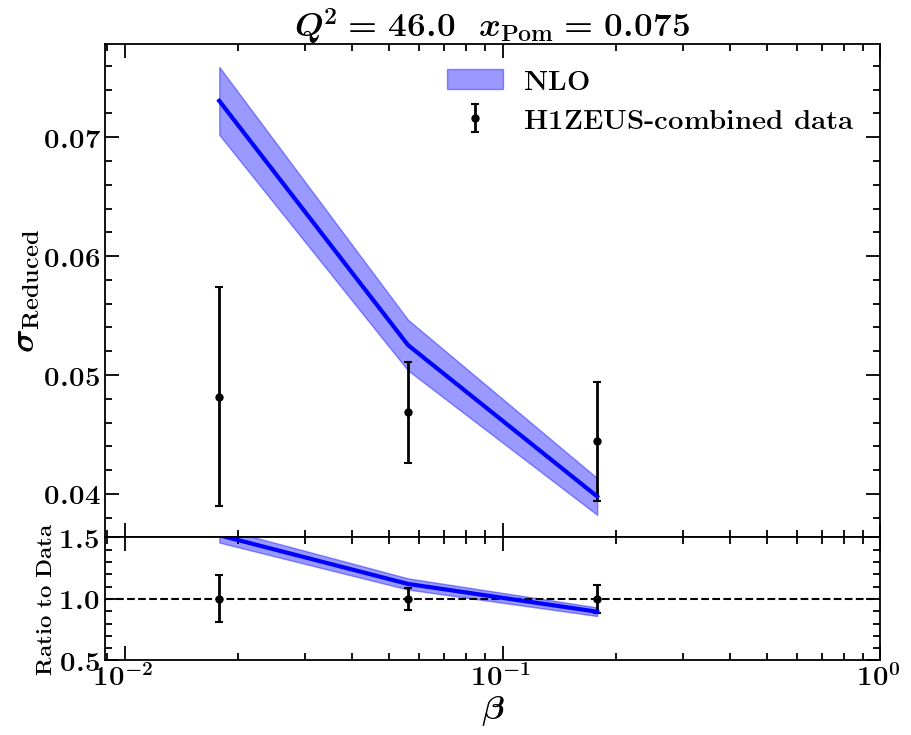

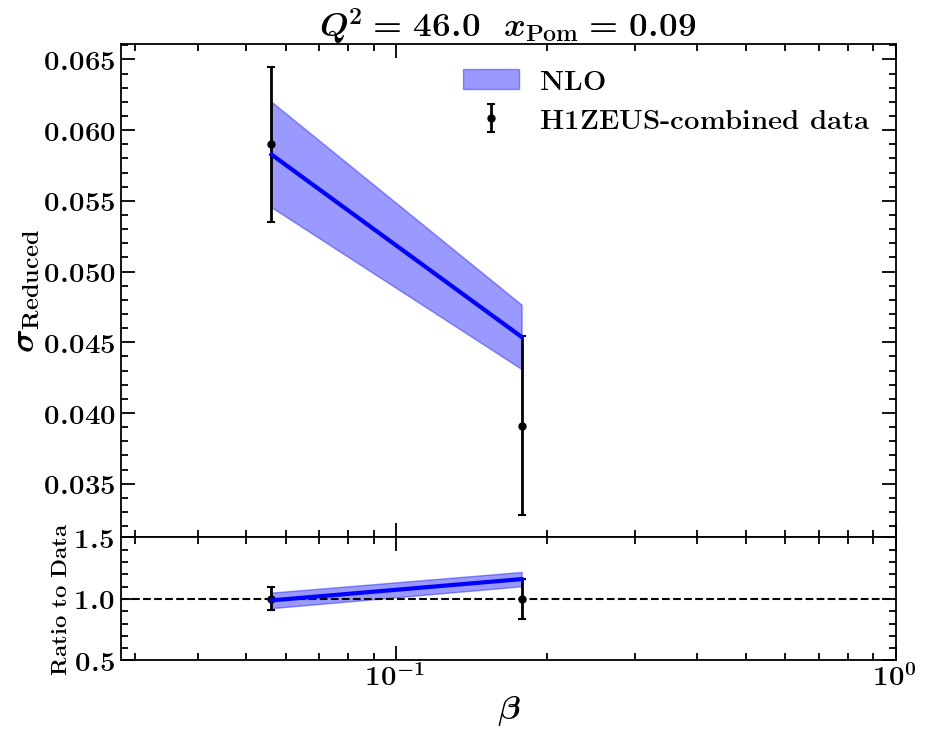

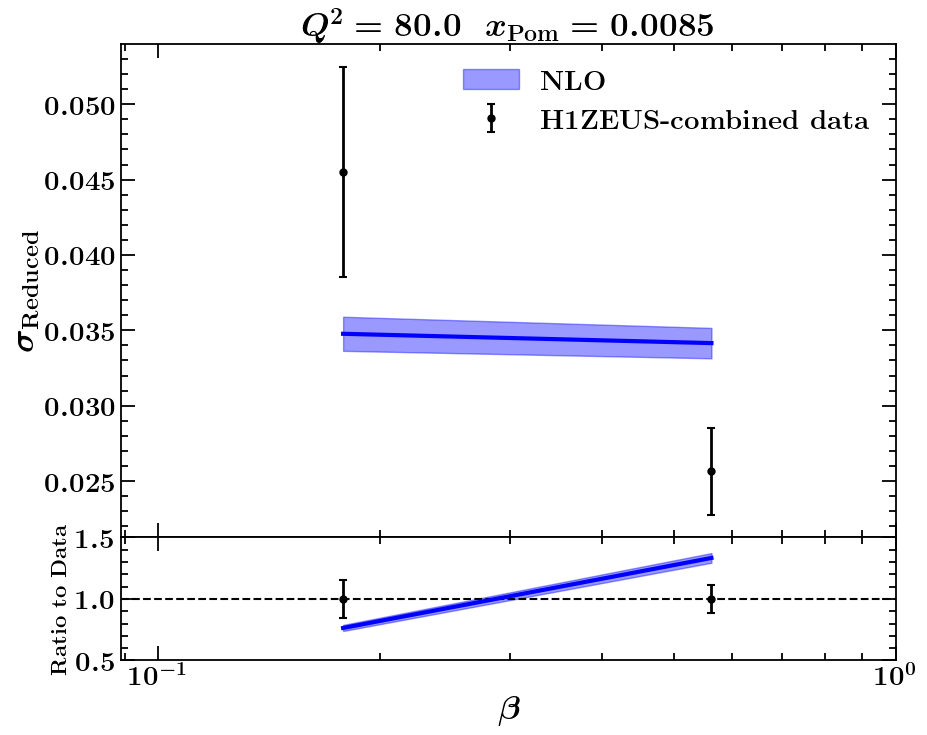

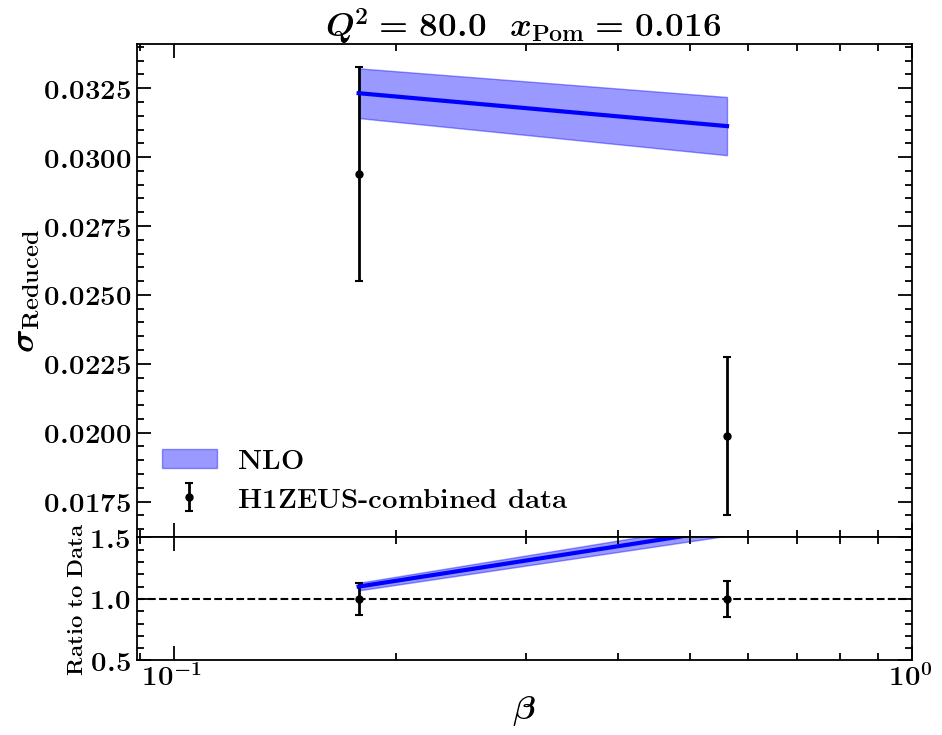

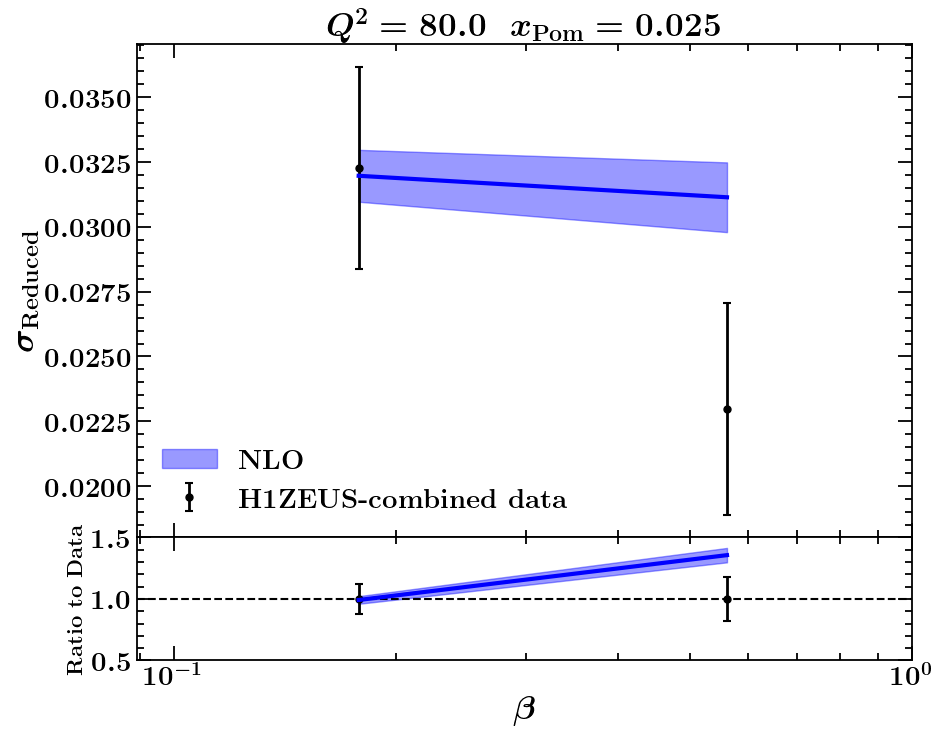

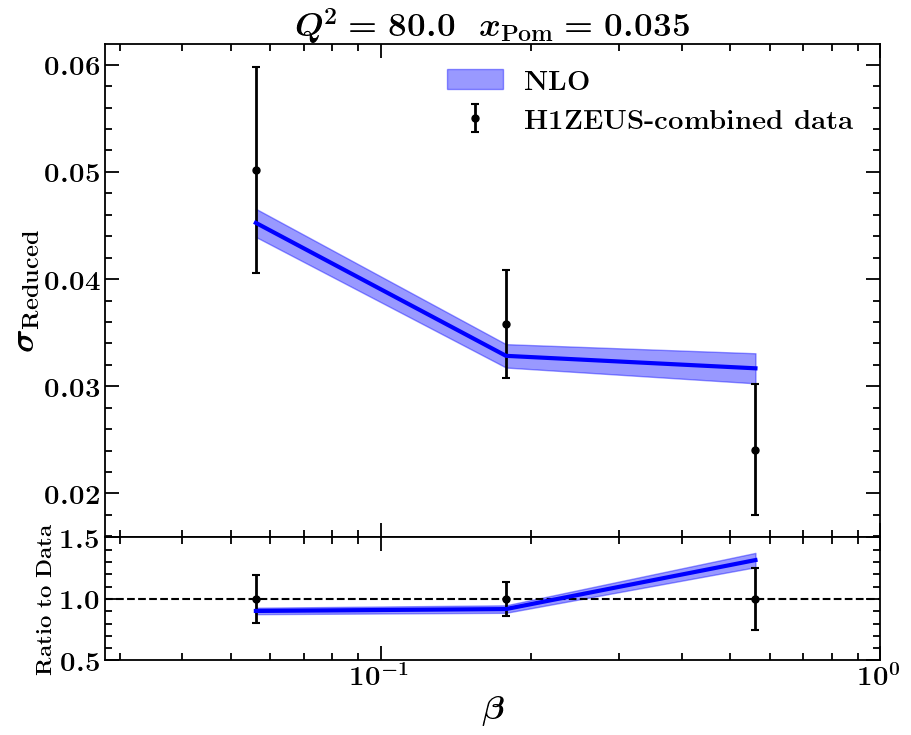

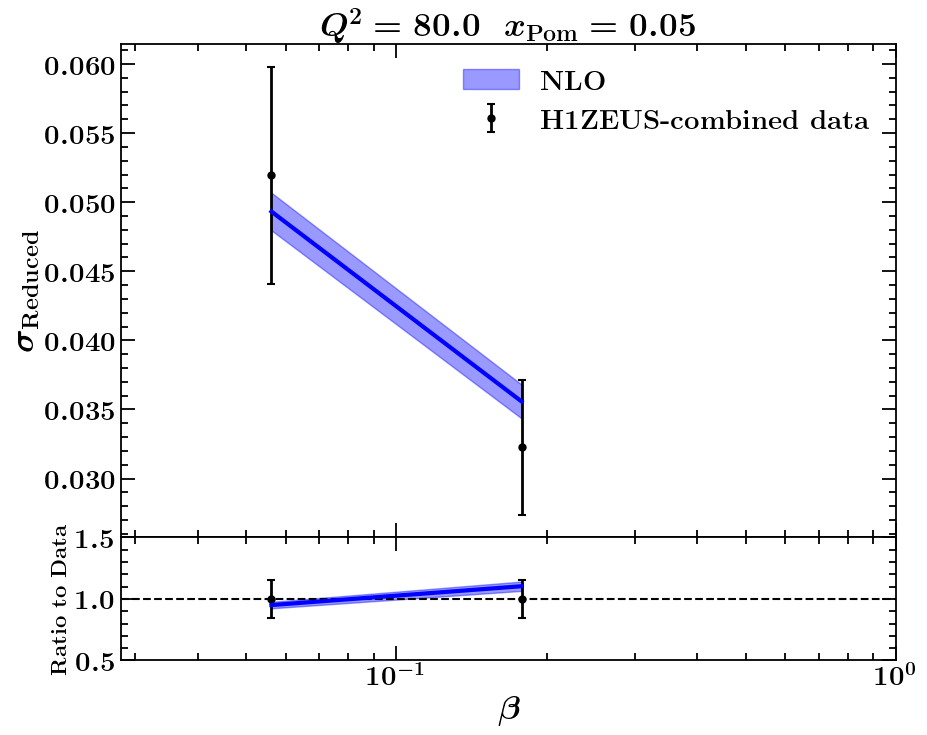

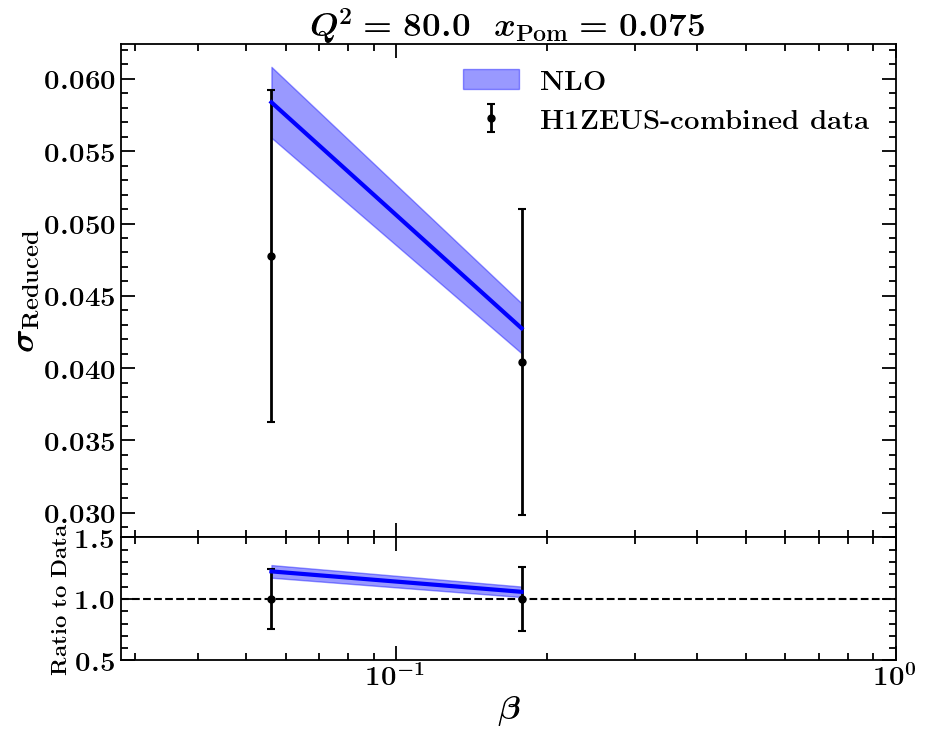

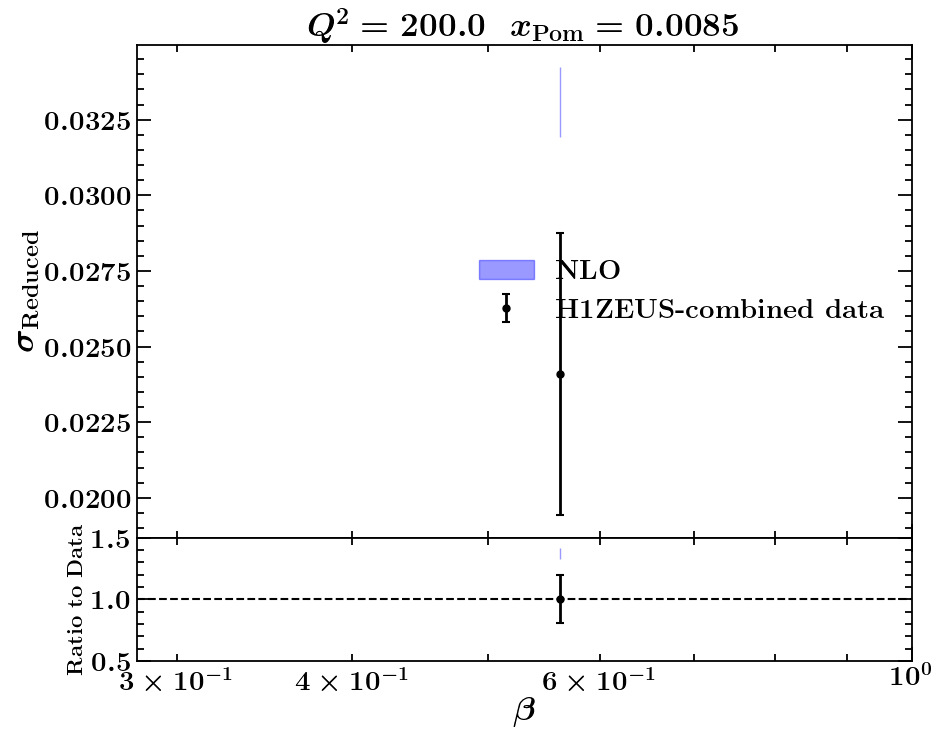

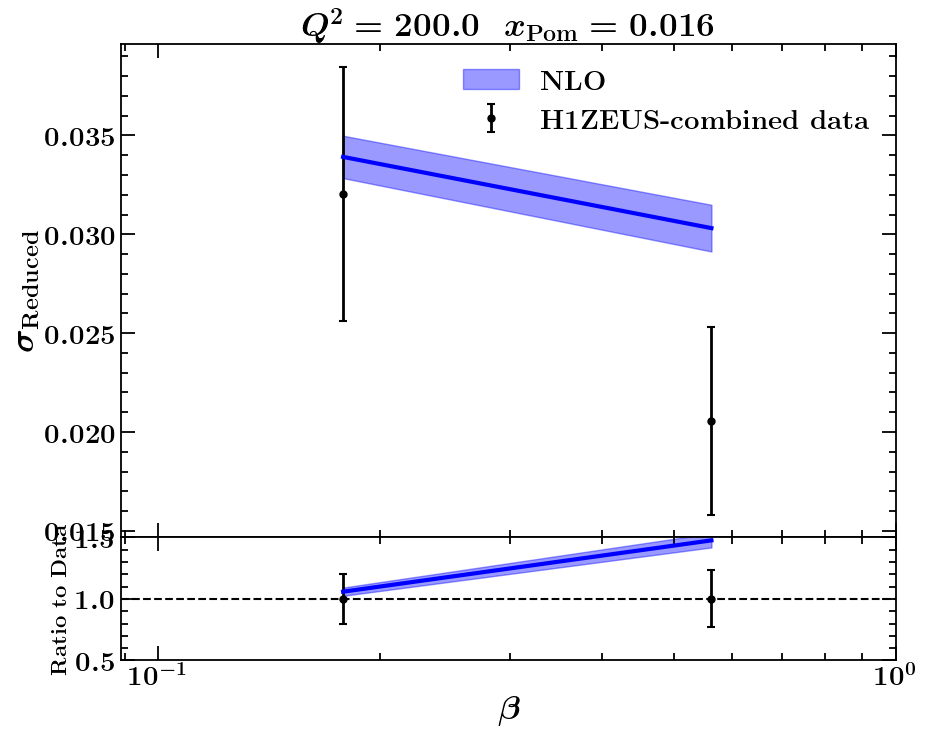

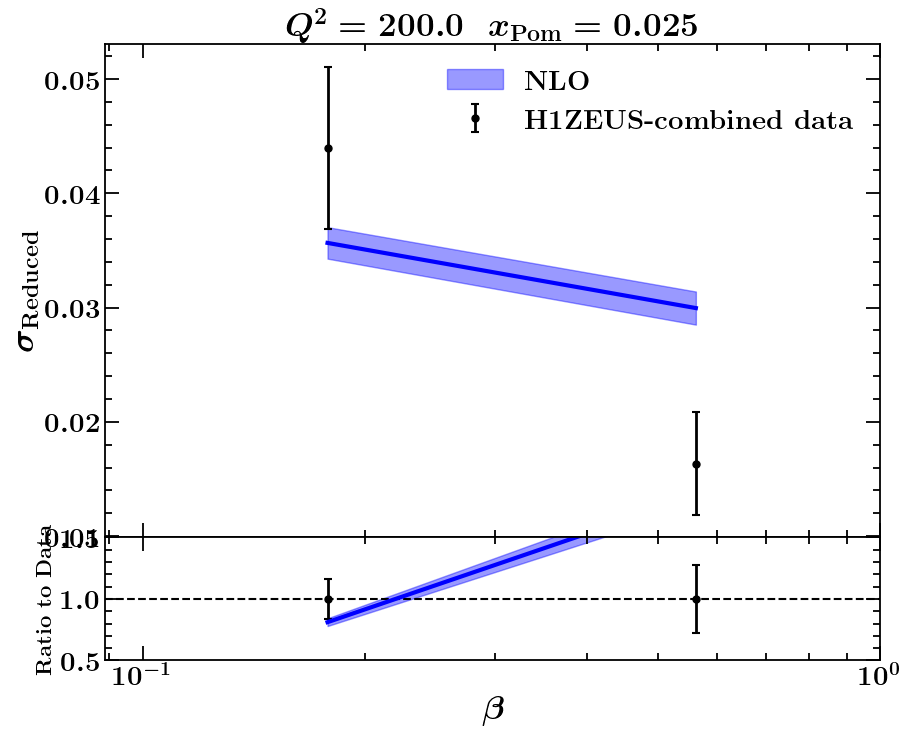

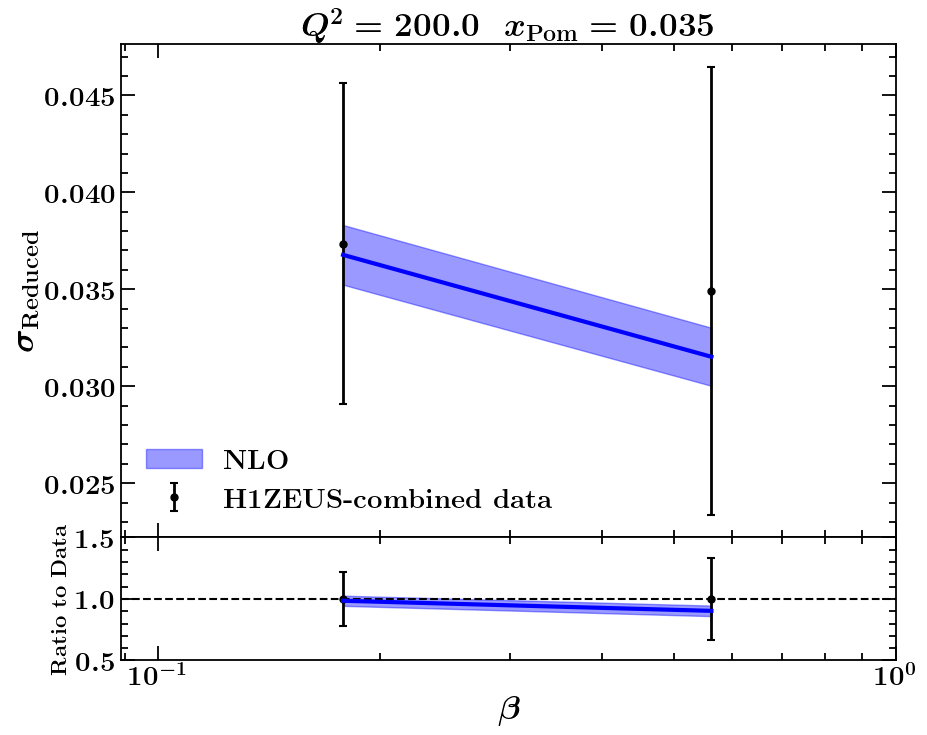

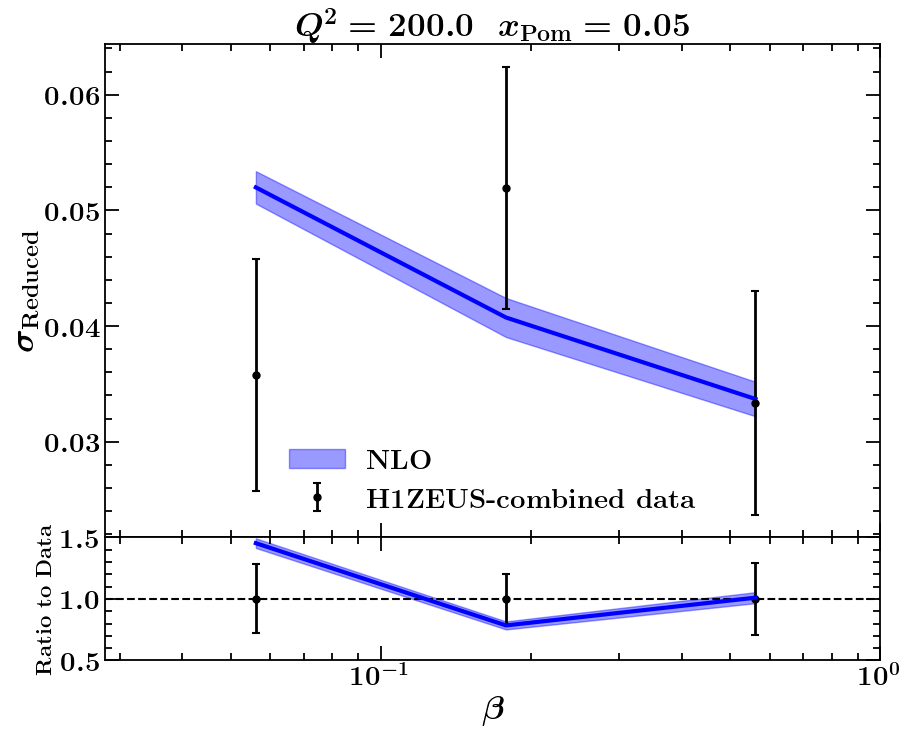

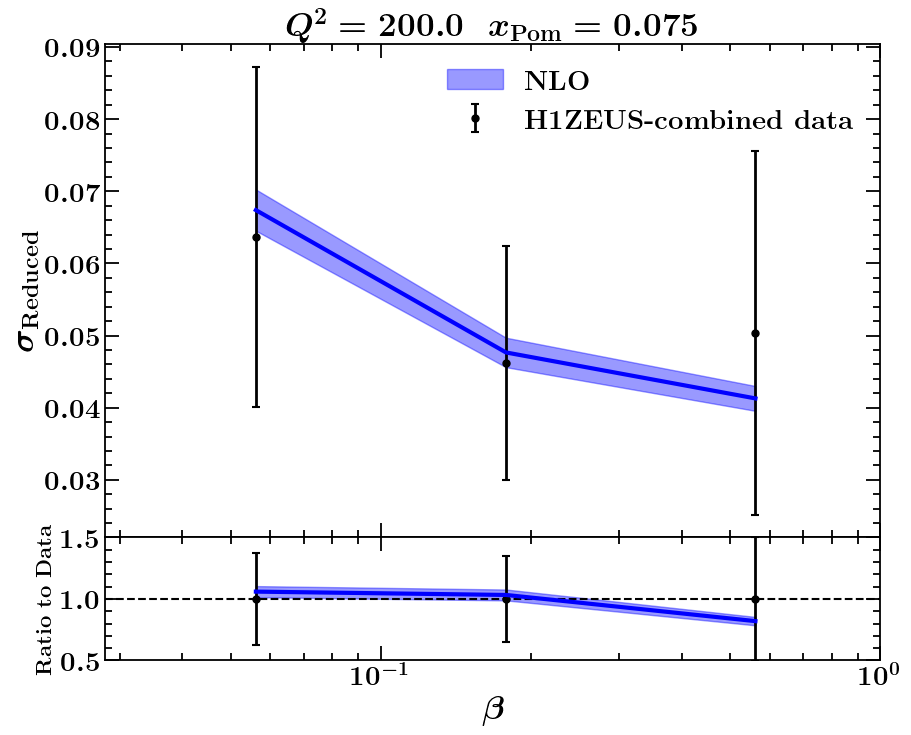

In [21]:
# COMPASS
Qcut = 3.0
print(f"file is {FitFolder + "/Predictions.yaml"}")
with open(FitFolder + "/Predictions.yaml", "r") as p:
    preds = yaml.load(p, Loader = yaml.CLoader)
    for e in preds:
        for exp, points in e.items():
            if "H1LRG_12" in exp:
                print(exp)

                # 
                df = pd.DataFrame(zip([pt["xmin"] for pt in points]     , [pt["xmax"] for pt in points], \
                                      [pt["Qav" ] for pt in points]     , [pt["zav" ] for pt in points], \
                                      [pt["xav" ] for pt in points]     , [pt["exp. central value"] for pt in points],\
                                      [pt["exp. unc."] for pt in points], [pt["prediction"] for pt in points],\
                                      [pt["pred. unc."] for pt in points]  ))
                gp = df.groupby([2,3])           # group by Qav and Zav=xPom
                keys = [key for key, _ in gp]    # keys of the group k[0] = Qav and key[1] = xPom
                dfs = [_x[1] for _x in list(gp)] # len(keys)==len(dfs)
                for _df in dfs:
                    
                    xmin = _df[0].to_numpy()
                    xmax = _df[1].to_numpy()
                    Qav  = _df[2].to_numpy()
                    xPom = _df[3].to_numpy()
                    xav  = _df[4].to_numpy()
                    excv = _df[5].to_numpy()
                    exun = _df[6].to_numpy()
                    thcv = _df[7].to_numpy()
                    thun = _df[8].to_numpy()
                    bstr = r"\textbf{$ Q^2 = " + str(round(Qav[0]*Qav[0],1)) \
                           + "\ \ x_{\mathrm{Pom}} = " + str(xPom[0]) + "$}"
                    inc  = "_in" # it's "_in" unless Qav<QCut then it's "_out" 
                    
                    if (Qav[0] < Qcut):
                        bstr += r"\textbf{ (not included)}"
                        inc = "_out"
                    f, (ax1, ax2) = plt.subplots(2, 1, sharex = "all",\
                                                 gridspec_kw = dict(width_ratios = [1], height_ratios = [4, 1]),\
                                                 figsize=(10, 8))
                    plt.subplots_adjust(wspace = 0, hspace = 0)
                    # Upper panel
                    ax1.set_title(bstr)
                    ax1.set_xscale("log")
                    ax1.set_xlim([0.5*min(xmin), 1.0])
                    ax1.set_ylabel(ylabels[exp])
                    
                    ax1.errorbar(xav, excv, exun, elinewidth = 2, capsize = 3, capthick = 1.5,\
                                 label = r"\textbf{" + exp + " data}", markersize = 5, fmt = "ko")
                    ax1.errorbar(xav, thcv, thun, elinewidth = 2, capsize = 3, capthick = 1.5,\
                                 label = r"\textbf{NLO}", markersize = 5, fmt = "b-")
                    # Calculate upper and lower bounds
                    upper = thcv + thun
                    lower = thcv - thun
                    ax1.fill_between(xav, lower, upper, color='blue', alpha=0.2)
                    # ax1.bar(xmin, 2 * thun, bottom = thcv - thun, width = xmax - xmin, align = "edge"\
                            # , color = "b", label = r"\textbf{NLO}", alpha = 0.5)
                    ax1.legend(fontsize = 20)
                    
                    # Lower panel
                    ax2.set_ylim([0.5, 1.5])
                    ax2.set_xlabel(r"$\beta$")
                    ax2.set_ylabel(r"\textbf{Ratio to Data}", fontsize = 16)
                    ax2.axhline(y = 1, c = "k", ls = "--", lw = 1.5)
                    ax2.errorbar(xav, excv/excv, exun/excv, elinewidth = 2, capsize = 3, capthick = 1.5,\
                                 markersize = 5, fmt = "ko")
                    ax2.errorbar(xav, thcv/excv, thun/excv, elinewidth = 2, capsize = 3, capthick = 1.5,\
                                 label = r"\textbf{NLO}", markersize = 5, fmt = "b-")
                    # Calculate upper and lower bounds
                    upper = (thcv + thun)/excv
                    lower = (thcv - thun)/excv
                    ax2.fill_between(xav, lower, upper, color='blue', alpha=0.2)
                    # ax2.bar(xmin, 2 * thun/excv, bottom = (thcv - thun)/excv, width = xmax - xmin, align = "edge",\
                            # color = "b", alpha = 0.5)
                    
                    # plt.savefig(FitFolder + "/plots/" + plotfile[exp] + "_xPom_" + \
                                # str(xPom[0]) + "_Q2_" + str(round(Qav[0]*Qav[0],1))  + inc + ".pdf")
                    plt.savefig(FitFolder + "/plots/" + plotfile[exp] + "_xPom_" + \
                                str(xPom[0]) + "_Q2_" + str(round(Qav[0]*Qav[0],1))  + inc + ".jpg")
                    plt.show()
                    plt.close()
            else:
                print(exp)

                # 
                df = pd.DataFrame(zip([pt["Qav" ] for pt in points]     , [pt["zav" ] for pt in points], \
                                      [pt["xav" ] for pt in points]     , [pt["exp. central value"] for pt in points],\
                                      [pt["exp. unc."] for pt in points], [pt["prediction"] for pt in points],\
                                      [pt["pred. unc."] for pt in points]  ))
                gp = df.groupby([0,1])           # group by Qav and Zav=xPom
                keys = [key for key, _ in gp]    # keys of the group k[0] = Qav and key[1] = xPom
                dfs = [_x[1] for _x in list(gp)] # len(keys)==len(dfs)
                for _df in dfs:
                    Qav  = _df[0].to_numpy()
                    xPom = _df[1].to_numpy()
                    xav  = _df[2].to_numpy()
                    excv = _df[3].to_numpy()
                    exun = _df[4].to_numpy()
                    thcv = _df[5].to_numpy()
                    thun = _df[6].to_numpy()
                    bstr = r"\textbf{$ Q^2 = " + str(round(Qav[0]*Qav[0],1)) \
                           + "\ \ x_{\mathrm{Pom}} = " + str(xPom[0]) + "$}"
                    inc  = "_in" # it's "_in" unless Qav<QCut then it's "_out" 
                    
                    if (Qav[0] < Qcut):
                        bstr += r"\textbf{ (not included)}"
                        inc = "_out"
                    f, (ax1, ax2) = plt.subplots(2, 1, sharex = "all",\
                                                 gridspec_kw = dict(width_ratios = [1], height_ratios = [4, 1]),\
                                                 figsize=(10, 8))
                    plt.subplots_adjust(wspace = 0, hspace = 0)
                    # Upper panel
                    ax1.set_title(bstr)
                    ax1.set_xscale("log")
                    ax1.set_xlim([0.5*min(xav), 1.0])
                    ax1.set_ylabel(ylabels[exp])
                    
                    ax1.errorbar(xav, excv, exun, elinewidth = 2, capsize = 3, capthick = 1.5,\
                                 label = r"\textbf{" + exp + " data}", markersize = 5, fmt = "ko")
                    ax1.plot(xav, thcv, \
                                  markersize = 0, color = "b")
                    # Calculate upper and lower bounds
                    upper = thcv + thun
                    lower = thcv - thun
                    ax1.fill_between(xav, lower, upper, color='blue', alpha=0.4,label = r"\textbf{NLO}")
                    ax1.legend(fontsize = 20)
                    
                    # Lower panel
                    ax2.set_ylim([0.5, 1.5])
                    ax2.set_xlabel(r"$\beta$")
                    ax2.set_ylabel(r"\textbf{Ratio to Data}", fontsize = 16)
                    ax2.axhline(y = 1, c = "k", ls = "--", lw = 1.5)
                    ax2.errorbar(xav, excv/excv, exun/excv, elinewidth = 2, capsize = 3, capthick = 1.5,\
                                 markersize = 5, fmt = "ko")
                    # Calculate upper and lower bounds
                    upper = (thcv + thun)/excv
                    lower = (thcv - thun)/excv
                    ax2.fill_between(xav, lower, upper, color='blue', alpha=0.4)
                    ax2.errorbar(xav, thcv/excv,\
                                 markersize = 0, color = "b")
                    # plt.savefig(FitFolder + "/plots/" + plotfile[exp] + "_xPom_" + \
                                # str(xPom[0]) + "_Q2_" + str(round(Qav[0]*Qav[0],1))  + inc + ".pdf")
                    plt.savefig(FitFolder + "/plots/" + plotfile[exp] + "_xPom_" + \
                                str(xPom[0]) + "_Q2_" + str(round(Qav[0]*Qav[0],1))  + inc + ".jpg")
                    plt.show()
                    plt.close()
                    
                    
                
                

In [6]:
# Upload sets and declare uncertainty type
lh.pathsAppend(str(FitFolder))

if particle_type == "pr":
    ffs = [lh.mkPDFs("LHAPDFSet_01")]#, lh.mkPDFs("SKMHS23_NLO_dijet")]
    unc = ["montecarlo", "hessian", "hessian", "montecarlo"]
    colff = ["green", "red", "green", "orange"]
    nameff = [r"\textbf{NN NLO Fit}", r"\textbf{SKMHS22-tw2-NLO}", r"\textbf{JAM19}"]
    
elif particle_type == "ka":
    ffs = [lh.mkPDFs("LHAPDFSet"), lh.mkPDFs("DSS17_NLO_Kaonp"),
           lh.mkPDFs("NNFF10_KAp_nlo"), lh.mkPDFs("NNFF10_KAp_nnlo")]
    unc = ["montecarlo"]*4
    colff = ["red", "blue", "green", "orange"]
    nameff = [r"\textbf{MAP FF1.0}", r"\textbf{DSS17}", r"\textbf{NNFF10 NLO}", r"\textbf{NNFF10 NNLO}"]

else:
    ffs = [lh.mkPDFs("LHAPDFSet")]
    unc = ["montecarlo"]
    colff = ["red"]
    nameff = [r"\textbf{MAP FF1.0}"]


# Function that returns the central values
def ComputeCentralValueAndUncertainty(x, Q, comb):
    centralvalue = []
    uncertainty  = []
    for s in zip(ffs, unc):
        if s[1] == "hessian":
            # In the case of a hessian set, use replica 0 as central value
            cv = 0
            f = s[0][0].xfxQ(x, Q)
            for k, v in comb.items():
                cv += v * f[k]
            err = 0
            for im in range(int((len(s[0]) - 1)/2)):
                fp = s[0][2*im+1].xfxQ(x, Q)
                fm = s[0][2*im+2].xfxQ(x, Q)
                t = 0
                for k, v in comb.items():
                    t += v * fp[k]
                    t -= v * fm[k]
                err += t**2
            centralvalue.append(cv)
            uncertainty.append(np.sqrt(err)/2)            
        elif s[1] == "montecarlo":
            # In case of a MC set, compute the average and standard deviation (do not include replica 0)
            cv  = 0
            cv2 = 0
            for irep in range(1, len(s[0])):
                f = s[0][irep].xfxQ(x, Q)
                t = 0
                for k, v in comb.items():
                    t += v * f[k]
                cv  += t / ( len(s[0]) - 1 )
                cv2 += t**2 / ( len(s[0]) - 1 )
            centralvalue.append(cv)
            uncertainty.append(np.sqrt(cv2 - cv**2))
        else:
            sys.exit("Unknown error: ", s[1])
    return centralvalue, uncertainty

LHAPDF 6.5.5 loading all 96 PDFs in set LHAPDFSet_01
LHAPDFSet_01, version 1; 96 PDF members


In [7]:
# FF plot settings

# Scale
Q = np.sqrt(10.0)

# Grid in x
xv = np.logspace(-3, -0.0001, 1000)

# Combinations to be plotted
combs = [{21: 1}, {1:1/6, 2:1/6, 3:1/6, -1:1/6 , -2:1/6, -3:1/6}]
labels = [r"$\beta \mathcal{F}_g(\beta,Q)$", r"$\beta \mathcal{F}_q(\beta,Q)$"]
ylim1 = [[0,150], [0,6]]
pdfname = ["g", "sigma"]

<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1019734/1190376693.py:26: SyntaxWarning: invalid escape sequence '\s'
  hk19     = pd.read_csv(filename,  sep='\s+', header=None)
/tmp/ipykernel_1019734/1190376693.py:32: SyntaxWarning: invalid escape sequence '\s'
  gkg18     = pd.read_csv(filename_gkg18,  sep='\s+', header=None)


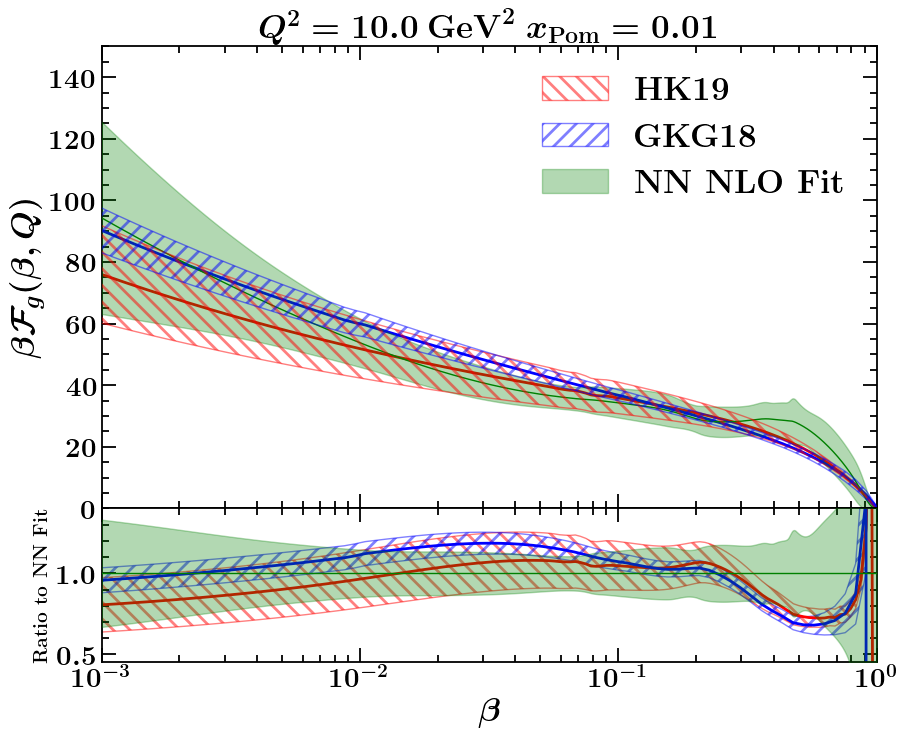

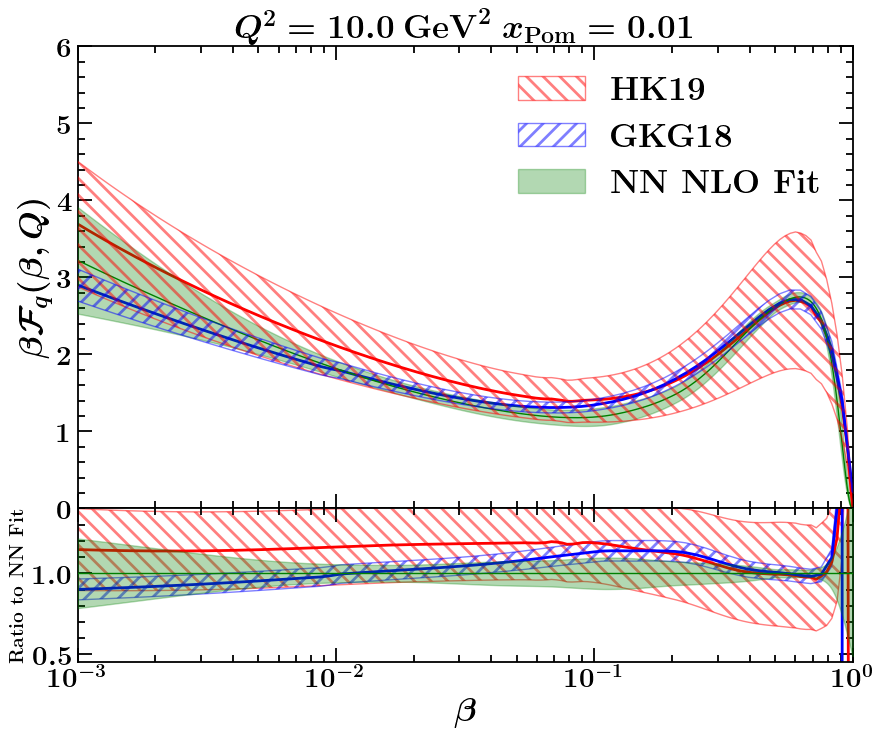

In [8]:
comparision= './comparision-other-group/'

# Plot FFs
xPom=0.01
for cm in zip(combs, labels, ylim1, pdfname):
    # comparision=
    # print( comparision + cm[3] + "_xPom_"+ str(xPom) + '.dat')
    filename  = comparision + cm[3] + "_xPom_"+ str(xPom) + '.dat'
    zeusfile  = comparision + "zeusD_SJ_xPom_"+ str(xPom) + '.dat'
    filename_gkg18 = comparision + "/GKG18_Q2_10/" + cm[3] + "_xPom_"+ str(xPom) + '.dat'
    # zeus = pd.read_csv(zeusfile, sep='\s+', comment='#', header=None)
    # xzeus = zeus[0].to_numpy()
    # if cm[-1]=="g":
    #     print("gluon")
    #     yzeus    = zeus[1].to_numpy()
    #     yminzeus = np.array(zeus[1].to_numpy()-zeus[5].to_numpy())
    #     ymaxzeus = np.array(zeus[1].to_numpy()+zeus[5].to_numpy())
    # else:
    #     print("Sigma")
    #     yzeus    = 3.0 * (zeus[2].to_numpy())+zeus[3].to_numpy()+zeus[4].to_numpy()
    #     yminzeus = yzeus - 6.0*(zeus[6].to_numpy())
    #     ymaxzeus = yzeus + 6.0*(zeus[6].to_numpy())
        # yminzeus = 6.0 * (np.array(zeus[2].to_numpy()-zeus[6].to_numpy()))
        # ymaxzeus = 6.0 * (np.array(zeus[2].to_numpy()+zeus[6].to_numpy()))
    ############# HK19 #############
    hk19     = pd.read_csv(filename,  sep='\s+', header=None)
    xhk19    = hk19[0].to_numpy()
    yhk19    = hk19[1].to_numpy()
    yminkh19 = np.array(hk19[1].to_numpy()-hk19[2].to_numpy())
    ymaxhk19 = np.array(hk19[1].to_numpy()+hk19[2].to_numpy())

    gkg18     = pd.read_csv(filename_gkg18,  sep='\s+', header=None)
    xgkg18    = gkg18[0].to_numpy()
    ygkg18    = gkg18[1].to_numpy()
    ymingkg18 = np.array(gkg18[1].to_numpy()-gkg18[2].to_numpy())
    ymaxgkg18 = np.array(gkg18[1].to_numpy()+gkg18[2].to_numpy())
    fv  = []
    dfv = []
    for x in xv:
        cv, err = ComputeCentralValueAndUncertainty(x, Q, cm[0])
        fv.append(cv)
        dfv.append(err)
        # hasan.append(err)
    # Transpose results
    fv  = list(map(list, zip(*fv)))
    dfv = list(map(list, zip(*dfv)))

    # Setup plot
    f, (ax1, ax2) = plt.subplots(2, 1, sharex = "all",\
                                 gridspec_kw = dict(width_ratios = [1], height_ratios = [3, 1]),figsize=(10,8))
    plt.subplots_adjust(wspace = 0, hspace = 0)
    
    ax1.set_title(r"$Q^2 = " + str(round(Q**2,1)) + r"\ \textbf{GeV}^2\ x_{\mathrm{Pom}}="+ str(xPom) +r"$")
    ax1.set_ylabel(cm[1])
    ax1.set_xlim([0.001, 1])
    ax1.set_xscale("log")
    ax1.set_ylim(cm[2])
    
    ax2.set_xlabel(r"$\beta$")
    ax2.set_ylabel(r"\textbf{Ratio to " + "NN Fit" + "}", fontsize = 14)
    ax2.set_xlim([0.001, 1])
    ax2.set_xscale("log")
    ax2.set_ylim([0.45, 1.4])

    for iset in range(len(fv)):
        # if iset == 1 : # this is LHAPDFSet
        # fv[0]  = xPom**(-1.21)*(1 + 88.7 * xPom**1.75 ) *np.array(fv[0])
        # dfv[0] = xPom**(-1.21)*(1 + 88.7 * xPom**1.75 ) *np.array(dfv[0])
#         print(10*np.array(fv[iset]))
#         fv[1] =  np.array(fv[1])
                ############# HK19 #############
        color= 'r'
        markerth=''
        hatch='\\\\'
        alpha=1
        bandcolor="none"
        edgecolor='r'
        plt.rcParams['hatch.linewidth'] = 2.0  # previous pdf hatch linewidth
        thlinestyle,linewidth='-',2.0
        ax1.plot(xhk19, yhk19, color = color, lw = linewidth, marker=markerth)
        ax1.fill_between(xhk19, ymaxhk19, yminkh19, color = bandcolor, \
                         alpha = 0.5,hatch=hatch ,edgecolor=edgecolor,zorder=11, label=r'\textbf{HK19}')
        # Interpolate the first function to the x-values of the second function
        interp_func = interpolate.interp1d(xv, fv[iset], kind='linear', fill_value="extrapolate")
        y1_interp = interp_func(xhk19)
        ax2.plot(xhk19, yhk19/y1_interp, color = color, lw = linewidth, marker=markerth)
        ax2.fill_between(xhk19, ymaxhk19/y1_interp, yminkh19/y1_interp, color = bandcolor, \
                         alpha = 0.5,hatch=hatch ,edgecolor=edgecolor)
        ############# HK19 #############
        ############# GKG18 #############
        color= 'blue'
        markerth=''
        hatch='//'
        alpha=1
        bandcolor="none"
        edgecolor='blue'
        plt.rcParams['hatch.linewidth'] = 2.0  # previous pdf hatch linewidth
        thlinestyle,linewidth='-',2.0
        ax1.plot(xgkg18, ygkg18, color = color, lw = linewidth, marker=markerth)
        ax1.fill_between(xgkg18, ymaxgkg18, ymingkg18, color = bandcolor, \
                         alpha = 0.5,hatch=hatch ,edgecolor=edgecolor,zorder=21, label=r'\textbf{GKG18}')
        # Interpolate the first function to the x-values of the second function
        interp_func = interpolate.interp1d(xv, fv[iset], kind='linear', fill_value="extrapolate")
        y1_interp = interp_func(xgkg18)
        ax2.plot(xgkg18, ygkg18/y1_interp, color = color, lw = linewidth, marker=markerth)
        ax2.fill_between(xgkg18, ymaxgkg18/y1_interp, ymingkg18/y1_interp, color = bandcolor, \
                         alpha = 0.5,hatch=hatch ,edgecolor=edgecolor)
        ############# GKG18 #############
        ax1.plot(xv, fv[iset], color = colff[iset], ls = "-", lw = 1, zorder=10)
        ax1.fill_between(xv,(np.array(fv[iset]) + np.array(dfv[iset])),\
                         (np.array(fv[iset]) - np.array(dfv[iset])),\
                         color = colff[iset], alpha = 0.3, label = nameff[iset], zorder=10)
        ax1.plot(xv, xv - xv, color = "black", ls = "--", lw = 1)
        ax2.plot(xv, np.array(fv[iset])/np.array(fv[0]), color = colff[iset], ls = "-", lw = 1, zorder=10)
        ax2.fill_between(xv, (np.array(fv[iset])+np.array(dfv[iset]))/np.array(fv[0]),\
                         (np.array(fv[iset])-np.array(dfv[iset]))/np.array(fv[0]),\
                         color = colff[iset], alpha = 0.3, zorder=10)
        # ############# ZEUS ##############
        # color= 'b'
        # markerth=''
        # hatch='\\\\'
        # alpha=1
        # bandcolor="none"
        # edgecolor= color
        # plt.rcParams['hatch.linewidth'] = 2.0  # previous pdf hatch linewidth
        # thlinestyle,linewidth='-',2.0
        # ax1.plot(xzeus, yzeus, color = color, lw = linewidth, marker=markerth)
        # ax1.fill_between(xzeus, ymaxzeus, yminzeus, color = bandcolor, \
        #                  alpha = alpha,hatch=None ,edgecolor=edgecolor,zorder=10, label=r'\textbf{ZEUS-SJ}')
        # # Interpolate the first function to the x-values of the second function
        # interp_func = interpolate.interp1d(xv, fv[iset], kind='linear', fill_value="extrapolate")
        # y1_interp = interp_func(xzeus)
        # ax2.plot(xzeus, yzeus/y1_interp, color = color, lw = linewidth, marker=markerth)
        # ax2.fill_between(xzeus, ymaxzeus/y1_interp, yminzeus/y1_interp, color = bandcolor, \
        #                  alpha = alpha,hatch=None ,edgecolor=edgecolor,zorder=10)
        # ############# ZEUS ##############
    ax1.legend()

    plt.savefig(FitFolder + "/plots/" + cm[3] + "_xPom_"+ str(xPom) + ".jpeg")
    plt.show()
    plt.close()